## imports and installations

In [1]:
!pip install pyspoc

In [2]:
!pip install pyspoc[all]

In [3]:
%env PYDEVD_DISABLE_FILE_VALIDATION=1

env: PYDEVD_DISABLE_FILE_VALIDATION=1


In [4]:
import os
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

In [5]:
# install some prerequisite packages for pyspi
!pip install oct2py
!pip install jpype1

In [6]:
from pyspoc import Calculator, Config

octave not found, please see README
Octave not available: octave not found, please see README
Starting JVM with java class C:\Rishi\Maths\Research Project\py-spoc\pyspoc/lib/jidt/infodynamics.jar.
Jpype JVM not available: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.


In [7]:
# import other helper libraries
import pandas as pd
import numpy as np

## data generation

currently just random integers

In [8]:
# generate a random dataframe
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

## Simple Example in PySS: using **Statistics** and **Reducers**

https://github.com/garry-cotton/pyss


In [9]:
# create a simple YAML config for pyss

# we first configure the 'Statistics' we want to use
# in this eg, we use the Covariance and the KendallTau correlation coefficient

# we then configure the 'Reducers' we want to use
# in this eg, we use the SingularValues and the Determinant

# for each Reducer function, we determine which Statistic to apply it to reduce

yaml_str_stat_reduce = """
Statistics:
  pyspoc.statistics.basic:
    # Covariance
    Covariance:
      schemes:
        cov:
          estimator: EmpiricalCovariance

    # Kendall Tau correlation coefficient
    KendallTau:
      schemes:
        sq:
          squared: True

        standard:
          squared: False

Reducers:
  pyspoc.reducers.basic:
    SingularValues:
      Statistics:
        - pyspoc.statistics.basic.Covariance.cov
        - pyspoc.statistics.basic.KendallTau.sq
        - pyspoc.statistics.basic.KendallTau.standard
      schemes:
        three:
          num_values: 3

    Determinant:
      Statistics:
        - pyspoc.statistics.basic.Covariance.cov
      schemes:
        scaled:
          scaled: True

        non-scaled:
          scaled: False
"""

In [10]:
# copy the randomly generated dataframe
my_dataset = df.copy()

# set a name for the config
my_config_name = "test_config_yml"
# create a Config class object
cfg = Config.from_yaml(my_config_name, yaml_str_stat_reduce)
# pass the dataframe or numpy array
# constructs a 'Calculator' instance
calc = Calculator(my_dataset, normalise=False)
# run the compute function - applies functions in the config (i.e. in Statistic and Reducer) to the Data
calc.compute(cfg)
# view results
calc.results.T

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic loaded successfully.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic loaded successfully.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 502.11it/s]


Calculation complete. Time taken: 0.2084s


0
Statistic                                   Reducer                                                   
pyspoc.statistics.basic.Covariance.cov      pyspoc.reducers.basic.SingularValues.three_1  1.092290e+03
                                            pyspoc.reducers.basic.SingularValues.three_2  8.825732e+02
                                            pyspoc.reducers.basic.SingularValues.three_3  7.601703e+02
                                            pyspoc.reducers.basic.Determinant.scaled      5.080928e-24
                                            pyspoc.reducers.basic.Determinant.non-scaled  4.436377e+11
pyspoc.statistics.basic.KendallTau.sq       pyspoc.reducers.basic.SingularValues.three_1  1.028141e+00
                                            pyspoc.reducers.basic.SingularValues.three_2  1.001109e+00
                                            pyspoc.reducers.basic.SingularValues.three_3  9.952156e-01
pyspoc.statistics.basic.KendallTau.standard pyspoc.reducers.basic.SingularValues.three_1  1.232953e+00
                                            pyspoc.reducers.basic.SingularValues.three_2  1.015866e+00
                                            pyspoc.reducers.basic.SingularValues.three_3  9.330234e-01

In [11]:
REDUCERS = list(calc.results.columns.values)

## Simple Example in PySS: using **ReducedStatistics**

https://github.com/garry-cotton/pyss

to illustrate the use of the ReducedStatistics, we use two PCA-based statistics and one inherited from the Statistics class (since any Statistic can be used as a ReducedStatistic also)

more Statistics, Reducers, and ReducedStatistics can be added similarly to how it's done for ReducedStatistics in ```pyss/rstatistics/test.py```

In [12]:
yaml_reducedStat = """
ReducedStatistics:
  pyspoc.rstatistics.pca:
    PCAVarianceExplainedRatio:
      schemes:
        std:
          components:
            - 2
            - 4

    PCAEigenVectors:
      schemes:
        std:
          principal_vectors:
            - 1
            - 3

  pyspoc.rstatistics.test:
    ReducedCovarianceTest:
      schemes:
        cov:
          estimator: EmpiricalCovariance

"""

In [13]:
# # copy the randomly generated dataframe
# my_dataset_rs = df.copy()

# # set a name for the config
# my_config_name_rs = "test_config_yml_rs"

In [14]:
# # create a Config class object
# cfg_rs = Config.from_yaml(my_config_name_rs, yaml_reducedStat)

In [15]:
# # pass the dataframe or numpy array
# # constructs a 'Calculator' instance
# calc_rs = Calculator(my_dataset_rs)

In [16]:
# # run the compute function - applies functions in the config (i.e. in Statistic and Reducer) to the Data
# calc_rs.compute(cfg_rs)

In [17]:
# # view results
# calc_rs.results.T

##Functions to Load and manipulate dataframe as appropriate

In [18]:
# Importing necessary libraries for data processing
import numpy as np
import pandas as pd
import scipy.stats
from typing import List, Dict, Union, Callable, Optional, Any, Tuple
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
from tqdm.notebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

In [19]:


def load_data(df) -> pd.DataFrame:
    """
    Drop non-numeric columns and convert to numeric.
    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the data to change.
    Returns:
    --------
    pd.DataFrame
        The loaded data.
    """
    if type(df) is not pd.DataFrame:
        df = pd.DataFrame(df)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df = df[numeric_cols]  # Keep only numeric columns
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna()

    return df


def normalize_data(data: pd.DataFrame, method: str = 'z-score') -> pd.DataFrame:
    """
    Normalize the data using the specified method.

    Parameters:
    -----------
    data : pd.DataFrame
        The data to normalize.
    method : str, optional
        The method to use for scaling. Options are:
        - 'z-score': Z-Score Normalization (StandardScaler)
        - 'min-max': Min-Max Normalization (MinMaxScaler)
        - 'robust': Robust Scaling using median and IQR (RobustScaler)

    Returns:
    --------
    pd.DataFrame
        The normalized data.
    """
    normalized = data.copy()

    # Select the appropriate scaler based on the method
    if method == 'z-score':
        scaler = StandardScaler()
    elif method == 'min-max':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError(f"Unknown normalization method: {method}. "
                         f"Choose from 'z-score', 'min-max', or 'robust'.")

    # Apply the scaler to the data
    normalized_values = scaler.fit_transform(normalized)
    normalized = pd.DataFrame(normalized_values,
                             index=normalized.index,
                             columns=normalized.columns)

    return normalized


def shuffle_data(df: pd.DataFrame, random_seed=None) -> pd.DataFrame:
    """
    Returns a new DataFrame with each column's elements shuffled independently.

    Parameters:
    - df: The input pandas DataFrame.
    - random_seed: Optional seed for reproducibility.

    Returns:
    - A new DataFrame with columns shuffled.
    """
    rng = np.random.default_rng(seed=random_seed)
    return pd.DataFrame(
        [rng.permutation(df[col]) for col in df.columns],
        index=df.columns,
        columns=df.index
    ).T

def perturb_dataframe(df, scale_factor=0.1, random_seed=None):
    """    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing numeric values
    scale_factor : float, default=0.1
        Scaling factor for the perturbation
    random_seed : int, optional
        Random seed for reproducible results
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with perturbed values
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Calculate column variances
    col_variances = df.var(axis=0, ddof=1)
    col_variances = np.maximum(col_variances, 1e-6)  # Minimum variance
    
    # Calculate perturbation standard deviations
    perturbation_stds = scale_factor * np.sqrt(col_variances)
    
    # Create perturbation matrix
    perturbations = np.random.normal(0, 1, size=df.shape)
    
    # Scale perturbations by column-specific standard deviations
    for j in range(df.shape[1]):
        perturbations[:, j] *= perturbation_stds.iloc[j]
    
    # Add perturbations to original data
    perturbed_df = df + perturbations
    
    return perturbed_df

##Applying reducers to dataframe

In [20]:
#defining reducers
REDUCERS = list(calc.results.columns.values)
for reducer in REDUCERS:
    print(calc.results[reducer].values[0])

1092.2896665515802
882.5732114698495
760.1702556172156
5.08092780705556e-24
443637743739.9042
1.0281407275255534
1.0011087037970305
0.9952155978843183
1.2329527658219954
1.0158664583296693
0.9330233508367727


In [21]:
def apply_reducer(calc, reducer) -> float:
    """
    Apply a specific reducer to a matrix and get a value, useful for iterating
    Parameters:
    -----------
    calc : Calculator
        The calculator instance.
    reducer : gets reducer value from calc.results

    Returns:
    --------
    float
        The reduced value.
    """
    return calc.results[reducer].values[0]


def pyspi_calc(df,config_name, yaml, normalize=None, shuffle=False, perturb=False,scale_factor=0.1,random_seed=None):
    """
    Parameters:
    - df: DataFrame containing the data to change
    - config_name: Name of the configuration file
    - yaml: YAML string for configuration
    - normalize: Method to normalize data (default: None)
    - shuffle: Whether to randomly shuffle rows (default: False)
    - random_seed: Seed for reproducible shuffling (default: None)

    Returns:
    - Calc results table
    """
    # Load data 
    df = load_data(df)

    # If shuffle is requested, shuffle the data
    if shuffle:
        df = shuffle_data(df, random_seed=random_seed)

    if normalize is not None:
        df = normalize_data(df, method=normalize)
    # If perturb is requested, add random noise to the data
    if perturb:
        df = perturb_dataframe(df, scale_factor=scale_factor, random_seed=random_seed)
    cfg = Config.from_yaml(config_name, yaml)
    # Use Calculator class to compute the statistics
    # pass the dataframe or numpy array
    # constructs a 'Calculator' instance
    calc = Calculator(df, normalise=False)
    # run the compute function - applies functions in the config (i.e. in Statistic and Reducer) to the Data
    calc.compute(cfg)
    return calc.results

In [22]:
def permutation_test(
    df: pd.DataFrame,
    config_name,
    yaml,
    calc,
    n_permutations: int = 1000,
    normalize: Optional[str] = None,
    random_seed: Optional[int] = None,
    save_permutation_data: bool = True,
    orig_calc_table: Optional[Dict] = None,
) -> Dict[str, Dict[str, Any]]:
    """
    Perform a permutation test to assess statistical significance and calculate variance.
    """
    REDUCERS = list(calc.columns.values)
    # Use provided orig_calc_table or compute
    if orig_calc_table is None:
        orig_calc_table = pyspi_calc(df, config_name, yaml, normalize=normalize)

    orig_results = {
        reducer: orig_calc_table[reducer].values[0] for reducer in REDUCERS
    }
    
    perm_values = {reducer: [] for reducer in REDUCERS}

    # Run permutations with progress bar
    iter_range = tqdm(range(n_permutations))
    for i in iter_range:
        # Use different random seed for each perm
        perm_seed = None if random_seed is None else random_seed + i + 1
        # Get shuffled data statistics
        perm_calc_table = pyspi_calc(df, config_name,yaml, normalize=normalize, shuffle=True, random_seed=perm_seed)

        for reducer in REDUCERS:
            perm_value = perm_calc_table[reducer].values[0]
            # Append the value to the list
            perm_values[reducer].append(perm_value)

    # Calculate p-values, variances, and add to results
    # Create the DataFrame of permutation results AFTER collecting all values
    # The index length should match the number of permutations
    perm_data = pd.DataFrame(perm_values)
    # Calculate p-values, variances, and add to results
    final_results = {}
    for reducer in REDUCERS:
        # Access the specific reducer's data from the perm_data DataFrame
        perm_data_series = perm_data[reducer]
        orig_value = orig_results[reducer]
        n = len(perm_data_series) # Use the length of the collected data

        # Calculate permutation percentile for p-value
        lower_tail = np.sum(perm_data_series < orig_value) / n
        upper_tail = np.sum(perm_data_series > orig_value) / n
        p_value = min(lower_tail, upper_tail)

        result = {'value': orig_value,
              'p_value': p_value}

        # Update results with permutation statistics
        result.update({
            'permutation_mean': np.mean(perm_data_series),
            'permutation_median': np.median(perm_data_series),
            'permutation_std': np.std(perm_data_series),
            'permutation_std_err': np.std(perm_data_series) / np.sqrt(n),
            'permutation_variance': np.var(perm_data_series),
            'permutation_min': np.min(perm_data_series),
            'permutation_max': np.max(perm_data_series),
            'permutation_distribution': perm_data_series.tolist() if save_permutation_data else None, # Store as list if needed
            'permutation_percentile_rank': p_value
        })

        final_results[reducer] = result
    return final_results


def plot_permutation_distribution(results: Dict, reducer: str,
                                 figsize: Tuple[int, int] = (10, 6)) -> Figure:
    """
    Plot the distribution of permutation test values

    Parameters:
    -----------
    results : Dict
        Dictionary containing permutation test results.
    reducer : str
        Name of the reducer
    figsize : Tuple[int, int], optional
        Figure size (width, height), by default (10, 6)

    Returns:
    --------
    Figure
        Matplotlib figure object.
    """

    # Extract data
    result = results[reducer]
    perm_values = result['permutation_distribution']
    orig_value = result['value']
    p_value = result['p_value']

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot histogram of permutation values
    n, bins, patches = ax.hist(perm_values, bins=30, alpha=0.7, color='skyblue',
                              edgecolor='black', density=True)

    # Add kernel density estimate
    sns.kdeplot(perm_values, color='navy', ax=ax, linewidth=2)

    # Add vertical line for original value
    ax.axvline(x=orig_value, color='red', linestyle='--', linewidth=2,
              label=f'Original value: {orig_value:.4f}')

    # Add permutation statistics
    stats_text = (
        f"Permutation Stats:\n"
        f"Mean: {result['permutation_mean']:.4f}\n"
        f"Median: {result['permutation_median']:.4f}\n"
        f"Std Dev: {result['permutation_std']:.4f}\n"
        f"Std Err: {result['permutation_std_err']:.4f}\n"
        f"p-value: {p_value:.4f}"
    )

    # Add the stats text as an annotation
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', horizontalalignment='right',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add labels and title
    ax.set_xlabel(f'{reducer} Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Permutation Distribution for {reducer}')

    ax.legend()
    fig.tight_layout()

    return fig


def plot_all_permutation_distributions(results: Dict, figsize: Tuple[int, int] = (12, 8)) -> Dict[str, Figure]:
    figures = {}
    for reducer_name, reducer_results in results.items():
        # Convert reducer_name to string for safe dict key
        key = str(reducer_name)
        if (isinstance(reducer_results, dict) and
            'permutation_distribution' in reducer_results and
            'value' in reducer_results):
            try:
                fig = plot_permutation_distribution(results, reducer_name, figsize=figsize)
                figures[key] = fig
            except Exception as e:
                print(f"Error plotting {reducer_name}: {e}")
    return figures


In [23]:
normalize = 'z-score'
random_seed = 42
df = pd.read_csv("unemployment_rate_by_age_groups.csv")
orig_calc_table = pyspi_calc(df, "test_config_yml",yaml_str_stat_reduce, normalize=normalize)


print(permutation_test(
    df,
    "test_config_yml",
    yaml_str_stat_reduce,
    orig_calc_table,
    n_permutations=5,
    normalize=normalize,
    random_seed=random_seed,
    save_permutation_data=True,
    orig_calc_table=orig_calc_table
))

permutation_results = permutation_test(
    df,
    "test_config_yml",
    yaml_str_stat_reduce,
    orig_calc_table,
    n_permutations=5,
    normalize=normalize,
    random_seed=random_seed,
    save_permutation_data=True,
    orig_calc_table=orig_calc_table
)


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.66it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 501.09it/s]


Calculation complete. Time taken: 0.2282s


  0%|          | 0/5 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.77it/s]



Calculation complete. Time taken: 0.2494s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.94it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 203.72it/s]



Calculation complete. Time taken: 0.2069s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.12it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 176.01it/s]



Calculation complete. Time taken: 0.2072s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 132.72it/s]



Calculation complete. Time taken: 0.2184s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 139.35it/s]



Calculation complete. Time taken: 0.2151s
{('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_1'): {'value': 7.011963024163825, 'p_value': 0.0, 'permutation_mean': 1.3475197725852301, 'permutation_median': 1.3488598462803516, 'permutation_std': 0.03250002695129736, 'permutation_std_err': 0.01453445390673523, 'permutation_variance': 0.001056251751835055, 'permutation_min': 1.290806869115576, 'permutation_max': 1.3836300253829699, 'permutation_distribution': [1.3488598462803516, 1.290806869115576, 1.3402153628491884, 1.3836300253829699, 1.3740867592980655], 'permutation_percentile_rank': 0.0}, ('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_2'): {'value': 0.7714416005245225, 'p_value': 0.0, 'permutation_mean': 1.1850408617872787, 'permutation_median': 1.1916741276518632, 'permutation_std': 0.04238551393252141, 'permutation_std_err': 0.018955378082876458, 'permutation_variance': 0.0017965317913239663, 'permutation

  0%|          | 0/5 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.73it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.78it/s]



Calculation complete. Time taken: 0.2111s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 153.35it/s]



Calculation complete. Time taken: 0.2939s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 157.53it/s]



Calculation complete. Time taken: 0.4905s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 114.01it/s]



Calculation complete. Time taken: 0.3292s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.71it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 130.04it/s]


Calculation complete. Time taken: 0.3727s


In [24]:
def bootstrap_sample_data(df: pd.DataFrame, sample_fraction: float = 0.9, random_seed: Optional[int] = None) -> pd.DataFrame:
    """
    Create a bootstrap sample from the dataframe by sampling a fraction of rows with replacement.

    Parameters:
    -----------
    df : pd.DataFrame
        The original dataframe
    sample_fraction : float, optional
        Fraction of rows to sample
    random_seed : Optional[int], optional
        Random seed for reproducibility

    Returns:
    --------
    pd.DataFrame
        Bootstrap sampled dataframe (rows)
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    # Calculate number of rows to sample
    n_samples = int(len(df) * sample_fraction)

    # Sample row indices with replacement
    sampled_indices = np.random.choice(df.index, size=n_samples, replace=True)

    # Create bootstrap sample with selected rows
    bootstrap_df = df.loc[sampled_indices].copy()
    return bootstrap_df


def pyspi_calc_bootstrap(df: pd.DataFrame,config_name: str, yaml, normalize: Optional[str] = None,
                        sample_fraction: float = 0.9, random_seed: Optional[int] = None):
    """

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the data to change
    config_name: str
        Name of the configuration file
    yaml : YAML string for configuration
    normalize : Optional[str], optional
        Method to normalize data (default: None)
    sample_fraction : float, optional
        Fraction of rows to sample for bootstrap (default: 0.9)
    random_seed : Optional[int], optional
        Seed for reproducible sampling (default: None)

    Returns:
    --------
    Dictionary of calculated statistics
    """
    # Load data 
    df = load_data(df)

    # Create bootstrap sample
    bootstrap_df = bootstrap_sample_data(df, sample_fraction=sample_fraction, random_seed=random_seed)
    if normalize is not None:
        bootstrap_df = normalize_data(bootstrap_df, method=normalize)
    # Use Calculator class to compute the statistics
    cfg = Config.from_yaml(config_name, yaml)
    calc = Calculator(bootstrap_df, normalise=False)
    calc.compute(cfg)
    return calc.results


def bootstrap_test(
    df: pd.DataFrame,
    config_name,
    yaml,
    calc,
    n_bootstrap: int = 10,
    sample_fraction: float = 0.9,
    normalize: Optional[str] = None,
    random_seed: Optional[int] = None,
    save_bootstrap_data: bool = True,
    orig_calc_table: Optional[Dict] = None,  
) -> Dict[str, Dict[str, Dict[str, Any]]]:
    """
    Perform bootstrap sampling test to assess variability of statistics.
    """
    REDUCERS = list(calc.columns.values)
    # Use provided orig_calc_table or compute if not given
    if orig_calc_table is None:
        orig_calc_table = pyspi_calc(df, config_name,yaml, normalize=normalize)
    
    orig_results = {
        reducer: orig_calc_table[reducer].values[0] for reducer in REDUCERS
    }
    
    # Store bootstrap values for variance calculation and plotting
    bootstrap_values = {reducer: [] for reducer in REDUCERS}

    # Run bootstrap samples with progress bar
    iter_range = tqdm(range(n_bootstrap), desc="Bootstrap sampling")
    for i in iter_range:
        # Use different random seed for each bootstrap sample
        bootstrap_seed = None if random_seed is None else random_seed + i + 1
        # Get bootstrap sample statistics
        bootstrap_calc_table = pyspi_calc_bootstrap(df, config_name,yaml, normalize=normalize,
                                                   sample_fraction=sample_fraction, random_seed=bootstrap_seed)

        for reducer_name in REDUCERS:
            try:
                bootstrap_value = bootstrap_calc_table[reducer_name].values[0]
                bootstrap_values[reducer_name].append(bootstrap_value)
            except:
                continue
            
    # Calculate bootstrap statistics and add to results
    final_results = {}
    for reducer_name in REDUCERS:
        orig_value = orig_results[reducer_name]
        result = {
            'original_value': orig_value,
            'n_bootstrap': n_bootstrap,
            'sample_fraction': sample_fraction
        }

        if save_bootstrap_data and bootstrap_values[reducer_name]:
            bootstrap_data = bootstrap_values[reducer_name]

            # Calculate confidence intervals (2.5% and 97.5% percentiles for 95% CI)
            ci_lower = np.percentile(bootstrap_data, 2.5)
            ci_upper = np.percentile(bootstrap_data, 97.5)

            result.update({
                'bootstrap_mean': np.mean(bootstrap_data),
                'bootstrap_median': np.median(bootstrap_data),
                'bootstrap_std': np.std(bootstrap_data),
                'bootstrap_variance': np.var(bootstrap_data),
                'bootstrap_std_err': np.std(bootstrap_data) / np.sqrt(len(bootstrap_data)),
                'bootstrap_min': np.min(bootstrap_data),
                'bootstrap_max': np.max(bootstrap_data),
                'bootstrap_ci_lower': ci_lower,
                'bootstrap_ci_upper': ci_upper,
                'bootstrap_distribution': bootstrap_data if save_bootstrap_data else None,
                'original_in_ci': ci_lower <= orig_value <= ci_upper,
                'bias': np.mean(bootstrap_data) - orig_value,
                'coefficient_of_variation': np.std(bootstrap_data) / np.abs(np.mean(bootstrap_data)) * 100 if np.mean(bootstrap_data) != 0 else np.nan
            })

        final_results[reducer_name] = result

    return final_results


def plot_bootstrap_distribution(results: Dict, reducer,
                               figsize: Tuple[int, int] = (10, 6)) -> Figure:
    """
    Plot the distribution of bootstrap test values

    Parameters:
    -----------
    results : Dict
        Dictionary containing bootstrap test results.
    reducer : str
        Name of the reducer
    figsize : Tuple[int, int], optional
        Figure size (width, height), by default (10, 6)

    Returns:
    --------
    Figure
        Matplotlib figure object.
    """
    # Extract data
    result = results[reducer]
    bootstrap_values = result['bootstrap_distribution']
    orig_value = result['original_value']
    ci_lower = result['bootstrap_ci_lower']
    ci_upper = result['bootstrap_ci_upper']

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot histogram of bootstrap values
    n, bins, patches = ax.hist(bootstrap_values, bins=30, alpha=0.7, color='lightgreen',
                              edgecolor='black', density=True)

    # Add kernel density
    sns.kdeplot(bootstrap_values, color='darkgreen', ax=ax, linewidth=2)

    # Add vertical line for original value
    ax.axvline(x=orig_value, color='red', linestyle='--', linewidth=2,
              label=f'Original value: {orig_value:.4f}')

    # Add confidence interval lines
    ax.axvline(x=ci_lower, color='orange', linestyle=':', linewidth=2,
              label=f'95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]')
    ax.axvline(x=ci_upper, color='orange', linestyle=':', linewidth=2)

    # Fill confidence interval area
    ax.axvspan(ci_lower, ci_upper, alpha=0.2, color='orange')

    # Add bootstrap statistics
    stats_text = (
        f"Bootstrap Stats:\n"
        f"Mean: {result['bootstrap_mean']:.4f}\n"
        f"Median: {result['bootstrap_median']:.4f}\n"
        f"Std Dev: {result['bootstrap_std']:.4f}\n"
        f"Std Err: {result['bootstrap_std_err']:.4f}\n"
        f"Bias: {result['bias']:.4f}\n"
        f"CV: {result['coefficient_of_variation']:.2f}%\n"
        f"Original in CI: {result['original_in_ci']}"
    )

    # Add the stats text as an annotation
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', horizontalalignment='right',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add labels and title
    ax.set_xlabel(f'{reducer} Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Row Bootstrap Distribution for {reducer}')

    # Add subtitle with sample info
    subtitle = f'Row Bootstrap samples: {result["n_bootstrap"]}, Sample fraction: {result["sample_fraction"]:.1%}'
    ax.text(0.5, 0.98, subtitle, transform=ax.transAxes, fontsize=9,
           verticalalignment='top', horizontalalignment='center', style='italic')

    ax.legend()
    fig.tight_layout()

    return fig


def plot_all_bootstrap_distributions(results: Dict, figsize: Tuple[int, int] = (12, 8)) -> Dict[str, Figure]:
    figures = {}
    for reducer_name, _ in results.items():
        key = str(reducer_name)
        try:
            fig = plot_bootstrap_distribution(results, reducer_name, figsize=figsize)
            figures[key] = fig
        except Exception as e:
            print(f"Error plotting bootstrap {reducer_name}: {e}")
    return figures

In [25]:
normalize = 'z-score'
random_seed = 42
df = pd.read_csv("unemployment_rate_by_age_groups.csv")
orig_calc_table = pyspi_calc(df, "test_config_yml",yaml_str_stat_reduce, normalize=normalize)

print(bootstrap_test(
    df,
    "test_config_yml",
    yaml_str_stat_reduce,
    orig_calc_table,
    n_bootstrap=3,
    normalize=normalize,
    random_seed=random_seed,
    save_bootstrap_data=True,
    orig_calc_table=orig_calc_table
))

bootstrap_results = bootstrap_test(
    df,
    "test_config_yml",
    yaml_str_stat_reduce,
    orig_calc_table,
    n_bootstrap=3,
    normalize=normalize,
    random_seed=random_seed,
    save_bootstrap_data=True,
    orig_calc_table=orig_calc_table
)

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.16it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 344.18it/s]


Calculation complete. Time taken: 0.2264s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 159.48it/s]



Calculation complete. Time taken: 0.2464s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.73it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 138.72it/s]



Calculation complete. Time taken: 0.3067s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 135.81it/s]



Calculation complete. Time taken: 0.2915s
{('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_1'): {'original_value': 7.011963024163825, 'n_bootstrap': 3, 'sample_fraction': 0.9, 'bootstrap_mean': 7.027883557331619, 'bootstrap_median': 6.989103162871914, 'bootstrap_std': 0.06491693394401472, 'bootstrap_variance': 0.00421420831269157, 'bootstrap_std_err': 0.037479809287542055, 'bootstrap_min': 6.975208692130362, 'bootstrap_max': 7.11933881699258, 'bootstrap_ci_lower': 6.97590341566744, 'bootstrap_ci_upper': 7.112827034286547, 'bootstrap_distribution': [6.975208692130362, 6.989103162871914, 7.11933881699258], 'original_in_ci': True, 'bias': 0.01592053316779385, 'coefficient_of_variation': 0.9237053148994219}, ('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_2'): {'original_value': 0.7714416005245225, 'n_bootstrap': 3, 'sample_fraction': 0.9, 'bootstrap_mean': 0.7679023908222664, 'bootstrap_median': 0.7814507550756

Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.16it/s]



Calculation complete. Time taken: 0.2122s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 119.54it/s]



Calculation complete. Time taken: 0.2169s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.56it/s]



Calculation complete. Time taken: 0.2935s


{"('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_1')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_2')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_3')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.Determinant.scaled')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.Determinant.non-scaled')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_1')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_2')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_3

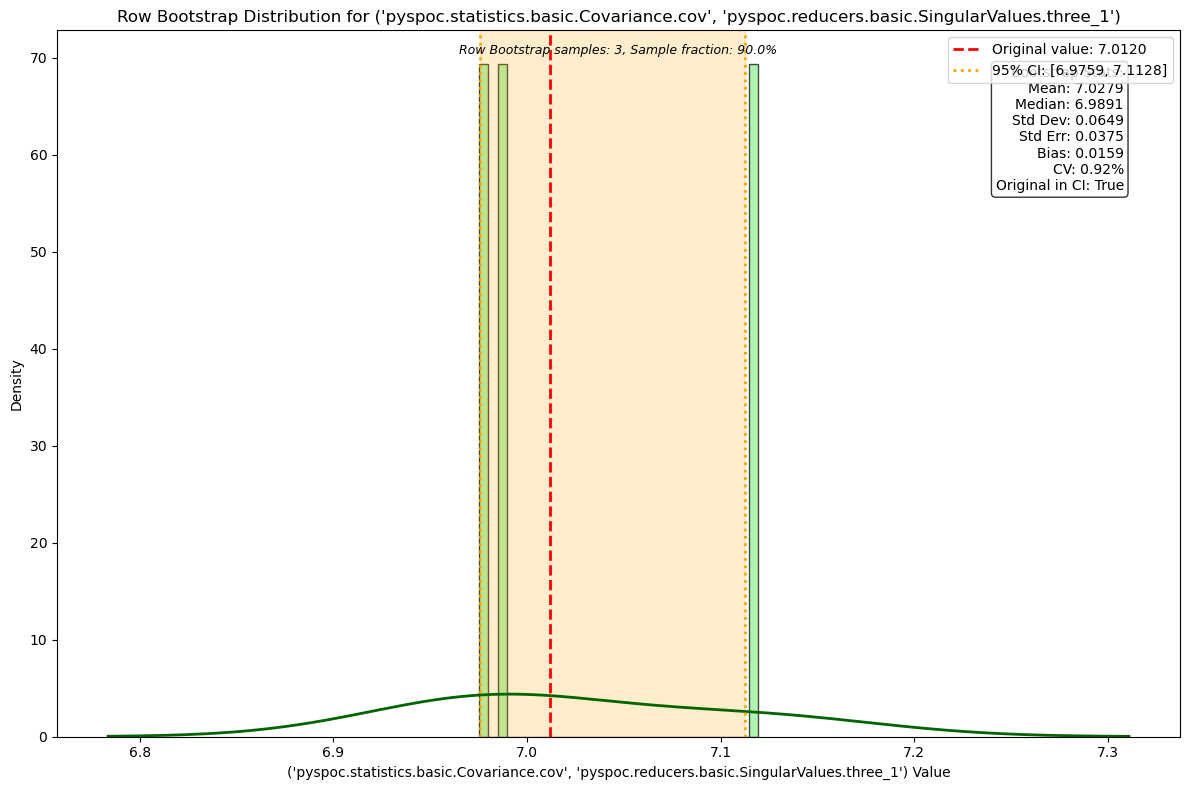

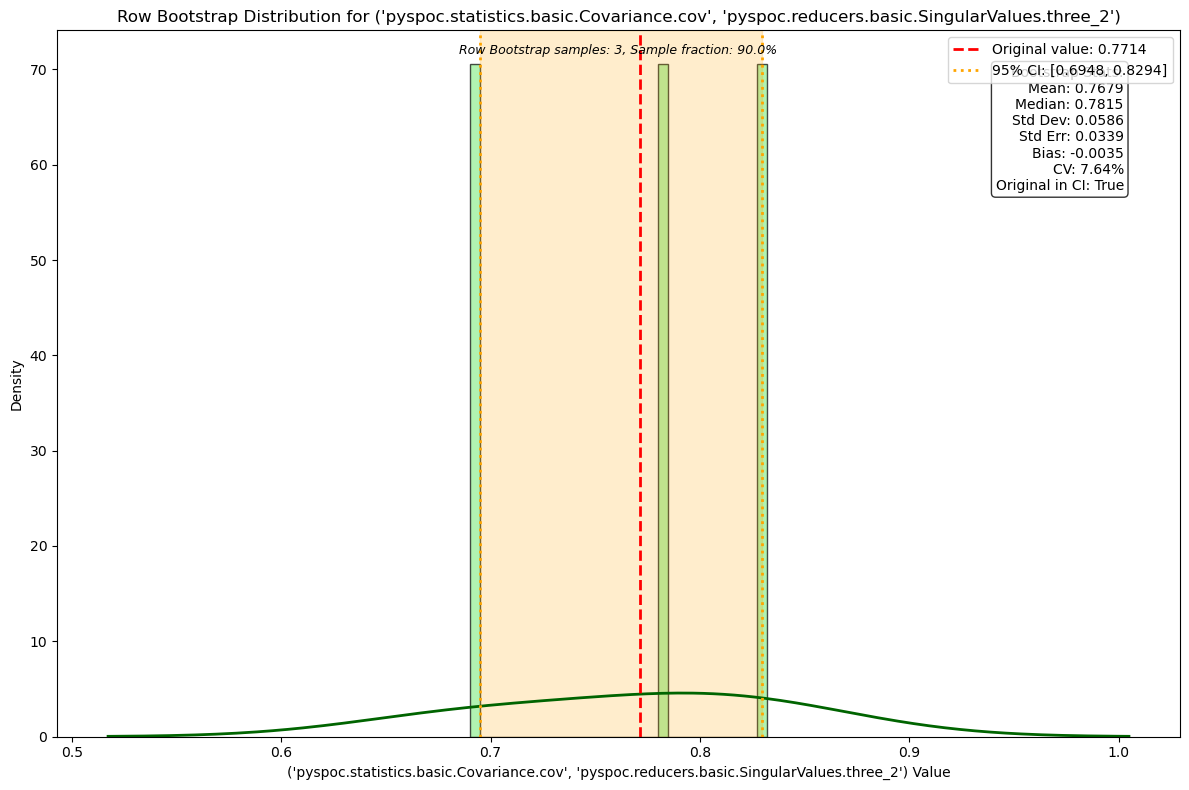

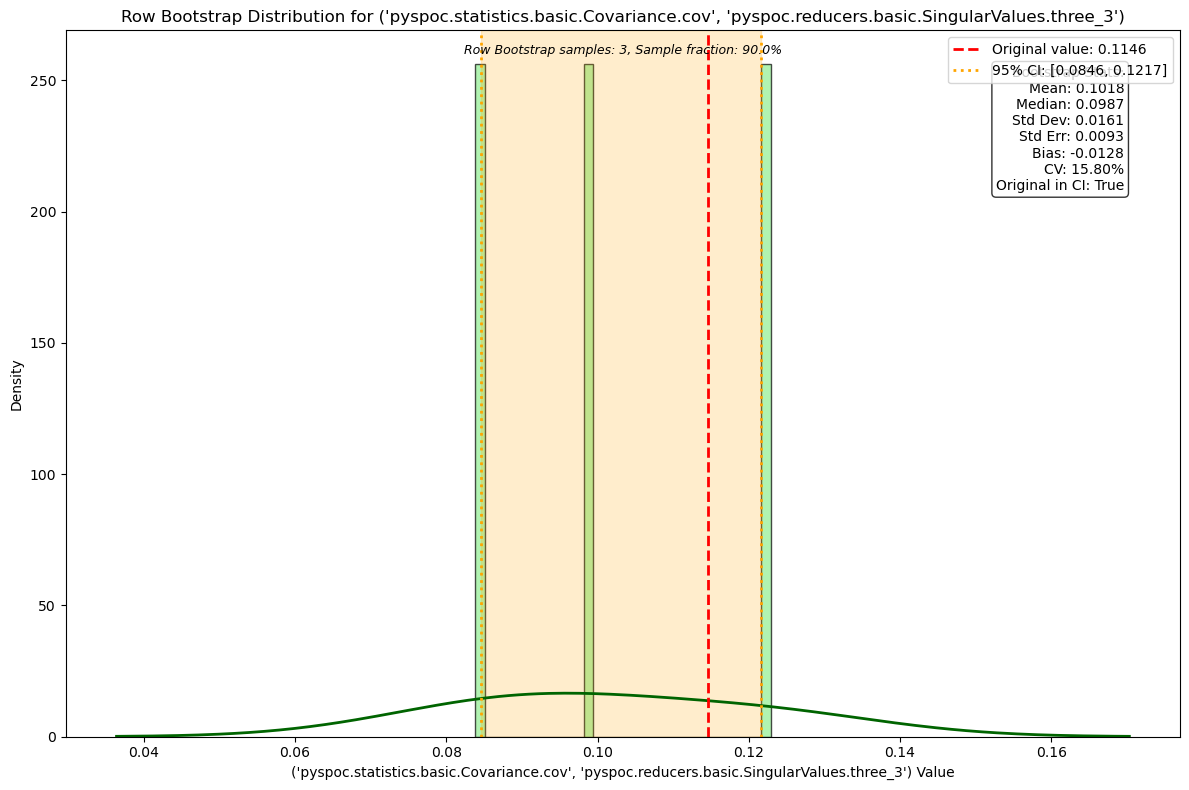

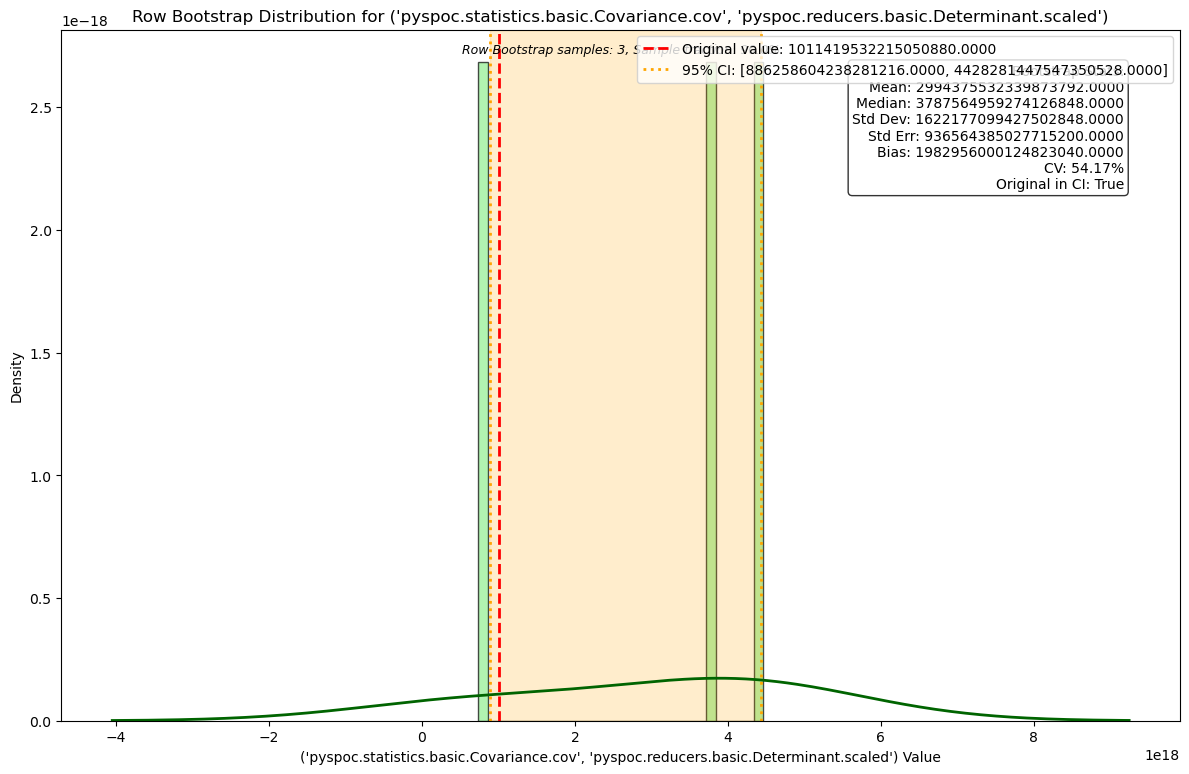

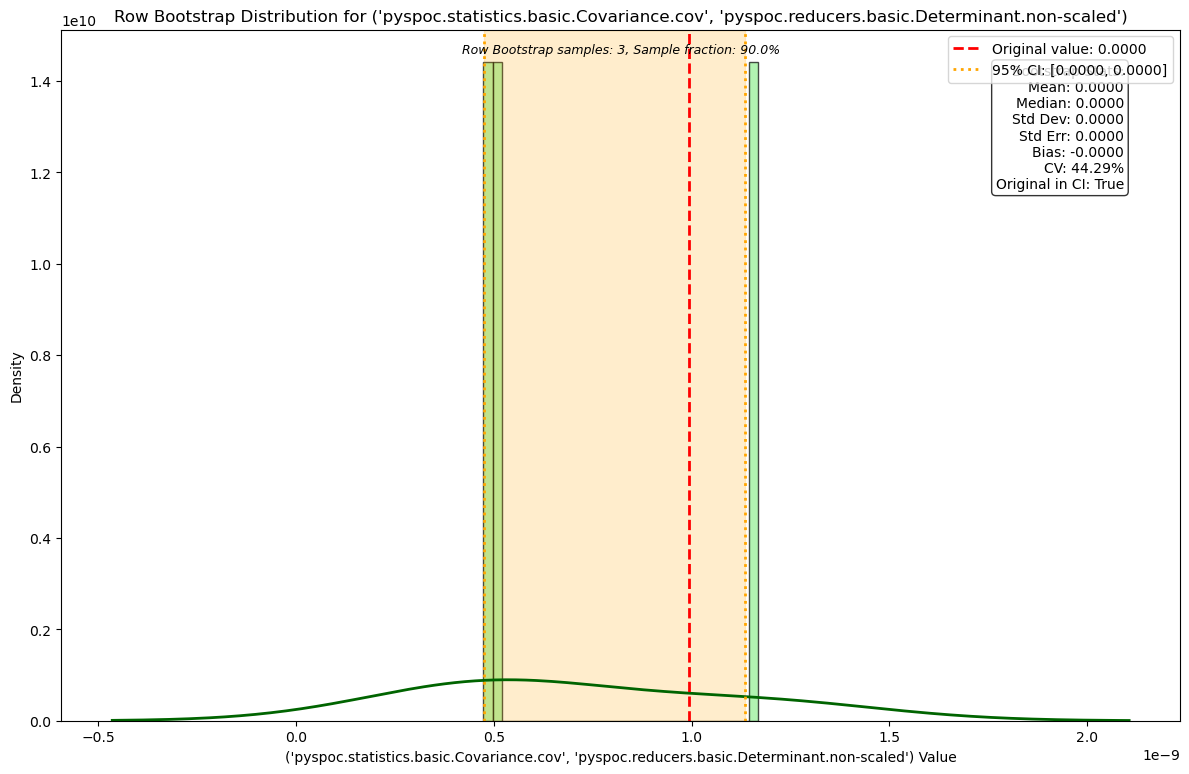

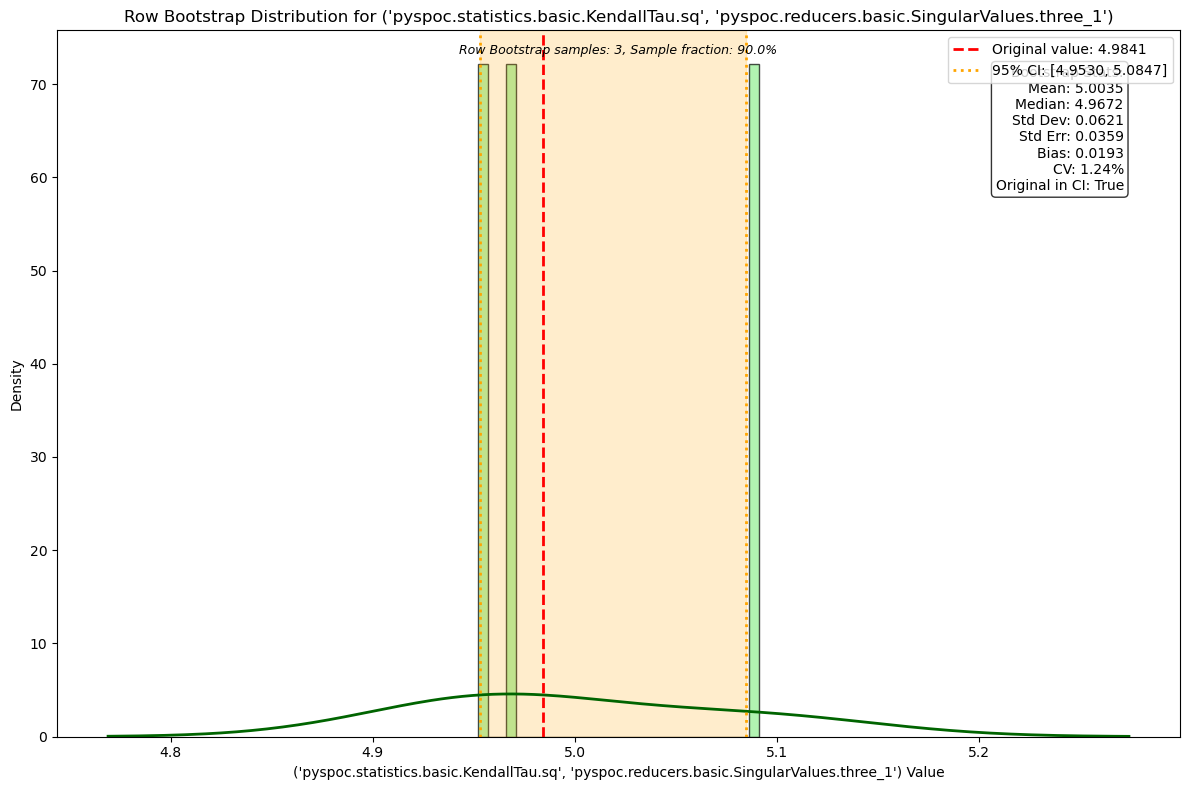

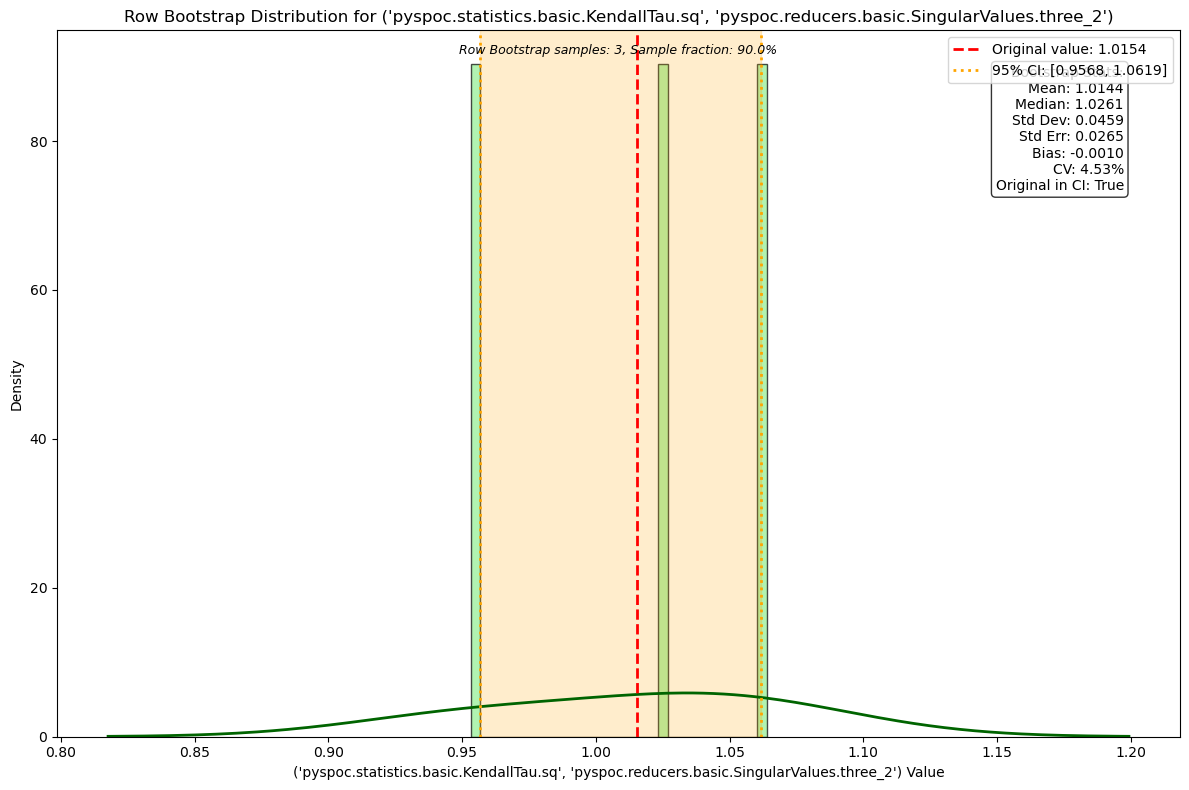

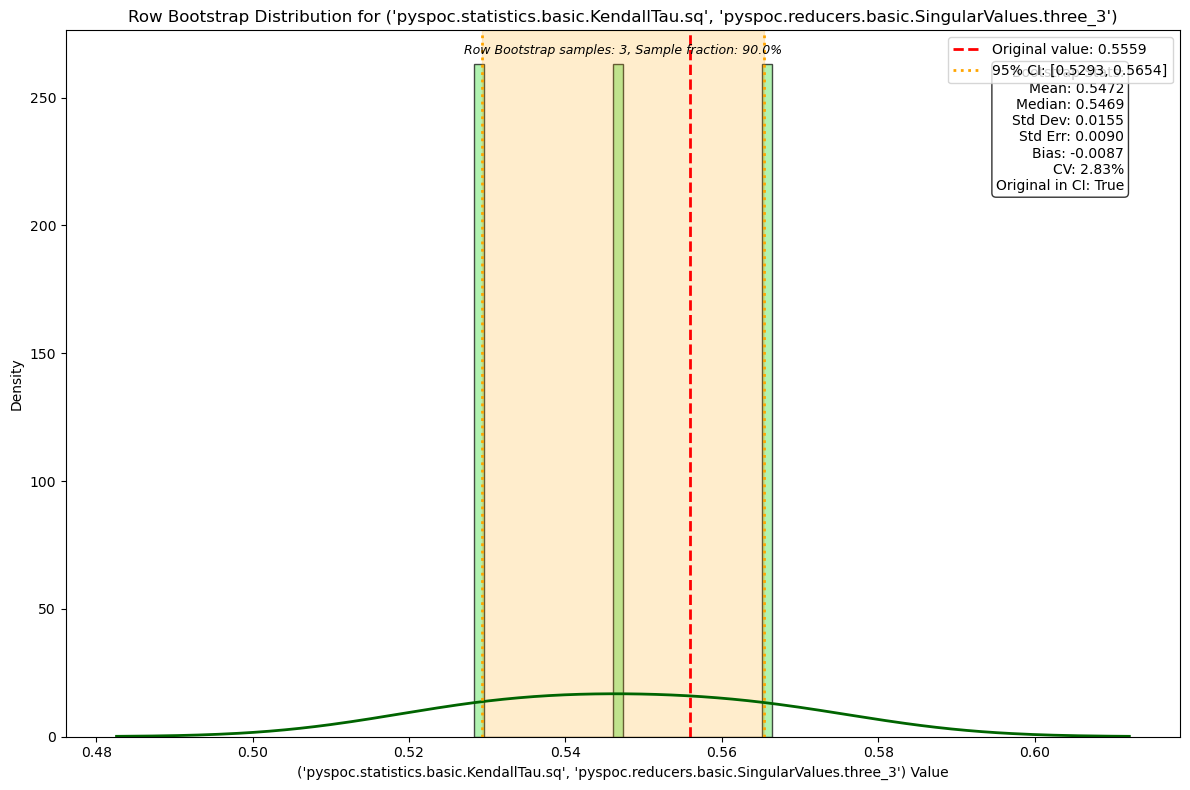

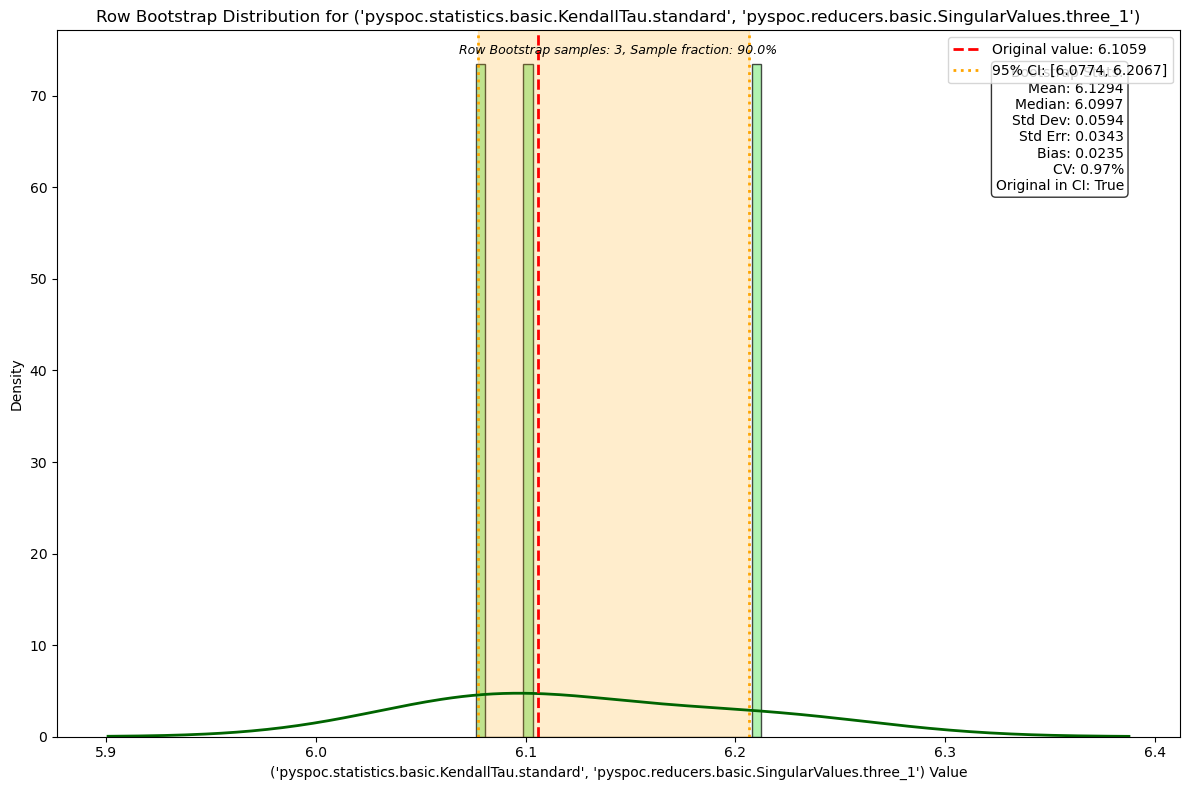

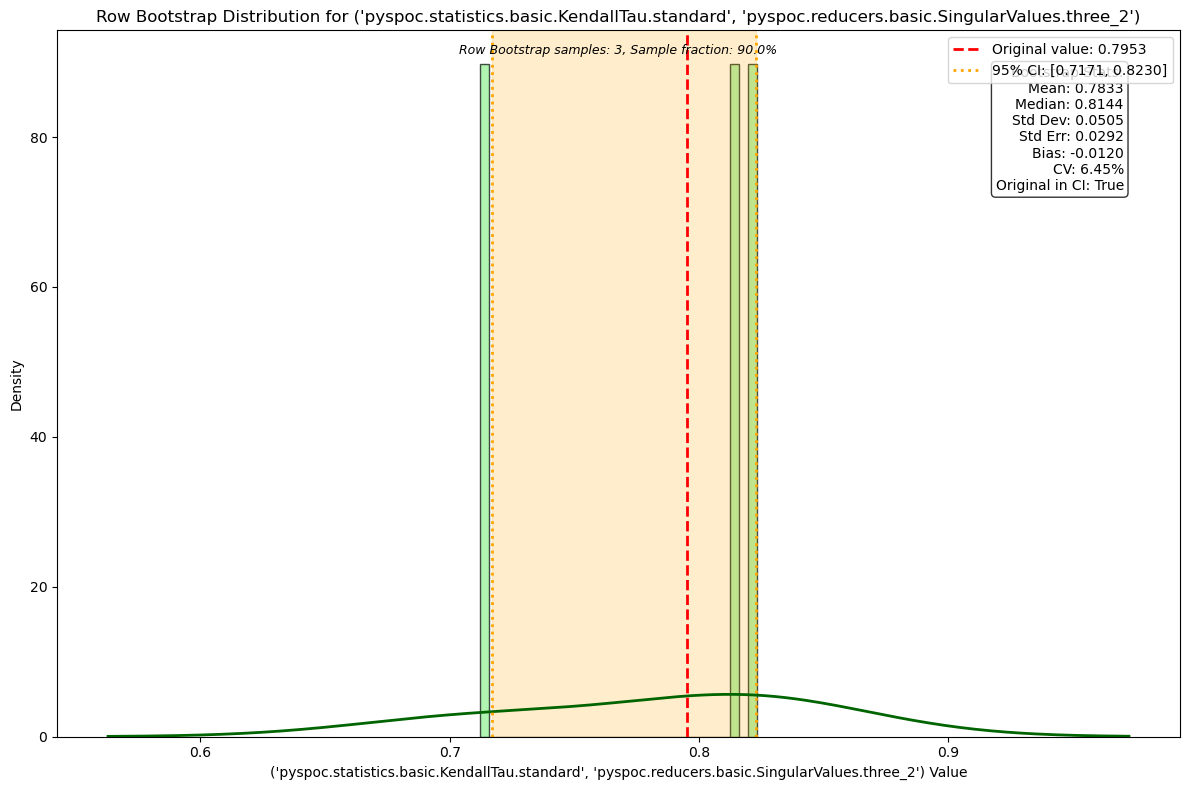

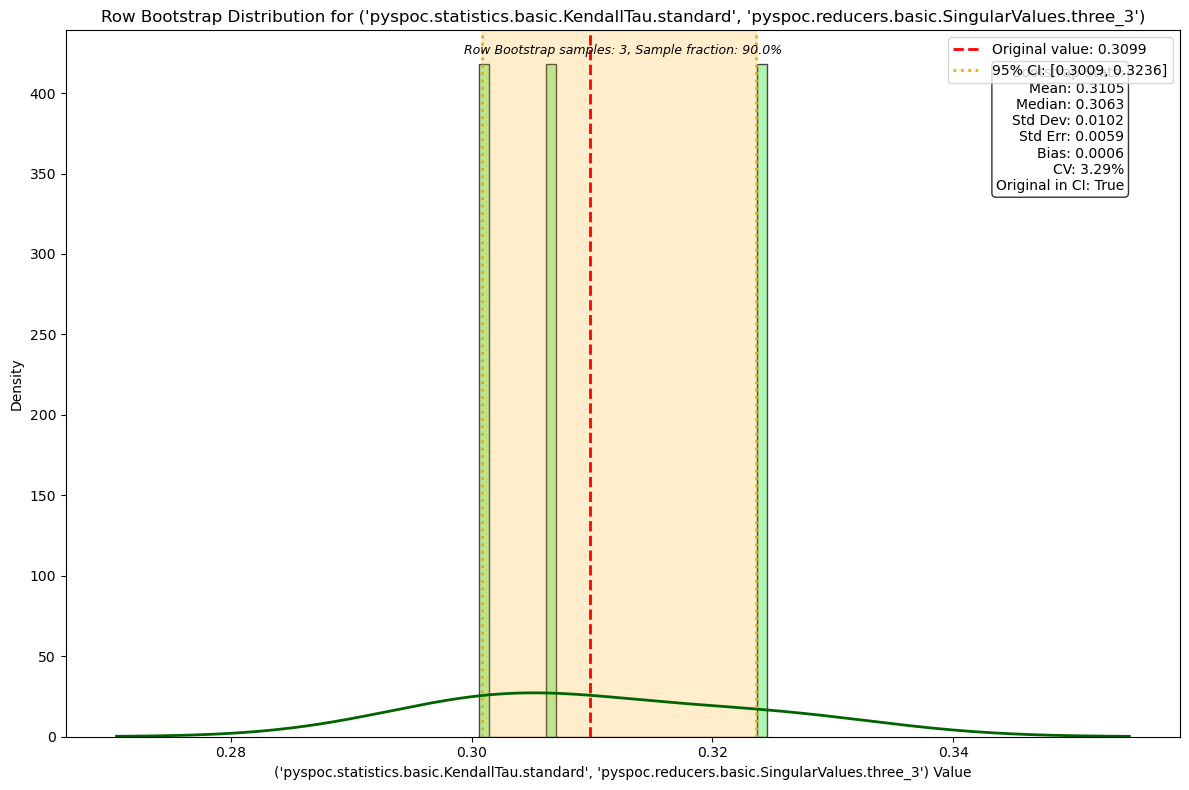

In [26]:
plot_all_bootstrap_distributions(bootstrap_results)

In [27]:
def bootstrap_sample_columns(df: pd.DataFrame, sample_fraction: float = 0.9, random_seed: Optional[int] = None) -> pd.DataFrame:
    """
    Create a bootstrap sample from the dataframe by sampling a fraction of columns without replacement.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    n_samples = int(len(df.columns) * sample_fraction)
    sampled_columns = np.random.choice(df.columns, size=n_samples, replace=False)
    bootstrap_df = df.loc[:, sampled_columns].copy()
    return bootstrap_df

def pyspi_calc_bootstrap_columns(df: pd.DataFrame,config_name: str, yaml, normalize: Optional[str] = None,
                        sample_fraction: float = 0.9, random_seed: Optional[int] = None):
    """

    Parameters:
    -----------
    df: pd.DataFrame
        The DataFrame containing the data to change
    config_name: str
        Name of the configuration file
    yaml : YAML string for configuration
    normalize : Optional[str], optional
        Method to normalize data (default: None)
    sample_fraction : float, optional
        Fraction of rows to sample for bootstrap (default: 0.9)
    random_seed : Optional[int], optional
        Seed for reproducible sampling (default: None)

    Returns:
    --------
    Dictionary of calculated statistics
    """
    # Load data with optional normalization
    df = load_data(df)

    # Create bootstrap sample
    bootstrap_df = bootstrap_sample_columns(df, sample_fraction=sample_fraction, random_seed=random_seed)
    if normalize is not None:
        bootstrap_df = normalize_data(bootstrap_df, method=normalize)
    # Use Calculator class to compute the statistics
    cfg = Config.from_yaml(config_name, yaml)
    calc = Calculator(bootstrap_df, normalise=False)
    calc.compute(cfg)
    return calc.results


def bootstrap_test_columns(
    df: pd.DataFrame,
    config_name,
    yaml,
    calc,
    n_bootstrap_columns: int = 10,
    sample_fraction_columns: float = 0.9,
    normalize: Optional[str] = None,
    random_seed: Optional[int] = None,
    save_bootstrap_data: bool = True,
    orig_calc_table: Optional[Dict] = None,  
) -> Dict[str, Dict[str, Dict[str, Any]]]:
    """
    Perform bootstrap sampling test to assess variability of statistics.
    """
    REDUCERS = list(calc.columns.values)
    # Use provided orig_calc_table or compute if not given
    if orig_calc_table is None:
        orig_calc_table = pyspi_calc(df, config_name,yaml, normalize=normalize)
    
    orig_results = {
        reducer: orig_calc_table[reducer].values[0] for reducer in REDUCERS
    }
    
    # Store bootstrap values for variance calculation and plotting
    bootstrap_values = {reducer: [] for reducer in REDUCERS}

    # Run bootstrap samples with progress bar
    iter_range = tqdm(range(n_bootstrap_columns), desc="Bootstrap sampling")
    for i in iter_range:
        # Use different random seed for each bootstrap sample
        bootstrap_seed = None if random_seed is None else random_seed + i + 1
        # Get bootstrap sample statistics
        bootstrap_calc_table = pyspi_calc_bootstrap_columns(df, config_name,yaml, normalize=normalize,
                                                   sample_fraction=sample_fraction_columns, random_seed=bootstrap_seed)

        for reducer_name in REDUCERS:
            try:
                bootstrap_value = bootstrap_calc_table[reducer_name].values[0]
                bootstrap_values[reducer_name].append(bootstrap_value)
            except:
                continue
            
    # Calculate bootstrap statistics and add to results
    
    final_results = {}
    for reducer_name in REDUCERS:
        orig_value = orig_results[reducer_name]
        result = {
            'original_value': orig_value,
            'n_bootstrap': n_bootstrap_columns,
            'sample_fraction': sample_fraction_columns
        }

        if save_bootstrap_data and bootstrap_values[reducer_name]:
            bootstrap_data = bootstrap_values[reducer_name]

            # Calculate confidence intervals (2.5% and 97.5% percentiles for 95% CI)
            ci_lower = np.percentile(bootstrap_data, 2.5)
            ci_upper = np.percentile(bootstrap_data, 97.5)

            result.update({
                'bootstrap_mean': np.mean(bootstrap_data),
                'bootstrap_median': np.median(bootstrap_data),
                'bootstrap_std': np.std(bootstrap_data),
                'bootstrap_variance': np.var(bootstrap_data),
                'bootstrap_std_err': np.std(bootstrap_data) / np.sqrt(len(bootstrap_data)),
                'bootstrap_min': np.min(bootstrap_data),
                'bootstrap_max': np.max(bootstrap_data),
                'bootstrap_ci_lower': ci_lower,
                'bootstrap_ci_upper': ci_upper,
                'bootstrap_distribution': bootstrap_data if save_bootstrap_data else None,
                'original_in_ci': ci_lower <= orig_value <= ci_upper,
                'bias': np.mean(bootstrap_data) - orig_value,
                'coefficient_of_variation': np.std(bootstrap_data) / np.abs(np.mean(bootstrap_data)) * 100 if np.mean(bootstrap_data) != 0 else np.nan
            })

        final_results[reducer_name] = result

    return final_results

def plot_bootstrap_distribution_columns(results: Dict, reducer,
                               figsize: Tuple[int, int] = (10, 6)) -> Figure:
    """
    Plot the distribution of bootstrap test values for columns

    Parameters:
    -----------
    results : Dict
        Dictionary containing bootstrap test results.
    reducer : str
        Name of the reducer
    figsize : Tuple[int, int], optional
        Figure size (width, height), by default (10, 6)

    Returns:
    --------
    Figure
        Matplotlib figure object.
    """
    # Extract data
    result = results[reducer]
    bootstrap_values = result['bootstrap_distribution']
    orig_value = result['original_value']
    ci_lower = result['bootstrap_ci_lower']
    ci_upper = result['bootstrap_ci_upper']

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot histogram of bootstrap values
    n, bins, patches = ax.hist(bootstrap_values, bins=30, alpha=0.7, color='lightgreen',
                              edgecolor='black', density=True)

    # Add kernel density
    sns.kdeplot(bootstrap_values, color='darkgreen', ax=ax, linewidth=2)

    # Add vertical line for original value
    ax.axvline(x=orig_value, color='red', linestyle='--', linewidth=2,
              label=f'Original value: {orig_value:.4f}')

    # Add confidence interval lines
    ax.axvline(x=ci_lower, color='orange', linestyle=':', linewidth=2,
              label=f'95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]')
    ax.axvline(x=ci_upper, color='orange', linestyle=':', linewidth=2)

    # Fill confidence interval area
    ax.axvspan(ci_lower, ci_upper, alpha=0.2, color='orange')

    # Add bootstrap statistics
    stats_text = (
        f"Bootstrap Stats:\n"
        f"Mean: {result['bootstrap_mean']:.4f}\n"
        f"Median: {result['bootstrap_median']:.4f}\n"
        f"Std Dev: {result['bootstrap_std']:.4f}\n"
        f"Bias: {result['bias']:.4f}\n"
        f"Std Err: {result['bootstrap_std_err']:.4f}\n"
        f"CV: {result['coefficient_of_variation']:.2f}%\n"
        f"Original in CI: {result['original_in_ci']}"
    )

    # Add the stats text as an annotation
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', horizontalalignment='right',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add labels and title
    ax.set_xlabel(f'{reducer} Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Column Bootstrap Distribution for {reducer}')

    # Add subtitle with sample info
    subtitle = f'Column Bootstrap samples: {result["n_bootstrap"]}, Sample fraction: {result["sample_fraction"]:.1%}'
    ax.text(0.5, 0.98, subtitle, transform=ax.transAxes, fontsize=9,
           verticalalignment='top', horizontalalignment='center', style='italic')

    ax.legend()
    fig.tight_layout()

    return fig


def plot_all_bootstrap_distributions_columns(results: Dict, figsize: Tuple[int, int] = (12, 8)) -> Dict[str, Figure]:
    figures = {}
    for reducer_name, reducer_results in results.items():
        key = str(reducer_name)
        try:
            fig = plot_bootstrap_distribution_columns(results, reducer_name, figsize=figsize)
            figures[key] = fig
        except Exception as e:
            print(f"Error plotting bootstrap {reducer_name}: {e}")
    return figures

In [28]:
def perturbation_test(
    df: pd.DataFrame,
    config_name,
    yaml,
    calc,
    n_perturbations: int = 1000,
    scale_factor: float = 0.1,
    normalize: Optional[str] = None,
    random_seed: Optional[int] = None,
    save_perturbation_data: bool = True,
    orig_calc_table: Optional[Dict] = None,
) -> Dict[str, Dict[str, Any]]:
    """
    Perform a perturbation test to assess statistical significance and calculate variance.
    """
    REDUCERS = list(calc.columns.values)
    # Use provided orig_calc_table or compute
    if orig_calc_table is None:
        orig_calc_table = pyspi_calc(df, config_name, yaml, normalize=normalize)

    orig_results = {
        reducer: orig_calc_table[reducer].values[0] for reducer in REDUCERS
    }
    
    perturb_values = {reducer: [] for reducer in REDUCERS}

    # Run perturbations with progress bar
    iter_range = tqdm(range(n_perturbations), desc="Perturbation sampling")
    for i in iter_range:
        # Use different random seed for each perm
        perturb_seed = None if random_seed is None else random_seed + i + 1
        # Get shuffled data statistics
        perturb_calc_table = pyspi_calc(df, config_name,yaml, normalize=normalize, perturb=True, scale_factor=scale_factor,random_seed=perturb_seed)

        for reducer in REDUCERS:
            perturb_value = perturb_calc_table[reducer].values[0]
            # Append the value to the list
            perturb_values[reducer].append(perturb_value)

    # Calculate p-values, variances, and add to results
    # Create the DataFrame of perturbation results 
    # The index length should match the number of perturbations
    perturb_data = pd.DataFrame(perturb_values)
    # Calculate p-values, variances, and add to results
    final_results = {}
    for reducer in REDUCERS:
        # Access the specific reducer's data from the perm_data DataFrame
        perturb_data_series = perturb_data[reducer]
        orig_value = orig_results[reducer]
        n = len(perturb_data_series) # Use the length of the collected data

        # Calculate permutation percentile for p-value
        lower_tail = np.sum(perturb_data_series < orig_value) / n
        upper_tail = np.sum(perturb_data_series > orig_value) / n
        perturbation_percentile = min(lower_tail, upper_tail)
        p_value = perturbation_percentile * 2 # Multiply by 2 for a two-tailed test

        result = {'value': orig_value,
              'p_value': p_value}

        # Update results with permutation statistics
        result.update({
            'perturbation_mean': np.mean(perturb_data_series),
            'perturbation_median': np.median(perturb_data_series),
            'perturbation_std': np.std(perturb_data_series),
            'perturbation_variance': np.var(perturb_data_series),
            'perturbation_std_err': np.std(perturb_data_series) / np.sqrt(n),
            'perturbation_min': np.min(perturb_data_series),
            'perturbation_max': np.max(perturb_data_series),
            'perturbation_distribution': perturb_data_series.tolist() if save_perturbation_data else None, # Store as list if needed
            'perturbation_percentile_rank': perturbation_percentile
        })

        final_results[reducer] = result
    return final_results


def plot_perturbation_distribution(results: Dict, reducer: str,
                                 figsize: Tuple[int, int] = (10, 6)) -> Figure:
    """
    Plot the distribution of perturbation test values

    Parameters:
    -----------
    results : Dict
        Dictionary containing perturbation test results.
    reducer : str
        Name of the reducer
    figsize : Tuple[int, int], optional
        Figure size (width, height), by default (10, 6)

    Returns:
    --------
    Figure
        Matplotlib figure object.
    """

    # Extract data
    result = results[reducer]
    perturb_values = result['perturbation_distribution']
    orig_value = result['value']
    p_value = result['p_value']

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot histogram of permutation values
    n, bins, patches = ax.hist(perturb_values, bins=30, alpha=0.7, color='skyblue',
                              edgecolor='black', density=True)

    # Add kernel density estimate
    sns.kdeplot(perturb_values, color='navy', ax=ax, linewidth=2)

    # Add vertical line for original value
    ax.axvline(x=orig_value, color='red', linestyle='--', linewidth=2,
              label=f'Original value: {orig_value:.4f}')

    # Add permutation statistics
    stats_text = (
        f"Perturbation Stats:\n"
        f"Mean: {result['perturbation_mean']:.4f}\n"
        f"Median: {result['perturbation_median']:.4f}\n"
        f"Std Dev: {result['perturbation_std']:.4f}\n"
        f"Std Err: {result['perturbation_std_err']:.4f}\n"
        f"p-value: {p_value:.4f}"
    )

    # Add the stats text as an annotation
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', horizontalalignment='right',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add labels and title
    ax.set_xlabel(f'{reducer} Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Perturbation Distribution for {reducer}')

    ax.legend()
    fig.tight_layout()

    return fig


def plot_all_perturbation_distributions(results: Dict, figsize: Tuple[int, int] = (12, 8)) -> Dict[str, Figure]:
    figures = {}
    for reducer_name, reducer_results in results.items():
        # Convert reducer_name to string for safe dict key
        key = str(reducer_name)
        if (isinstance(reducer_results, dict) and
            'perturbation_distribution' in reducer_results and
            'value' in reducer_results):
            try:
                fig = plot_perturbation_distribution(results, reducer_name, figsize=figsize)
                figures[key] = fig
            except Exception as e:
                print(f"Error plotting {reducer_name}: {e}")
    return figures


In [29]:
def perturbation_test(
    df: pd.DataFrame,
    config_name,
    yaml,
    calc,
    n_perturbations: int = 1000,
    scale_factor: float = 0.1,
    normalize: Optional[str] = None,
    random_seed: Optional[int] = None,
    save_perturbation_data: bool = True,
    orig_calc_table: Optional[Dict] = None,
) -> Dict[str, Dict[str, Any]]:
    """
    Perform a perturbation test to assess statistical significance and calculate variance.
    """
    REDUCERS = list(calc.columns.values)
    # Use provided orig_calc_table or compute
    if orig_calc_table is None:
        orig_calc_table = pyspi_calc(df, config_name, yaml, normalize=normalize)

    orig_results = {
        reducer: orig_calc_table[reducer].values[0] for reducer in REDUCERS
    }
    
    perturb_values = {reducer: [] for reducer in REDUCERS}

    # Run perturbations with progress bar
    iter_range = tqdm(range(n_perturbations), desc="Perturbation sampling")
    for i in iter_range:
        # Use different random seed for each perm
        perturb_seed = None if random_seed is None else random_seed + i + 1
        # Get shuffled data statistics
        perturb_calc_table = pyspi_calc(df, config_name,yaml, normalize=normalize, perturb=True, scale_factor=scale_factor,random_seed=perturb_seed)

        for reducer in REDUCERS:
            perturb_value = perturb_calc_table[reducer].values[0]
            # Append the value to the list
            perturb_values[reducer].append(perturb_value)

    # Calculate p-values, variances, and add to results
    # Create the DataFrame of perturbation results AFTER collecting all values
    # The index length should match the number of perturbations
    perturb_data = pd.DataFrame(perturb_values)
    # Calculate p-values, variances, and add to results
    final_results = {}
    for reducer in REDUCERS:
        # Access the specific reducer's data from the perm_data DataFrame
        perturb_data_series = perturb_data[reducer]
        orig_value = orig_results[reducer]
        n = len(perturb_data_series) # Use the length of the collected data

        # Calculate permutation percentile for p-value
        lower_tail = np.sum(perturb_data_series < orig_value) / n
        upper_tail = np.sum(perturb_data_series > orig_value) / n
        perturbation_percentile = min(lower_tail, upper_tail)
        p_value = perturbation_percentile * 2 # Multiply by 2 for a two-tailed test

        # Calculate 95% confidence interval (2.5th and 97.5th percentiles)
        ci_lower = np.percentile(perturb_data_series, 2.5)
        ci_upper = np.percentile(perturb_data_series, 97.5)

        result = {'value': orig_value,
              'p_value': p_value}

        # Update results with permutation statistics and CI
        result.update({
            'perturbation_mean': np.mean(perturb_data_series),
            'perturbation_median': np.median(perturb_data_series),
            'perturbation_std': np.std(perturb_data_series),
            'perturbation_variance': np.var(perturb_data_series),
            'perturbation_std_err': np.std(perturb_data_series) / np.sqrt(n),
            'perturbation_min': np.min(perturb_data_series),
            'perturbation_max': np.max(perturb_data_series),
            'perturbation_distribution': perturb_data_series.tolist() if save_perturbation_data else None, # Store as list if needed
            'perturbation_percentile_rank': perturbation_percentile,
            'perturbation_ci_lower': ci_lower,
            'perturbation_ci_upper': ci_upper,
            'original_in_ci': ci_lower <= orig_value <= ci_upper
        })

        final_results[reducer] = result
    return final_results


def plot_perturbation_distribution(results: Dict, reducer: str,
                                 figsize: Tuple[int, int] = (10, 6)) -> Figure:
    """
    Plot the distribution of perturbation test values, including a 90% confidence interval.
    """
    # Extract data
    result = results[reducer]
    perturb_values = result['perturbation_distribution']
    orig_value = result['value']
    p_value = result['p_value']
    ci_lower = result.get('perturbation_ci_lower', None)
    ci_upper = result.get('perturbation_ci_upper', None)

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot histogram of permutation values
    n, bins, patches = ax.hist(perturb_values, bins=30, alpha=0.7, color='skyblue',
                              edgecolor='black', density=True)

    # Add kernel density estimate
    sns.kdeplot(perturb_values, color='navy', ax=ax, linewidth=2)

    # Add vertical line for original value
    ax.axvline(x=orig_value, color='red', linestyle='--', linewidth=2,
              label=f'Original value: {orig_value:.4f}')

    # Add confidence interval lines if available
    if ci_lower is not None and ci_upper is not None:
        ax.axvline(x=ci_lower, color='orange', linestyle=':', linewidth=2,
                  label=f'90% CI: [{ci_lower:.4f}, {ci_upper:.4f}]')
        ax.axvline(x=ci_upper, color='orange', linestyle=':', linewidth=2)
        ax.axvspan(ci_lower, ci_upper, alpha=0.2, color='orange')

    # Add permutation statistics
    stats_text = (
        f"Perturbation Stats:\n"
        f"Mean: {result['perturbation_mean']:.4f}\n"
        f"Median: {result['perturbation_median']:.4f}\n"
        f"Std Dev: {result['perturbation_std']:.4f}\n"
        f"Std Err: {result['perturbation_std_err']:.4f}\n"
        f"p-value: {p_value:.4f}\n"
        f"90% CI: [{ci_lower:.4f}, {ci_upper:.4f}]\n"
        f"Original in CI: {result.get('original_in_ci', False)}"
    )

    # Add the stats text as an annotation
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', horizontalalignment='right',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add labels and title
    ax.set_xlabel(f'{reducer} Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Perturbation Distribution for {reducer}')

    ax.legend()
    fig.tight_layout()

    return fig


def plot_all_perturbation_distributions(results: Dict, figsize: Tuple[int, int] = (12, 8)) -> Dict[str, Figure]:
    figures = {}
    for reducer_name, reducer_results in results.items():
        # Convert reducer_name to string for safe dict key
        key = str(reducer_name)
        if (isinstance(reducer_results, dict) and
            'perturbation_distribution' in reducer_results and
            'value' in reducer_results):
            try:
                fig = plot_perturbation_distribution(results, reducer_name, figsize=figsize)
                figures[key] = fig
            except Exception as e:
                print(f"Error plotting {reducer_name}: {e}")
    return figures

#

Perturbation sampling:   0%|          | 0/5 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.19it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 224.10it/s]



Calculation complete. Time taken: 0.1032s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 384.96it/s]



Calculation complete. Time taken: 0.0928s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 176.96it/s]



Calculation complete. Time taken: 0.1006s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 245.69it/s]



Calculation complete. Time taken: 0.1425s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 230.04it/s]



Calculation complete. Time taken: 0.0966s


{"('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_1')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_2')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_3')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.Determinant.scaled')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.Determinant.non-scaled')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_1')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_2')": <Figure size 1200x800 with 1 Axes>,
 "('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_3

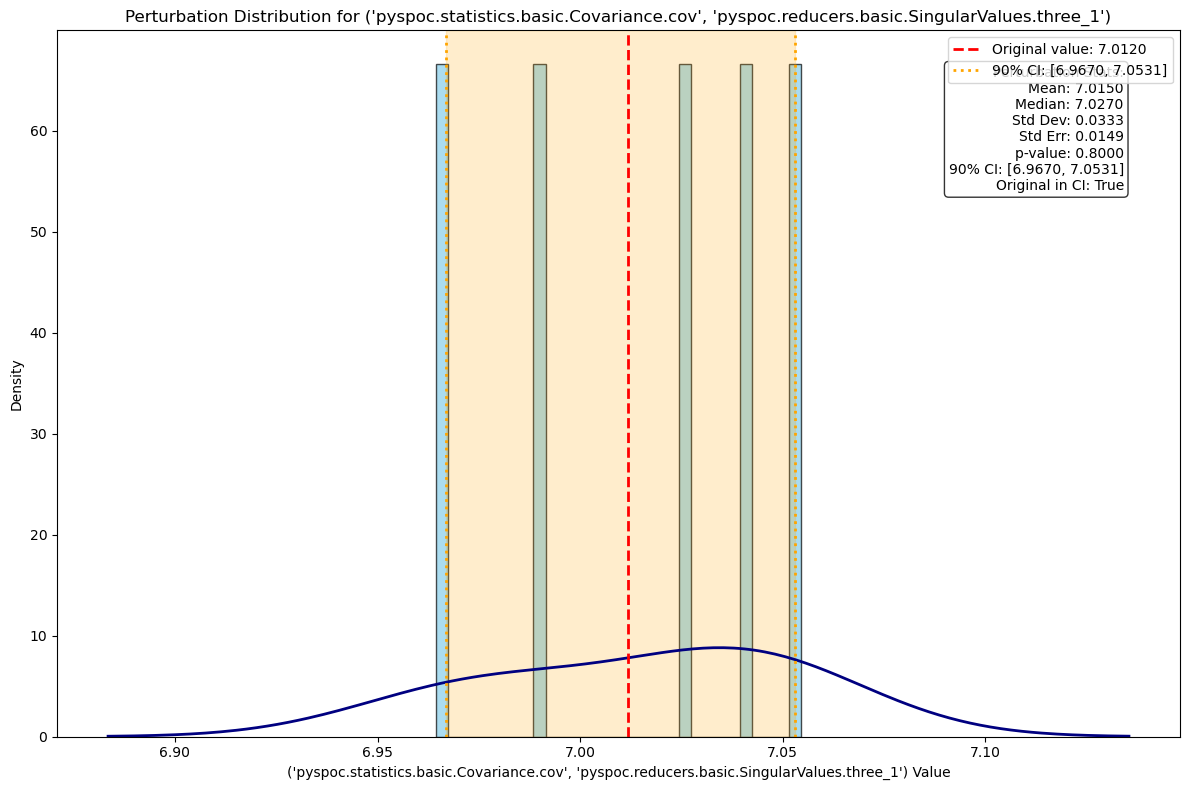

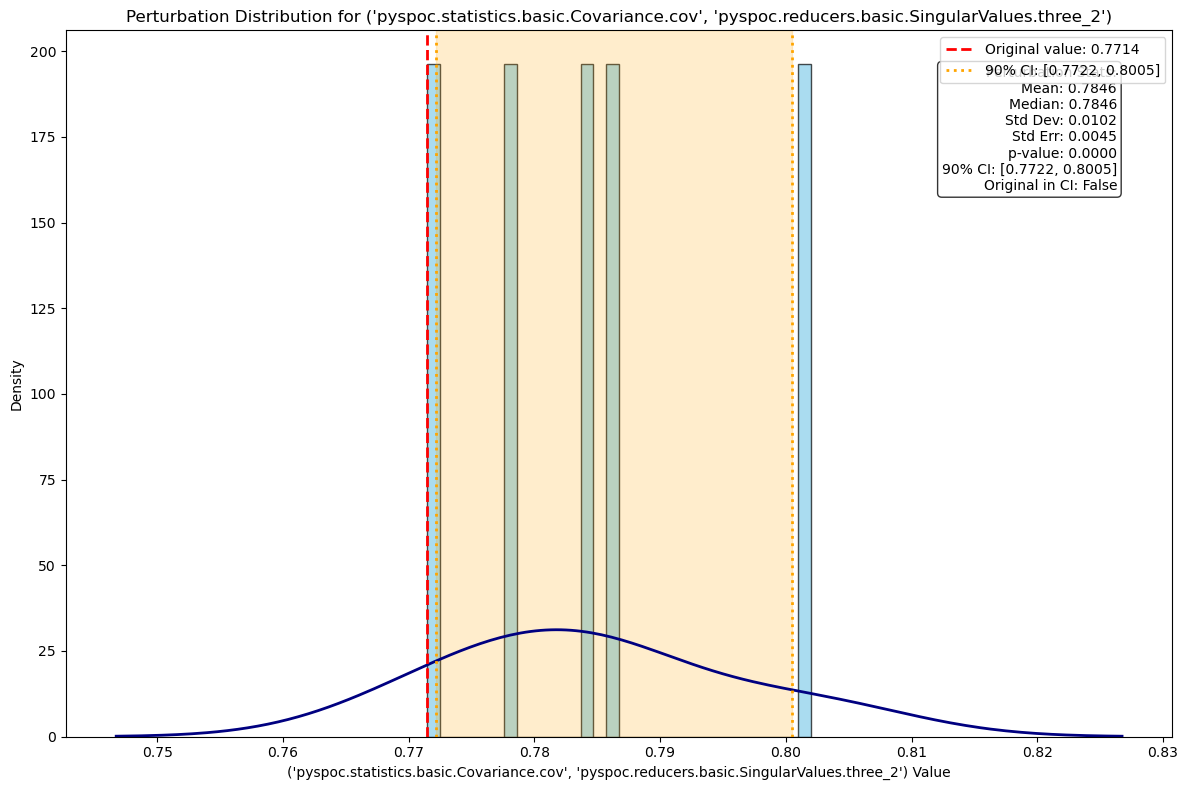

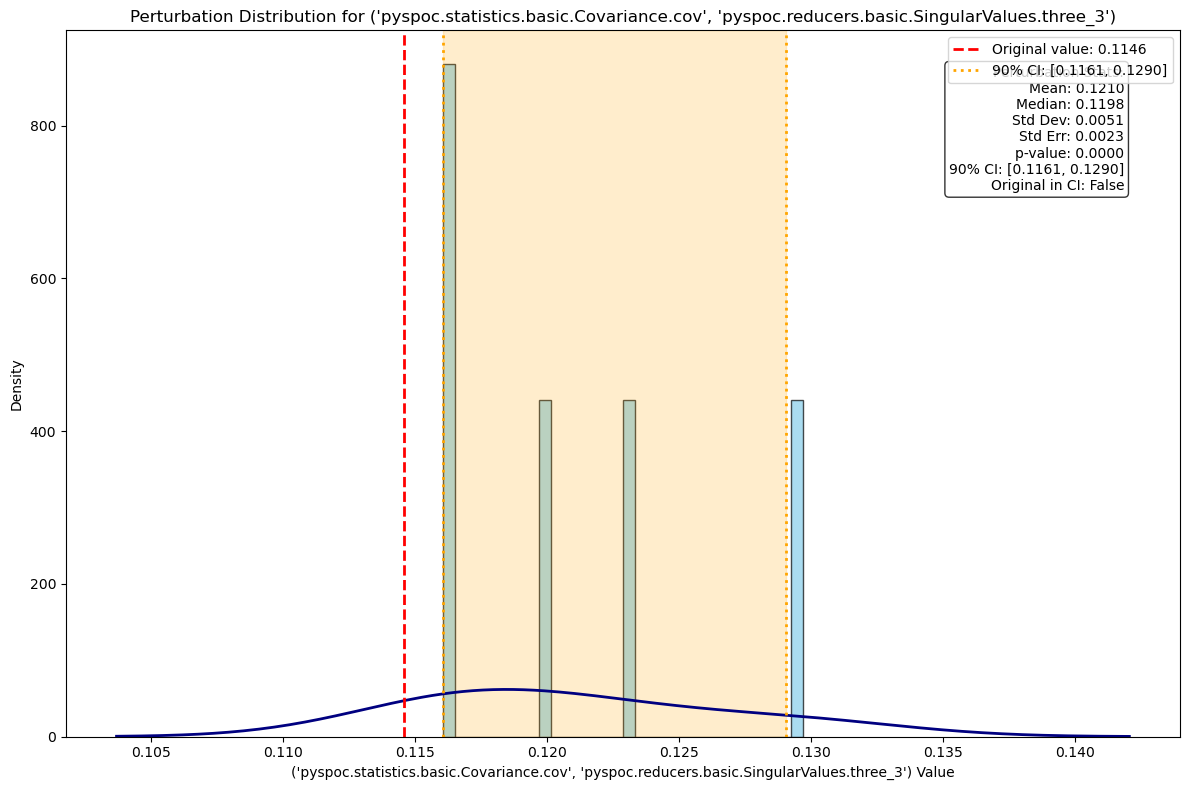

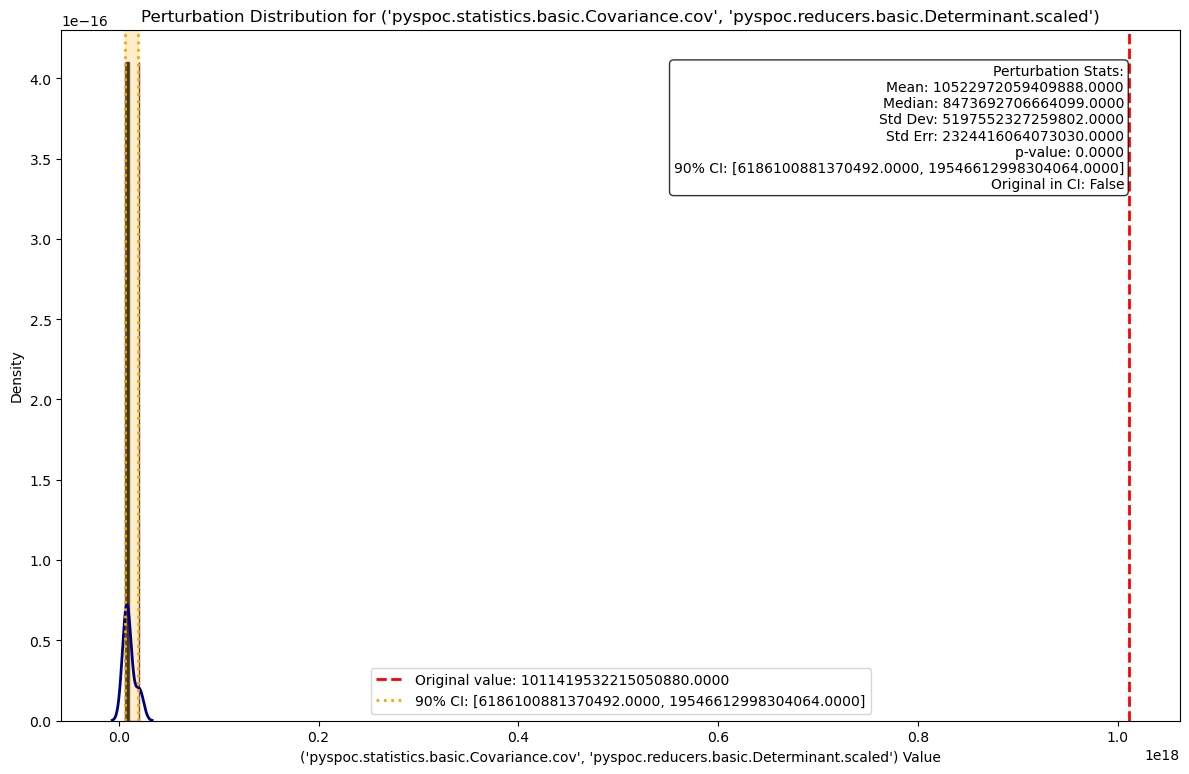

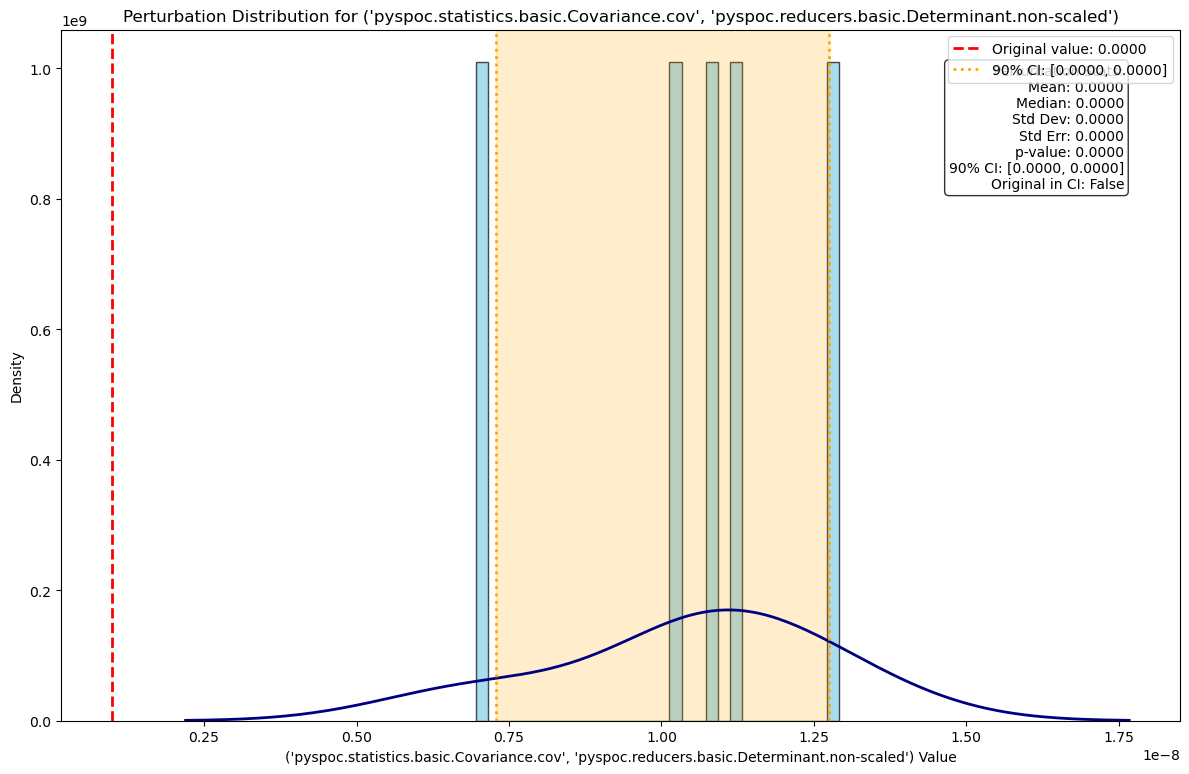

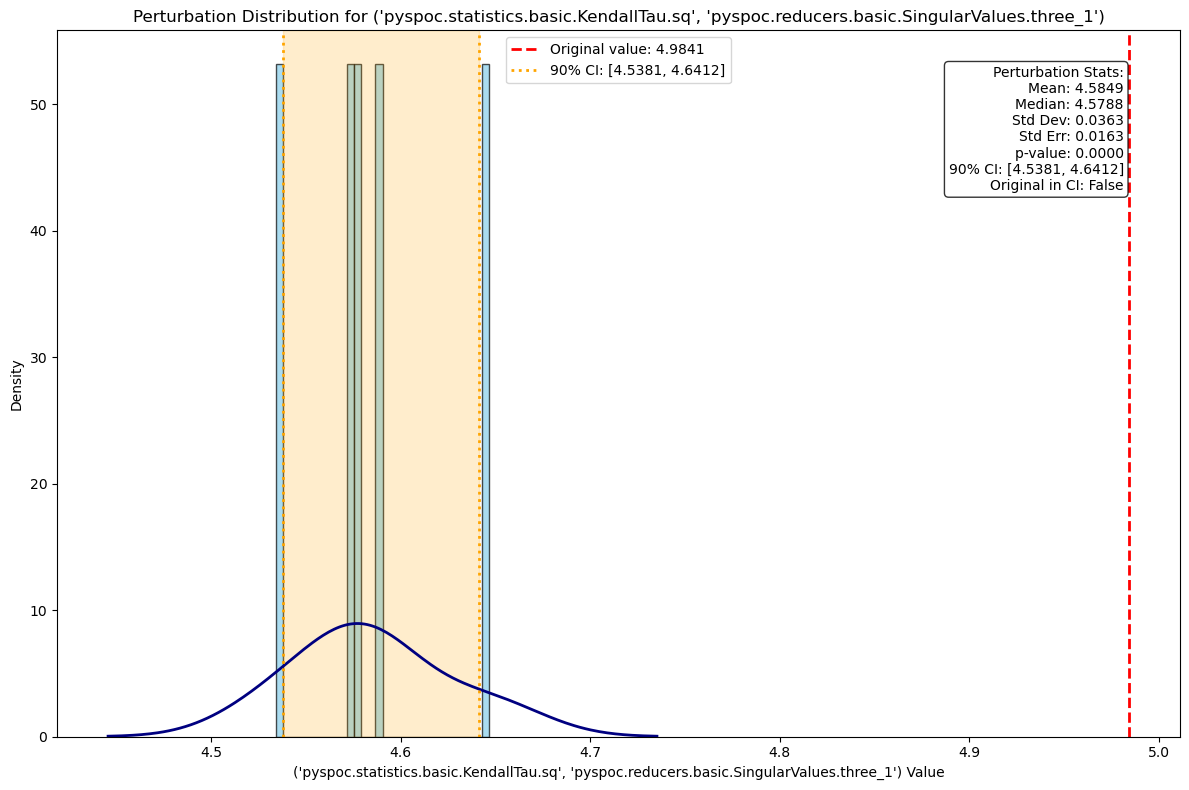

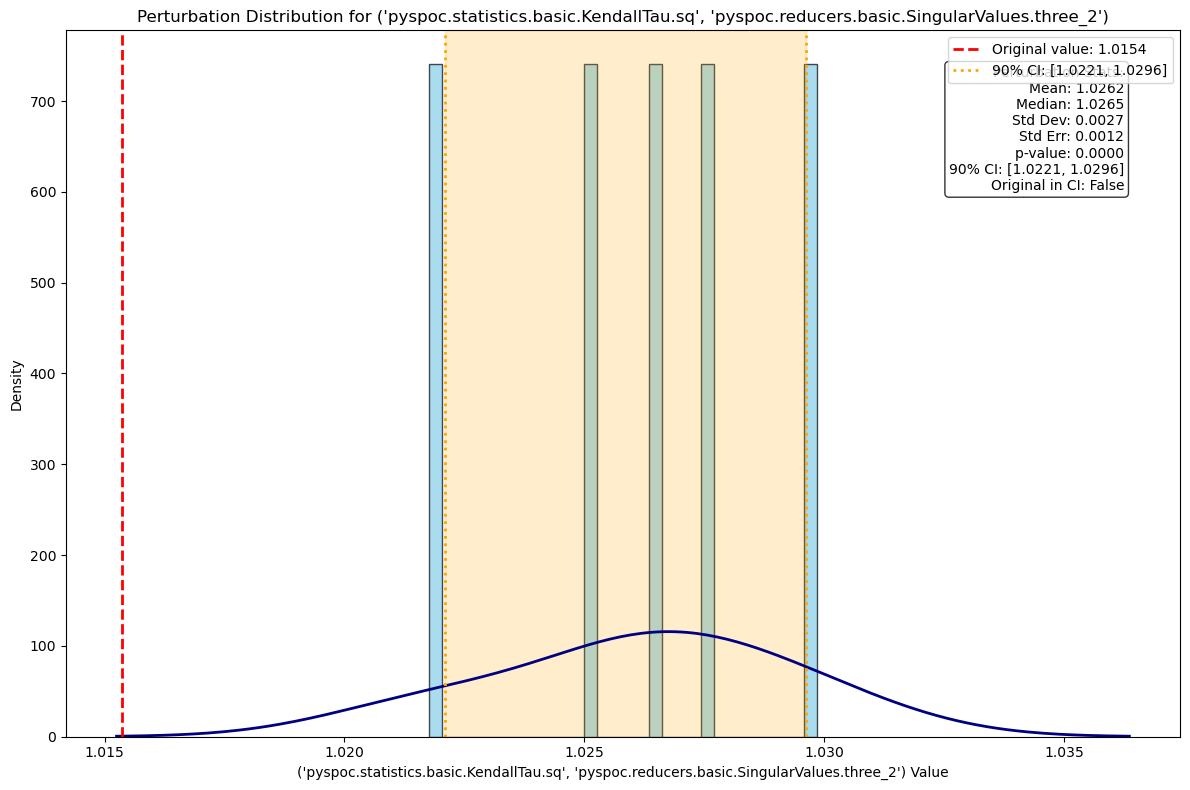

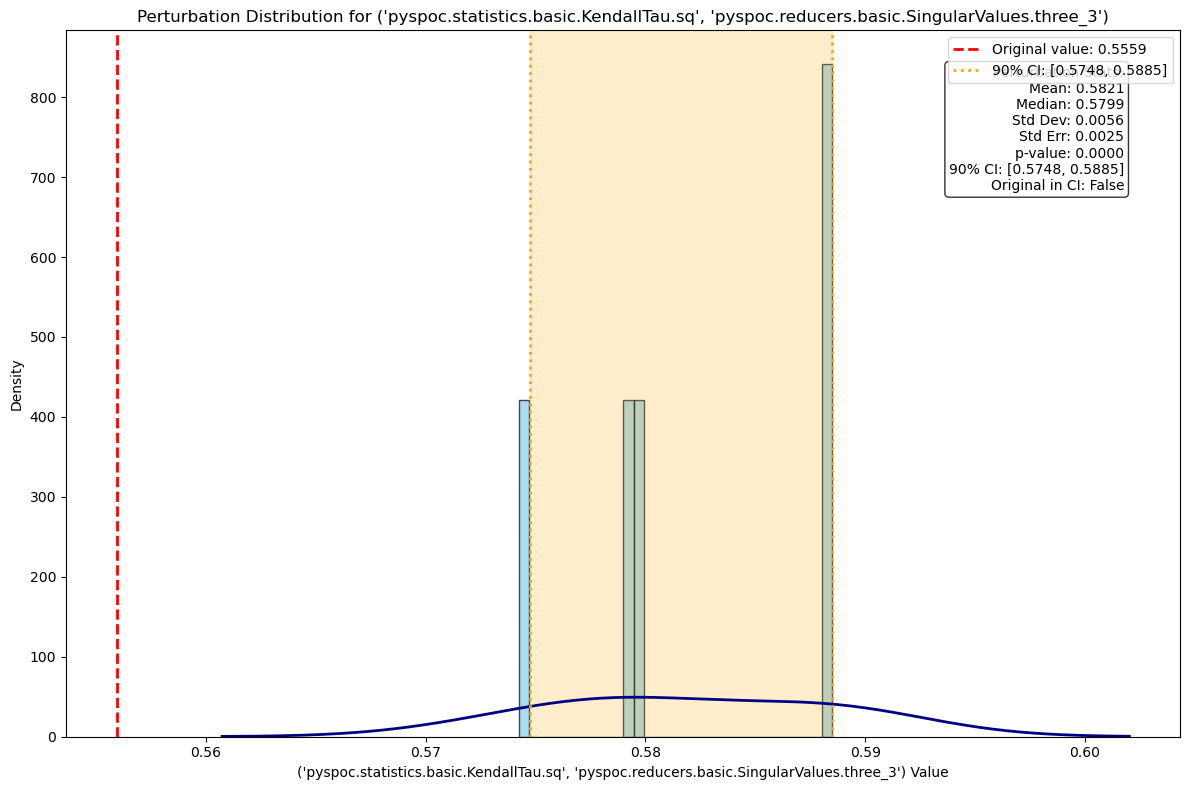

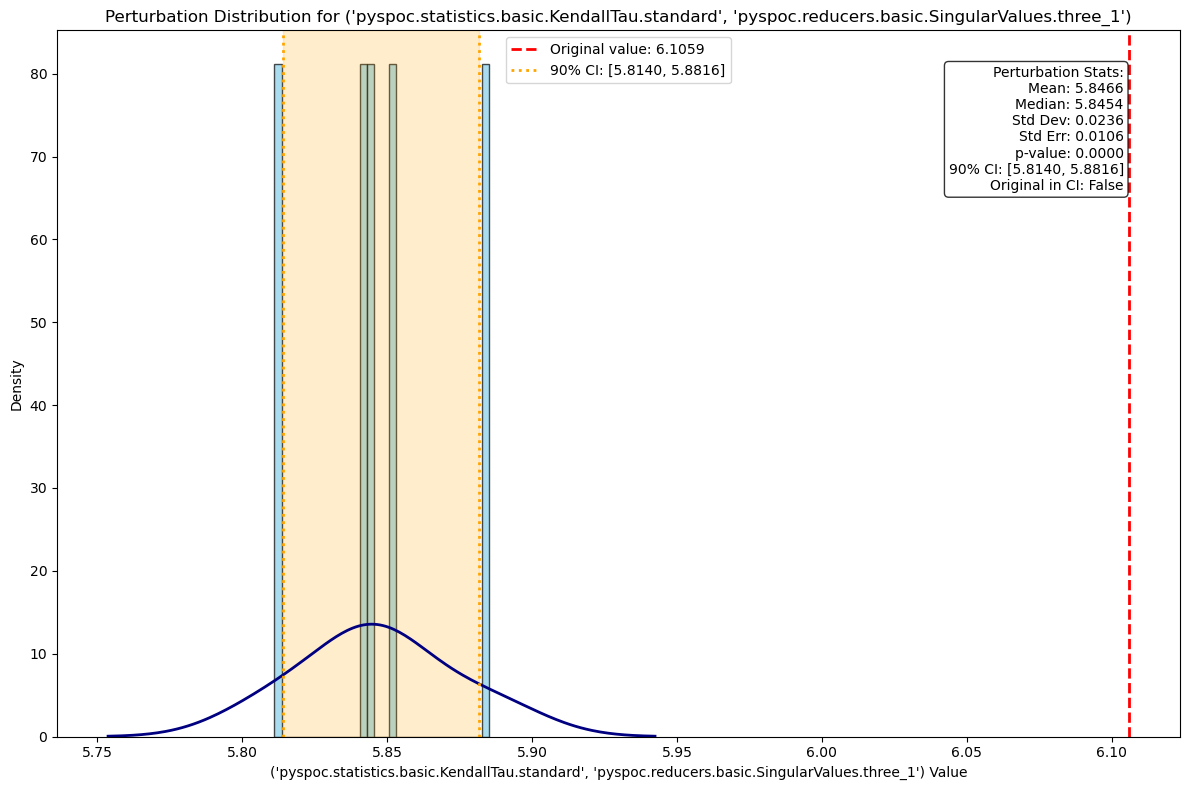

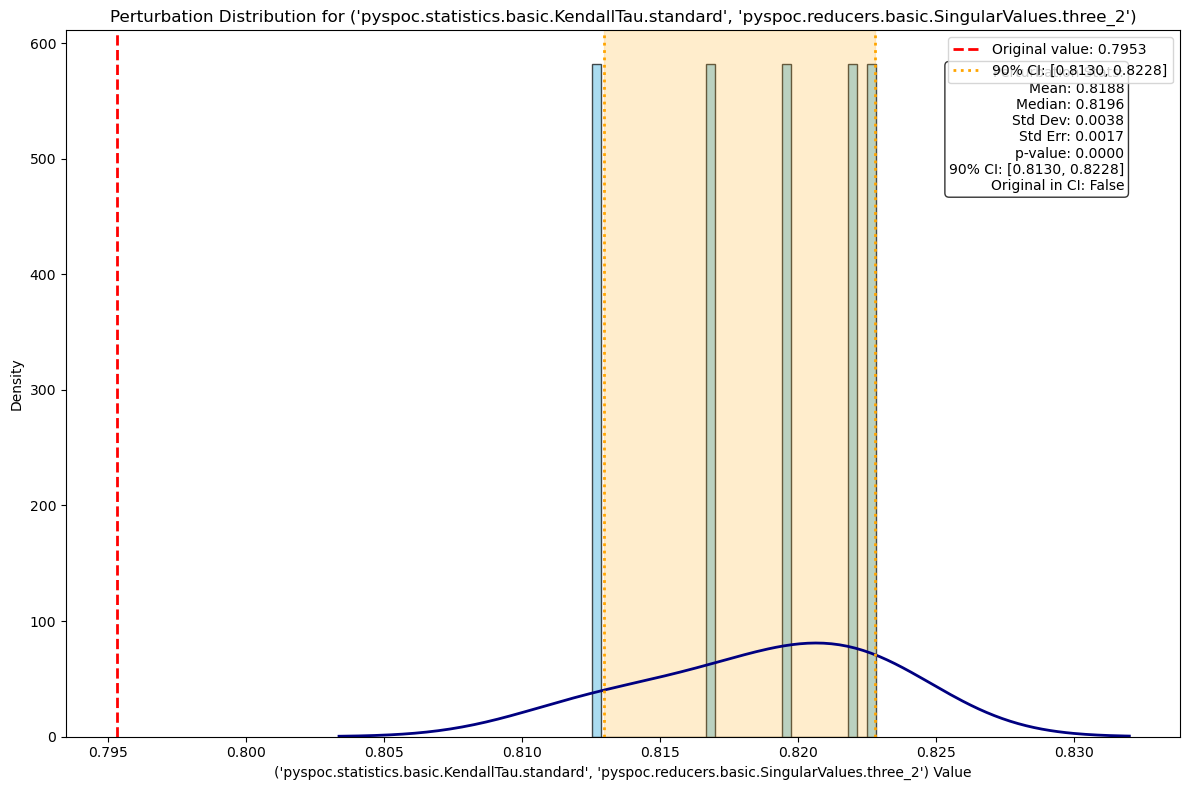

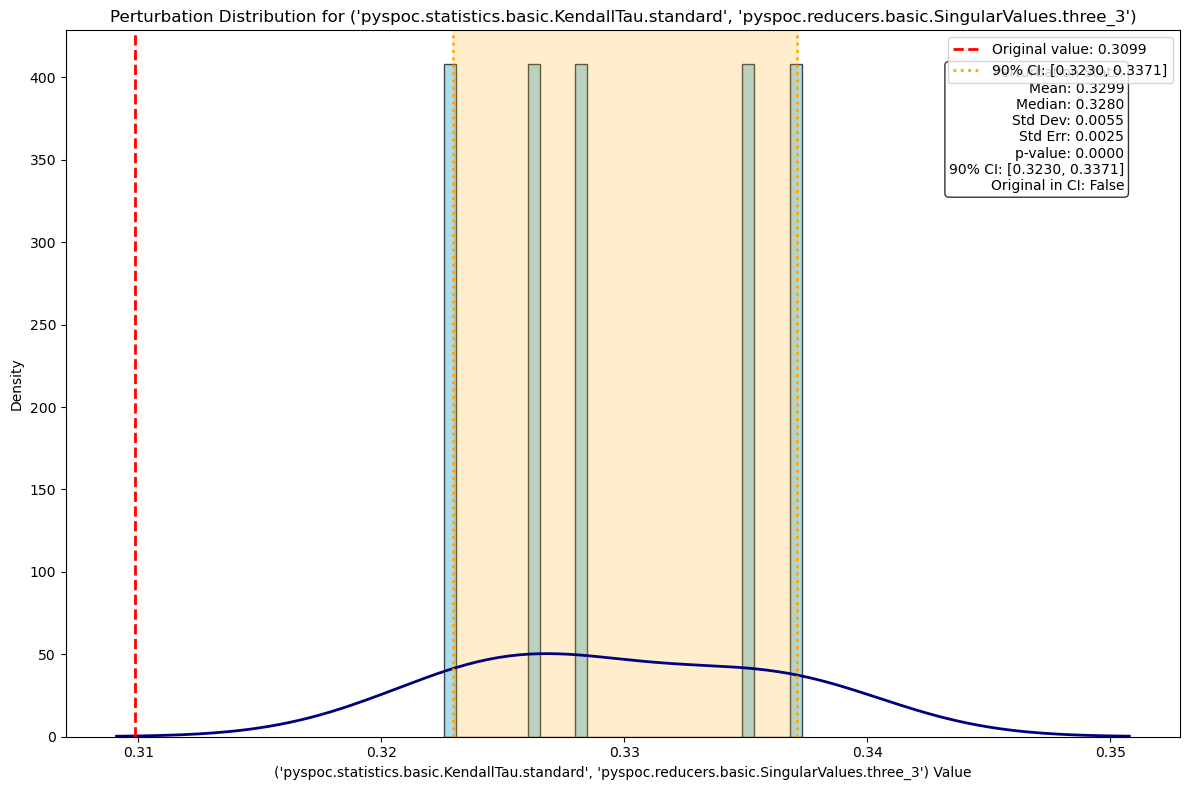

In [30]:
df = pd.read_csv("unemployment_rate_by_age_groups.csv")
perturb = perturbation_test(
    df,
    "test_config_yml",
    yaml_str_stat_reduce,
    orig_calc_table,
    n_perturbations=5,
    normalize=normalize,
    random_seed=random_seed,
    save_perturbation_data=True,
    orig_calc_table=orig_calc_table
)
plot_all_perturbation_distributions(perturb)

In [31]:
def run_analysis(
    df: pd.DataFrame,
    config_name,
    yaml,
    n_permutations: int = 1000,
    n_bootstrap_row: int = 1000,
    n_bootstrap_col: int = 1000,
    n_perturbations: int = 1000,
    scale_factor: float = 0.1,
    bootstrap_sample_fraction_row: float = 0.9,
    bootstrap_sample_fraction_col: float = 0.9,
    normalize: Optional[str] = None,
    random_seed: Optional[int] = None,
    pdf_output: str = None
) -> Dict:
    """
    Run a comprehensive permutation and bootstrap analysis with combined visualizations and detailed summaries.
    """
    print(f"{n_permutations} permutations, {n_bootstrap_row} row bootstrap samples, {n_bootstrap_col} column bootstrap samples, {n_perturbations} perturbations")

    # Calculate orig_calc_table once
    orig_calc_table = pyspi_calc(df, config_name,yaml, normalize=normalize)

    # Permutation test
    print("Permutation analysis:")
    permutation_results = permutation_test(
        df,
        config_name,
        yaml,
        orig_calc_table,
        n_permutations=n_permutations,
        normalize=normalize,
        random_seed=random_seed,
        save_permutation_data=True,
        orig_calc_table=orig_calc_table,
    )

    # Row bootstrap test
    print("Row bootstrap analysis:")
    bootstrap_results = bootstrap_test(
        df,
        config_name,
        yaml,
        orig_calc_table,
        n_bootstrap=n_bootstrap_row,
        sample_fraction=bootstrap_sample_fraction_row,
        normalize=normalize,
        random_seed=random_seed,
        save_bootstrap_data=True,
        orig_calc_table=orig_calc_table,
    )

    print("Column bootstrap analysis (random columns):")
    column_bootstrap_results_random = bootstrap_test_columns(
        df,
        config_name,
        yaml,
        orig_calc_table,
        n_bootstrap_columns=n_bootstrap_col,
        sample_fraction_columns=bootstrap_sample_fraction_col,
        normalize=normalize,
        random_seed=random_seed,
        save_bootstrap_data=True,
        orig_calc_table=orig_calc_table,
    )


    # Perturbation test
    print("Perturbation analysis:")
    perturbation_results = perturbation_test(
        df,
        config_name,
        yaml,
        orig_calc_table,
        n_perturbations=n_perturbations,
        scale_factor=scale_factor,
        normalize=normalize,
        random_seed=random_seed,
        save_perturbation_data=True,
        orig_calc_table=orig_calc_table,
    )

    # Combine results
    results = {
        'permutation_results': permutation_results,
        'row_bootstrap_results': bootstrap_results,
        'column_bootstrap_results_random': column_bootstrap_results_random,
        'perturbation_results': perturbation_results,
        'metadata': {
            'n_permutations': n_permutations,
            'n_bootstrap_row': n_bootstrap_row,
            'n_bootstrap_col': n_bootstrap_col,
            'n_perturbations': n_perturbations,
            'scale_factor': scale_factor,
            'bootstrap_sample_fraction_row': bootstrap_sample_fraction_row,
            'bootstrap_sample_fraction_col': bootstrap_sample_fraction_col,
            'normalize': normalize,
            'random_seed': random_seed
        }
    }

    print("Generating permutation distribution plots...")
    permutation_distribution_plots = plot_all_permutation_distributions(permutation_results)
    print("Generating row bootstrap distribution plots...")
    row_bootstrap_plots = plot_all_bootstrap_distributions(bootstrap_results)
    print("Generating column bootstrap (random) distribution plots...")
    column_bootstrap_random_plots = plot_all_bootstrap_distributions_columns(column_bootstrap_results_random)
    print("Generating perturbation distribution plots...")
    perturbation_distribution_plots = plot_all_perturbation_distributions(perturbation_results)

    results['permutation_distribution_plots'] = permutation_distribution_plots
    results['row_bootstrap_plots'] = row_bootstrap_plots
    # results['column_bootstrap_plots'] = column_bootstrap_plots
    results['column_bootstrap_random_plots'] = column_bootstrap_random_plots
    results['perturbation_distribution_plots'] = perturbation_distribution_plots
    with PdfPages(pdf_output) as pdf:
        # Add a metadata page
        fig = plt.figure(figsize=(8, 10))
        plt.axis('off')
        metadata_text = (
            f"Number of permutations: {n_permutations}\n"
            f"Number of bootstrap samples: {n_bootstrap_row}\n"
            f"Row bootstrap sample fraction: {bootstrap_sample_fraction_row:.1%}\n"
            f"Column bootstrap sample fraction: {bootstrap_sample_fraction_row:.1%}\n"
            f"Number of perturbations: {n_perturbations}\n"
            f"Scale factor for perturbations: {scale_factor}\n"
            f"Normalization: {normalize or 'None'}\n"
            f"Random seed: {random_seed or 'None'}\n"
        )

        plt.text(0.5, 0.5, metadata_text, ha='center', va='center', fontsize=10, transform=fig.transFigure)
        pdf.savefig(fig)
        plt.close(fig)

        # Save permutation distribution plots
        for fig in results['permutation_distribution_plots'].values():
            pdf.savefig(fig)
            plt.close(fig)
        # Save row bootstrap distribution plots
        for fig in results['row_bootstrap_plots'].values():
            pdf.savefig(fig)
            plt.close(fig)

        for fig in results['column_bootstrap_random_plots'].values():
            pdf.savefig(fig)
            plt.close(fig)
        # Save perturbation distribution plots
        for fig in results['perturbation_distribution_plots'].values():
            pdf.savefig(fig)
            plt.close(fig)
    return results

In [32]:
df = pd.read_csv("unemployment_rate_by_age_groups.csv")
run_analysis(
    df =df,
    config_name="test_config_yml",
    yaml=yaml_str_stat_reduce,
    n_permutations=10,
    n_bootstrap_row=10,
    n_bootstrap_col=10,
    n_perturbations=10,
    scale_factor=0.1,
    bootstrap_sample_fraction_row=0.9,
    bootstrap_sample_fraction_col=0.9,
    random_seed=42,
    pdf_output="combined_analysis.pdf",
    normalize="z-score"
)

10 permutations, 10 row bootstrap samples, 10 column bootstrap samples, 10 perturbations
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 41.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 656.21it/s]


Calculation complete. Time taken: 0.0791s
Permutation analysis:


  0%|          | 0/10 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 298.70it/s]



Calculation complete. Time taken: 0.1599s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 241.75it/s]



Calculation complete. Time taken: 0.1065s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.30it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 248.77it/s]



Calculation complete. Time taken: 0.1020s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.31it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 101.60it/s]



Calculation complete. Time taken: 0.1181s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.50it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 299.00it/s]



Calculation complete. Time taken: 0.1037s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 288.96it/s]



Calculation complete. Time taken: 0.0952s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 264.22it/s]



Calculation complete. Time taken: 0.0987s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 275.50it/s]



Calculation complete. Time taken: 0.0965s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 243.21it/s]



Calculation complete. Time taken: 0.1505s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.94it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 266.37it/s]


Calculation complete. Time taken: 0.1014s
Row bootstrap analysis:


Bootstrap sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 263.59it/s]



Calculation complete. Time taken: 0.1026s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 289.06it/s]



Calculation complete. Time taken: 0.1021s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 202.16it/s]



Calculation complete. Time taken: 0.1053s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.68it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 121.75it/s]



Calculation complete. Time taken: 0.1178s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.07it/s]



Calculation complete. Time taken: 0.1568s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 157.45it/s]



Calculation complete. Time taken: 0.1737s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 28.85it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 188.15it/s]



Calculation complete. Time taken: 0.1225s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 28.27it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 139.21it/s]



Calculation complete. Time taken: 0.1338s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.43it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 207.10it/s]



Calculation complete. Time taken: 0.1357s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 292.89it/s]


Calculation complete. Time taken: 0.0977s
Column bootstrap analysis (random columns):


Bootstrap sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.66it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 233.44it/s]



Calculation complete. Time taken: 0.1424s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 41.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 273.56it/s]



Calculation complete. Time taken: 0.0869s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 198.65it/s]



Calculation complete. Time taken: 0.0895s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 291.09it/s]



Calculation complete. Time taken: 0.1307s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 221.13it/s]



Calculation complete. Time taken: 0.0842s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 44.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 317.15it/s]



Calculation complete. Time taken: 0.0785s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 27.05it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 227.92it/s]



Calculation complete. Time taken: 0.1276s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 41.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 198.95it/s]



Calculation complete. Time taken: 0.0903s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.27it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 245.47it/s]



Calculation complete. Time taken: 0.0849s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 213.35it/s]



Calculation complete. Time taken: 0.1056s
Perturbation analysis:


Perturbation sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.66it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 305.78it/s]



Calculation complete. Time taken: 0.1013s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 213.22it/s]



Calculation complete. Time taken: 0.1578s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 212.98it/s]



Calculation complete. Time taken: 0.0993s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 227.67it/s]



Calculation complete. Time taken: 0.0970s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 221.23it/s]



Calculation complete. Time taken: 0.1481s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 142.32it/s]



Calculation complete. Time taken: 0.1114s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 125.21it/s]



Calculation complete. Time taken: 0.1901s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.55it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 234.21it/s]



Calculation complete. Time taken: 0.1907s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 175.24it/s]



Calculation complete. Time taken: 0.1729s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 28.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 112.09it/s]



Calculation complete. Time taken: 0.1385s
Generating permutation distribution plots...
Generating row bootstrap distribution plots...


C:\Users\John\AppData\Local\Temp\ipykernel_3700\3426993114.py:177: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


Generating column bootstrap (random) distribution plots...
Generating perturbation distribution plots...


{'permutation_results': {('pyspoc.statistics.basic.Covariance.cov',
   'pyspoc.reducers.basic.SingularValues.three_1'): {'value': 7.011963024163825,
   'p_value': 0.0,
   'permutation_mean': 1.3067358309990913,
   'permutation_median': 1.302941675721627,
   'permutation_std': 0.052552191586895065,
   'permutation_std_err': 0.01661846214481269,
   'permutation_variance': 0.0027617328405857245,
   'permutation_min': 1.2155204107786353,
   'permutation_max': 1.3836300253829699,
   'permutation_distribution': [1.3488598462803516,
    1.290806869115576,
    1.3402153628491884,
    1.3836300253829699,
    1.3740867592980655,
    1.308247264731328,
    1.2474922908547017,
    1.297636086711926,
    1.2608633939881697,
    1.2155204107786353],
   'permutation_percentile_rank': 0.0},
  ('pyspoc.statistics.basic.Covariance.cov',
   'pyspoc.reducers.basic.SingularValues.three_2'): {'value': 0.7714416005245225,
   'p_value': 0.0,
   'permutation_mean': 1.1818871020302155,
   'permutation_median': 

In [33]:
run_analysis(
    df=df,
    config_name="test_config_yml",
    yaml=yaml_str_stat_reduce,
    n_permutations=10,
    n_bootstrap_row=10,
    n_bootstrap_col=10,
    n_perturbations=10,
    scale_factor=0.1,
    bootstrap_sample_fraction_row=0.9,
    bootstrap_sample_fraction_col=0.9,
    random_seed=42,
    pdf_output="combined_analysis_daily_delhi.pdf",
    normalize="z-score"
)

10 permutations, 10 row bootstrap samples, 10 column bootstrap samples, 10 perturbations
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.78it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 429.03it/s]


Calculation complete. Time taken: 0.1374s
Permutation analysis:


  0%|          | 0/10 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 190.28it/s]



Calculation complete. Time taken: 0.1741s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.52it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 178.77it/s]



Calculation complete. Time taken: 0.1671s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.52it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 177.59it/s]



Calculation complete. Time taken: 0.1754s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 174.52it/s]



Calculation complete. Time taken: 0.1536s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.46it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 170.95it/s]



Calculation complete. Time taken: 0.1965s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.62it/s]



Calculation complete. Time taken: 0.1510s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.47it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 178.91it/s]



Calculation complete. Time taken: 0.1684s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.58it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 147.68it/s]



Calculation complete. Time taken: 0.2714s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 135.83it/s]



Calculation complete. Time taken: 0.1779s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 128.78it/s]



Calculation complete. Time taken: 0.1558s
Row bootstrap analysis:


Bootstrap sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 71.72it/s]



Calculation complete. Time taken: 0.2051s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.61it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 176.06it/s]


Calculation complete. Time taken: 0.1488s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.45it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 121.14it/s]



Calculation complete. Time taken: 0.1644s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 167.96it/s]



Calculation complete. Time taken: 0.1875s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 190.31it/s]


Calculation complete. Time taken: 0.1492s
Registering YAML string.


Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 134.39it/s]



Calculation complete. Time taken: 0.1903s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.68it/s]



Calculation complete. Time taken: 0.2255s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 181.68it/s]


Calculation complete. Time taken: 0.1465s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 122.18it/s]


Calculation complete. Time taken: 0.1593s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 203.77it/s]


Calculation complete. Time taken: 0.2376s
Column bootstrap analysis (random columns):


Bootstrap sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 26.86it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 170.37it/s]



Calculation complete. Time taken: 0.1318s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 167.33it/s]



Calculation complete. Time taken: 0.2075s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 123.63it/s]



Calculation complete. Time taken: 0.1493s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 175.57it/s]



Calculation complete. Time taken: 0.1408s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.11it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 141.40it/s]



Calculation complete. Time taken: 0.1454s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 176.68it/s]



Calculation complete. Time taken: 0.1749s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 30.30it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 160.39it/s]



Calculation complete. Time taken: 0.1198s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 171.55it/s]



Calculation complete. Time taken: 0.1469s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 26.78it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 48.00it/s]



Calculation complete. Time taken: 0.1805s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 186.86it/s]



Calculation complete. Time taken: 0.1446s
Perturbation analysis:


Perturbation sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 224.37it/s]



Calculation complete. Time taken: 0.1836s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 157.54it/s]



Calculation complete. Time taken: 0.2237s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.61it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 101.33it/s]



Calculation complete. Time taken: 0.1762s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 152.89it/s]



Calculation complete. Time taken: 0.1499s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 165.34it/s]



Calculation complete. Time taken: 0.2944s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 116.95it/s]



Calculation complete. Time taken: 0.1502s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.35it/s]



Calculation complete. Time taken: 0.1399s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 183.01it/s]



Calculation complete. Time taken: 0.2165s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.46it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 208.03it/s]



Calculation complete. Time taken: 0.1716s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 192.67it/s]


Calculation complete. Time taken: 0.1505s


Generating permutation distribution plots...
Generating row bootstrap distribution plots...


C:\Users\John\AppData\Local\Temp\ipykernel_3700\3426993114.py:177: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


Generating column bootstrap (random) distribution plots...
Generating perturbation distribution plots...


{'permutation_results': {('pyspoc.statistics.basic.Covariance.cov',
   'pyspoc.reducers.basic.SingularValues.three_1'): {'value': 7.011963024163825,
   'p_value': 0.0,
   'permutation_mean': 1.3067358309990913,
   'permutation_median': 1.302941675721627,
   'permutation_std': 0.052552191586895065,
   'permutation_std_err': 0.01661846214481269,
   'permutation_variance': 0.0027617328405857245,
   'permutation_min': 1.2155204107786353,
   'permutation_max': 1.3836300253829699,
   'permutation_distribution': [1.3488598462803516,
    1.290806869115576,
    1.3402153628491884,
    1.3836300253829699,
    1.3740867592980655,
    1.308247264731328,
    1.2474922908547017,
    1.297636086711926,
    1.2608633939881697,
    1.2155204107786353],
   'permutation_percentile_rank': 0.0},
  ('pyspoc.statistics.basic.Covariance.cov',
   'pyspoc.reducers.basic.SingularValues.three_2'): {'value': 0.7714416005245225,
   'p_value': 0.0,
   'permutation_mean': 1.1818871020302155,
   'permutation_median': 

In [34]:
def n_p_plane_analysis_all_reducers(
    df,
    config_name,
    yaml,
    n_grid=np.linspace(0.5, 1.0, 3),
    p_grid=np.linspace(0.5, 1.0, 3),
    n_bootstrap=10,
    normalize='z-score',
    random_seed=42,
    show_errorbars=True
):
    """
    Plot how the average value of each reduced statistic varies in (n,p) subsampling space.
    Shows 2D error bars: vertical from row bootstrap CI, horizontal from column bootstrap CI.
    """
    calc = pyspi_calc(df, config_name, yaml, normalize=normalize)
    REDUCERS = list(calc.columns.values)
    results = {}
    for reducer_name in REDUCERS:
        print(f"Plotting for reducer: {reducer_name}")
        means = np.zeros((len(n_grid), len(p_grid)))
        row_ci_lowers = np.zeros_like(means)
        row_ci_uppers = np.zeros_like(means)
        col_ci_lowers = np.zeros_like(means)
        col_ci_uppers = np.zeros_like(means)

        for i, n_frac in enumerate(n_grid):
            for j, p_frac in enumerate(p_grid):
                # Row bootstrap
                row_bootstrap = bootstrap_test(
                    df, config_name, yaml, calc=calc,
                    n_bootstrap=n_bootstrap, sample_fraction=n_frac, normalize=normalize,
                    random_seed=random_seed, save_bootstrap_data=True
                )
                # Column bootstrap
                col_bootstrap = bootstrap_test_columns(
                    df, config_name, yaml, calc=calc,
                    n_bootstrap_columns=n_bootstrap, sample_fraction_columns=p_frac, normalize=normalize,
                    random_seed=random_seed, save_bootstrap_data=True
                )
                row_mean = row_bootstrap[reducer_name]['bootstrap_mean']
                col_mean = col_bootstrap[reducer_name]['bootstrap_mean']
                means[i, j] = (row_mean + col_mean) / 2

                # Row bootstrap CI (vertical error bar)
                row_ci_lowers[i, j] = row_mean - row_bootstrap[reducer_name]['bootstrap_ci_lower']
                row_ci_uppers[i, j] = row_bootstrap[reducer_name]['bootstrap_ci_upper'] - row_mean
                # Column bootstrap CI (horizontal error bar)
                col_ci_lowers[i, j] = col_mean - col_bootstrap[reducer_name]['bootstrap_ci_lower']
                col_ci_uppers[i, j] = col_bootstrap[reducer_name]['bootstrap_ci_upper'] - col_mean

        # Plotting
        fig, ax = plt.subplots(figsize=(8, 6))
        c = ax.imshow(means, origin='lower', aspect='auto',
                    extent=[p_grid[0], p_grid[-1], n_grid[0], n_grid[-1]],
                    cmap='viridis')
        plt.colorbar(c, ax=ax, label=f'Average {reducer_name}')

        ax.set_xlabel('Column bootstrap fraction (p)')
        ax.set_ylabel('Row bootstrap fraction (n)')
        ax.set_title(f'Average {reducer_name} in (n, p) subsampling space')

        # Overlay 2D error bars
        if show_errorbars:
            for i, n_frac in enumerate(n_grid):
                for j, p_frac in enumerate(p_grid):
                    mean = means[i, j]
                    ax.errorbar(
                        p_frac, n_frac,
                        yerr=[[row_ci_lowers[i, j]], [row_ci_uppers[i, j]]],
                        xerr=[[col_ci_lowers[i, j]], [col_ci_uppers[i, j]]],
                        fmt='o', color='white', capsize=2, alpha=0.7
                    )

        plt.show()
        results[reducer_name] = (means, row_ci_lowers, row_ci_uppers, col_ci_lowers, col_ci_uppers)
    return results


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 291.93it/s]



Calculation complete. Time taken: 0.2108s
Plotting for reducer: ('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_1')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 526.02it/s]



Calculation complete. Time taken: 0.1661s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 170.29it/s]



Calculation complete. Time taken: 0.4151s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 240.69it/s]



Calculation complete. Time taken: 0.2338s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 173.10it/s]



Calculation complete. Time taken: 0.1746s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1342.89it/s]



Calculation complete. Time taken: 0.1685s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.55it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 137.72it/s]



Calculation complete. Time taken: 0.0953s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.05it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 108.64it/s]



Calculation complete. Time taken: 0.2755s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 140.46it/s]



Calculation complete. Time taken: 0.1852s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 664.25it/s]


Calculation complete. Time taken: 0.2246s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.43it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 99.82it/s]



Calculation complete. Time taken: 0.2950s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 111.54it/s]



Calculation complete. Time taken: 0.5244s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 68.14it/s]



Calculation complete. Time taken: 0.2907s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 567.18it/s]


Calculation complete. Time taken: 0.2202s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 51.03it/s]



Calculation complete. Time taken: 0.3009s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 108.92it/s]



Calculation complete. Time taken: 0.2251s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 83.55it/s]



Calculation complete. Time taken: 0.1717s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 89.79it/s]


Calculation complete. Time taken: 0.1845s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 243.84it/s]



Calculation complete. Time taken: 0.3717s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.26it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 138.81it/s]



Calculation complete. Time taken: 0.2195s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 108.85it/s]



Calculation complete. Time taken: 0.2774s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 271.24it/s]



Calculation complete. Time taken: 0.1849s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 96.06it/s]



Calculation complete. Time taken: 0.3326s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 147.45it/s]



Calculation complete. Time taken: 0.1874s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.31it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 177.11it/s]



Calculation complete. Time taken: 0.2234s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 306.97it/s]


Calculation complete. Time taken: 0.2589s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.59it/s]



Calculation complete. Time taken: 0.2003s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 198.35it/s]



Calculation complete. Time taken: 0.3059s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 130.33it/s]



Calculation complete. Time taken: 0.2053s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 478.26it/s]



Calculation complete. Time taken: 0.1846s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 40.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 90.17it/s]


Calculation complete. Time taken: 0.1156s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.



Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 102.42it/s]



Calculation complete. Time taken: 0.1388s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.49it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 164.73it/s]



Calculation complete. Time taken: 0.0968s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 943.88it/s]


Calculation complete. Time taken: 0.1498s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.03it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 146.59it/s]



Calculation complete. Time taken: 0.2718s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 64.03it/s]



Calculation complete. Time taken: 0.2467s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.99it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.39it/s]



Calculation complete. Time taken: 0.3096s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 213.18it/s]


Calculation complete. Time taken: 0.1870s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.78it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 115.69it/s]



Calculation complete. Time taken: 0.1926s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 104.94it/s]



Calculation complete. Time taken: 0.2470s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 167.98it/s]



Calculation complete. Time taken: 0.1595s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.44it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 273.68it/s]


Calculation complete. Time taken: 0.1765s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 117.10it/s]



Calculation complete. Time taken: 0.3047s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 204.51it/s]



Calculation complete. Time taken: 0.2774s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.41it/s]



Calculation complete. Time taken: 0.2149s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 278.45it/s]


Calculation complete. Time taken: 0.1635s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 99.30it/s]



Calculation complete. Time taken: 0.6030s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 84.11it/s]



Calculation complete. Time taken: 0.5780s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.02it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 139.20it/s]



Calculation complete. Time taken: 0.2548s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 859.14it/s]


Calculation complete. Time taken: 0.3021s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 158.80it/s]



Calculation complete. Time taken: 0.2939s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.78it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 398.80it/s]



Calculation complete. Time taken: 0.2544s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 158.04it/s]



Calculation complete. Time taken: 0.1963s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 273.61it/s]



Calculation complete. Time taken: 0.1580s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 99.90it/s]


Calculation complete. Time taken: 0.1282s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.


    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 50.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 53.86it/s]



Calculation complete. Time taken: 0.1195s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 45.39it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 133.04it/s]



Calculation complete. Time taken: 0.0913s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 733.06it/s]


Calculation complete. Time taken: 0.2769s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.66it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 145.06it/s]



Calculation complete. Time taken: 0.2429s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 147.16it/s]



Calculation complete. Time taken: 0.2430s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 117.80it/s]



Calculation complete. Time taken: 0.2235s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.19it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 199.76it/s]


Calculation complete. Time taken: 0.2013s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 158.30it/s]



Calculation complete. Time taken: 0.1717s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.71it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 121.16it/s]



Calculation complete. Time taken: 0.2197s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 118.05it/s]



Calculation complete. Time taken: 0.1911s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 140.57it/s]


Calculation complete. Time taken: 0.2400s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 175.37it/s]



Calculation complete. Time taken: 0.3081s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 135.89it/s]



Calculation complete. Time taken: 0.1976s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 245.43it/s]



Calculation complete. Time taken: 0.1880s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 356.94it/s]


Calculation complete. Time taken: 0.2591s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 179.11it/s]



Calculation complete. Time taken: 0.2110s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 49.84it/s]



Calculation complete. Time taken: 0.2820s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 115.96it/s]



Calculation complete. Time taken: 0.2438s


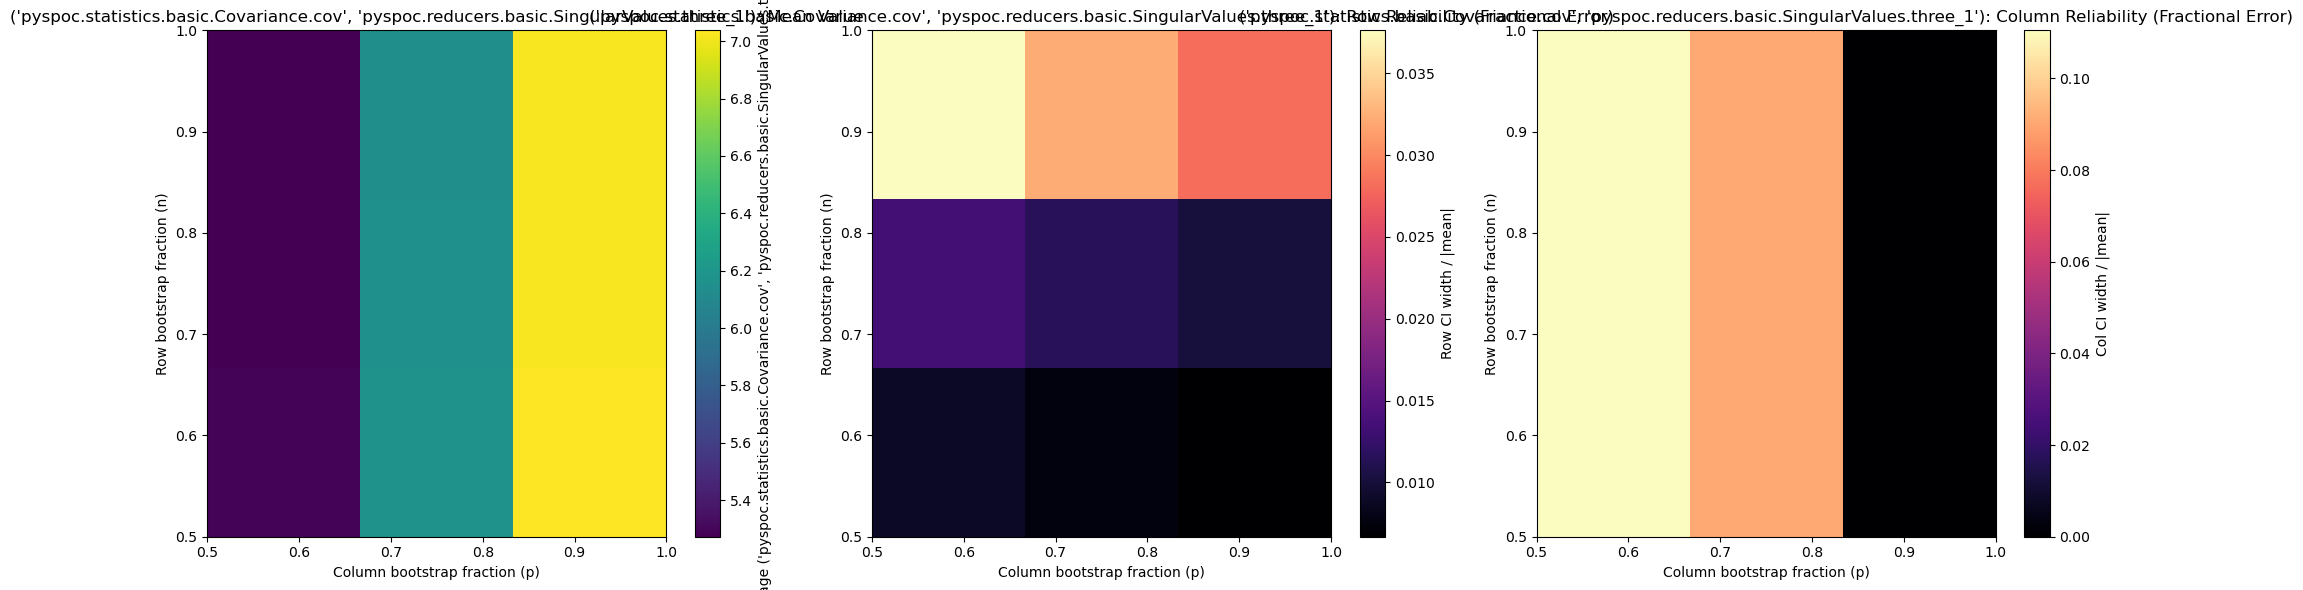

Plotting for reducer: ('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_2')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 214.74it/s]


Calculation complete. Time taken: 0.3523s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 66.41it/s]



Calculation complete. Time taken: 0.4478s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 97.76it/s]



Calculation complete. Time taken: 0.2817s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 136.16it/s]



Calculation complete. Time taken: 0.2323s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 519.18it/s]


Calculation complete. Time taken: 0.2885s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 26.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 72.82it/s]



Calculation complete. Time taken: 0.1603s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.02it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 121.31it/s]



Calculation complete. Time taken: 0.1083s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 96.83it/s]



Calculation complete. Time taken: 0.1151s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 239.25it/s]


Calculation complete. Time taken: 0.2952s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.33it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 73.07it/s]



Calculation complete. Time taken: 0.2711s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 138.92it/s]



Calculation complete. Time taken: 0.2864s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 121.43it/s]



Calculation complete. Time taken: 0.4244s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 313.91it/s]



Calculation complete. Time taken: 0.2729s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 126.42it/s]



Calculation complete. Time taken: 0.2010s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.64it/s]



Calculation complete. Time taken: 0.2179s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.30it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 202.57it/s]



Calculation complete. Time taken: 0.2169s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 246.80it/s]



Calculation complete. Time taken: 0.1720s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.98it/s]



Calculation complete. Time taken: 0.3911s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.49it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.33it/s]



Calculation complete. Time taken: 0.2143s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.40it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 134.68it/s]



Calculation complete. Time taken: 0.2889s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 281.52it/s]


Calculation complete. Time taken: 0.2169s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 72.59it/s]



Calculation complete. Time taken: 0.3239s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.73it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 102.52it/s]



Calculation complete. Time taken: 0.3164s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 145.41it/s]



Calculation complete. Time taken: 0.4475s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.73it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 850.60it/s]


Calculation complete. Time taken: 0.1870s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 127.62it/s]



Calculation complete. Time taken: 0.2741s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 139.78it/s]



Calculation complete. Time taken: 0.3417s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.27it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 181.14it/s]



Calculation complete. Time taken: 0.2044s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1473.06it/s]


Calculation complete. Time taken: 0.2188s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.16it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 169.46it/s]



Calculation complete. Time taken: 0.1071s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 40.42it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 72.71it/s]



Calculation complete. Time taken: 0.1290s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 28.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 104.76it/s]



Calculation complete. Time taken: 0.1488s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 314.55it/s]


Calculation complete. Time taken: 0.3657s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 72.51it/s]



Calculation complete. Time taken: 0.3425s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 100.48it/s]



Calculation complete. Time taken: 0.4133s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 92.75it/s]



Calculation complete. Time taken: 0.3934s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 427.35it/s]


Calculation complete. Time taken: 0.3902s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 98.04it/s]



Calculation complete. Time taken: 0.2969s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 85.39it/s]



Calculation complete. Time taken: 0.4244s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 94.53it/s]



Calculation complete. Time taken: 0.2938s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 138.63it/s]


Calculation complete. Time taken: 0.3236s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 138.06it/s]



Calculation complete. Time taken: 0.3086s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 94.11it/s]



Calculation complete. Time taken: 0.4732s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 92.51it/s]



Calculation complete. Time taken: 0.3245s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.31it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 976.56it/s]


Calculation complete. Time taken: 0.3359s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.79it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 169.30it/s]



Calculation complete. Time taken: 0.3263s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.79it/s]



Calculation complete. Time taken: 0.3445s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.33it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 76.24it/s]



Calculation complete. Time taken: 0.3110s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 314.10it/s]


Calculation complete. Time taken: 0.3293s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 151.53it/s]



Calculation complete. Time taken: 0.2878s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 177.77it/s]



Calculation complete. Time taken: 0.3259s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 173.57it/s]



Calculation complete. Time taken: 0.2375s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 308.04it/s]



Calculation complete. Time taken: 0.1777s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 196.24it/s]



Calculation complete. Time taken: 0.1136s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 87.84it/s]



Calculation complete. Time taken: 0.1786s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 181.62it/s]



Calculation complete. Time taken: 0.1031s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 329.55it/s]


Calculation complete. Time taken: 0.3806s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 111.11it/s]



Calculation complete. Time taken: 0.4114s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 140.98it/s]



Calculation complete. Time taken: 0.3822s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.61it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 134.72it/s]



Calculation complete. Time taken: 0.2656s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 840.71it/s]


Calculation complete. Time taken: 0.2272s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 76.84it/s]



Calculation complete. Time taken: 0.1943s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 52.38it/s]



Calculation complete. Time taken: 0.2814s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.94it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.19it/s]



Calculation complete. Time taken: 0.3986s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 719.15it/s]


Calculation complete. Time taken: 0.2123s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 86.55it/s]



Calculation complete. Time taken: 0.4695s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.99it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 217.76it/s]



Calculation complete. Time taken: 0.2467s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 172.87it/s]



Calculation complete. Time taken: 0.2634s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 414.73it/s]



Calculation complete. Time taken: 0.1709s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 108.34it/s]



Calculation complete. Time taken: 0.2948s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 219.34it/s]



Calculation complete. Time taken: 0.3126s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 198.55it/s]



Calculation complete. Time taken: 0.2326s


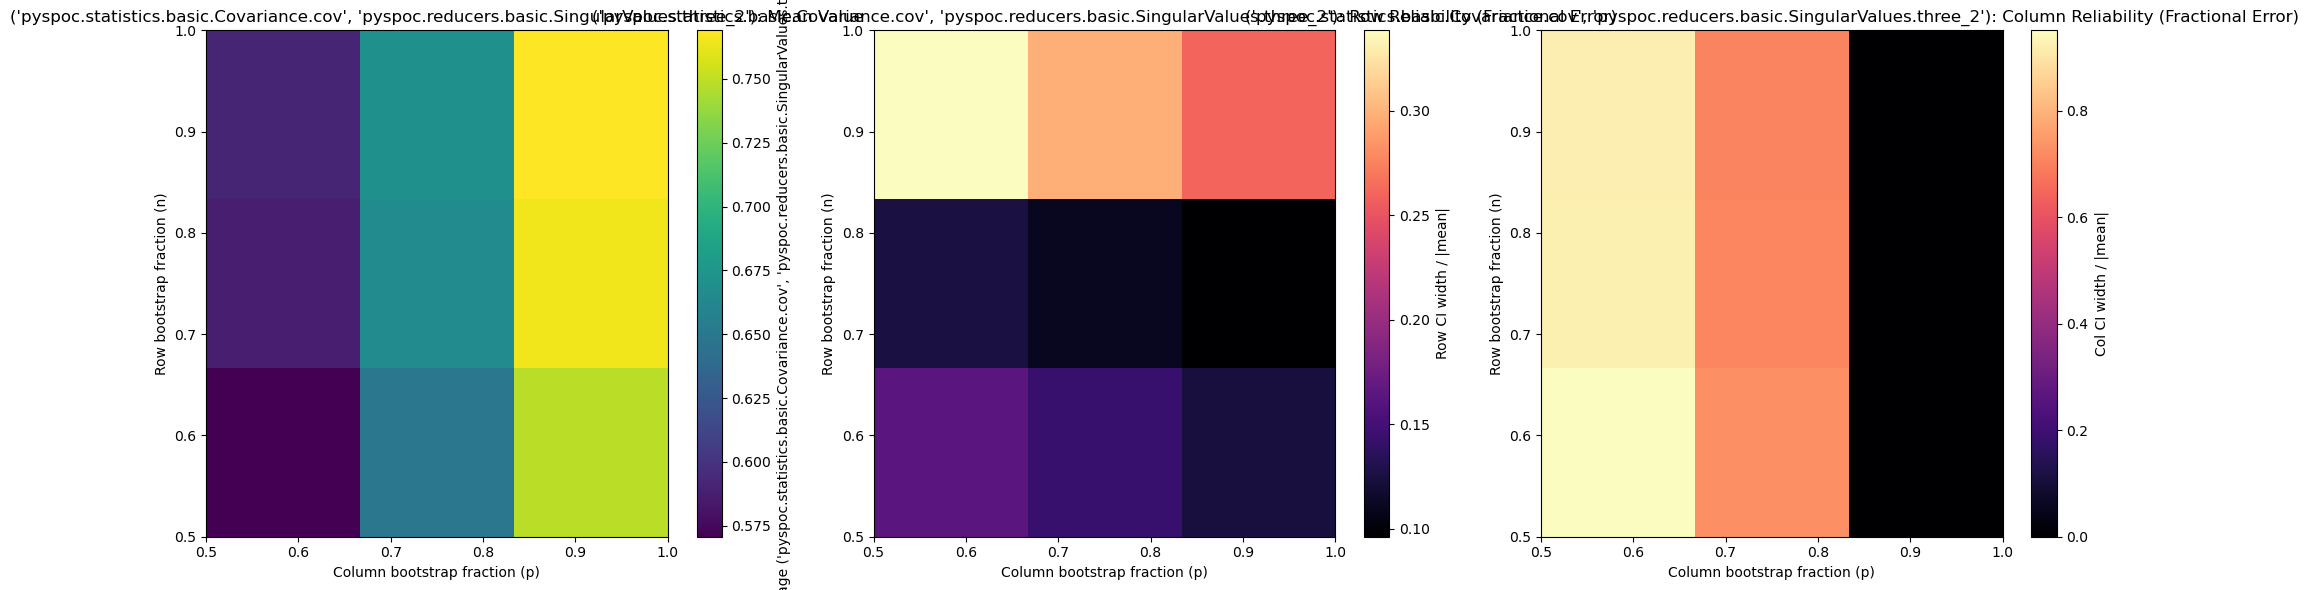

Plotting for reducer: ('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.SingularValues.three_3')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.44it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 349.09it/s]


Calculation complete. Time taken: 0.1935s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 174.46it/s]



Calculation complete. Time taken: 0.4059s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 171.41it/s]



Calculation complete. Time taken: 0.2388s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.98it/s]



Calculation complete. Time taken: 0.2094s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 387.48it/s]


Calculation complete. Time taken: 0.2519s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 57.05it/s]



Calculation complete. Time taken: 0.1386s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 96.07it/s]



Calculation complete. Time taken: 0.1238s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.82it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 118.68it/s]



Calculation complete. Time taken: 0.1017s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 530.68it/s]


Calculation complete. Time taken: 0.2794s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 111.48it/s]



Calculation complete. Time taken: 0.2591s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 136.36it/s]



Calculation complete. Time taken: 0.2671s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 175.78it/s]



Calculation complete. Time taken: 0.2584s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 601.22it/s]


Calculation complete. Time taken: 0.2106s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.43it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 100.59it/s]



Calculation complete. Time taken: 0.1991s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 85.34it/s]



Calculation complete. Time taken: 0.1847s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.58it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 135.00it/s]



Calculation complete. Time taken: 0.2190s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.96it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 235.66it/s]


Calculation complete. Time taken: 0.2017s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 126.48it/s]



Calculation complete. Time taken: 0.2593s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 95.07it/s]



Calculation complete. Time taken: 0.3030s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 114.55it/s]



Calculation complete. Time taken: 0.3789s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 188.28it/s]


Calculation complete. Time taken: 0.3447s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.30it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 157.88it/s]



Calculation complete. Time taken: 0.3456s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 195.76it/s]



Calculation complete. Time taken: 0.3875s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 141.24it/s]



Calculation complete. Time taken: 0.2608s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 835.46it/s]



Calculation complete. Time taken: 0.2736s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 127.43it/s]



Calculation complete. Time taken: 0.3045s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 177.79it/s]



Calculation complete. Time taken: 0.2750s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.74it/s]



Calculation complete. Time taken: 0.3278s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 239.53it/s]


Calculation complete. Time taken: 0.1937s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 110.88it/s]


Calculation complete. Time taken: 0.1193s
Registering YAML string.


Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 43.03it/s]



Calculation complete. Time taken: 0.4953s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 49.92it/s]



Calculation complete. Time taken: 0.4501s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 173.57it/s]


Calculation complete. Time taken: 0.9984s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 76.42it/s]



Calculation complete. Time taken: 0.7194s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 94.27it/s]



Calculation complete. Time taken: 0.8043s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 101.10it/s]



Calculation complete. Time taken: 0.2529s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 260.07it/s]


Calculation complete. Time taken: 0.3101s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 101.29it/s]



Calculation complete. Time taken: 0.2735s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 47.05it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 266.73it/s]



Calculation complete. Time taken: 0.0767s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 297.40it/s]



Calculation complete. Time taken: 0.1111s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1243.49it/s]


Calculation complete. Time taken: 0.0953s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 28.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 257.23it/s]



Calculation complete. Time taken: 0.1228s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.96it/s]



Calculation complete. Time taken: 0.1772s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 314.82it/s]



Calculation complete. Time taken: 0.1428s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 523.15it/s]


Calculation complete. Time taken: 0.0966s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 115.10it/s]



Calculation complete. Time taken: 0.3150s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 85.50it/s]



Calculation complete. Time taken: 0.3470s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.15it/s]



Calculation complete. Time taken: 0.3824s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.58it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 284.21it/s]



Calculation complete. Time taken: 0.2776s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 150.57it/s]



Calculation complete. Time taken: 0.4380s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.03it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 261.18it/s]


Calculation complete. Time taken: 0.1386s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 158.47it/s]



Calculation complete. Time taken: 0.2082s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 26.39it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 449.23it/s]



Calculation complete. Time taken: 0.1225s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 40.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 127.49it/s]



Calculation complete. Time taken: 0.1004s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 213.91it/s]



Calculation complete. Time taken: 0.0950s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 79.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 201.88it/s]



Calculation complete. Time taken: 0.0544s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.57it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 494.44it/s]


Calculation complete. Time taken: 0.0916s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 191.56it/s]



Calculation complete. Time taken: 0.1981s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 27.27it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 238.83it/s]



Calculation complete. Time taken: 0.1251s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 310.57it/s]



Calculation complete. Time taken: 0.1046s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 500.87it/s]



Calculation complete. Time taken: 0.1280s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 117.08it/s]



Calculation complete. Time taken: 0.1711s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.31it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 141.85it/s]



Calculation complete. Time taken: 0.2257s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 144.31it/s]



Calculation complete. Time taken: 0.1526s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 351.98it/s]


Calculation complete. Time taken: 0.3151s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 137.30it/s]



Calculation complete. Time taken: 0.2421s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 119.66it/s]



Calculation complete. Time taken: 0.3927s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 84.03it/s]



Calculation complete. Time taken: 0.3351s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.74it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 248.85it/s]


Calculation complete. Time taken: 0.2732s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 117.77it/s]



Calculation complete. Time taken: 0.3681s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 107.05it/s]



Calculation complete. Time taken: 0.4528s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.33it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 117.21it/s]



Calculation complete. Time taken: 0.2946s


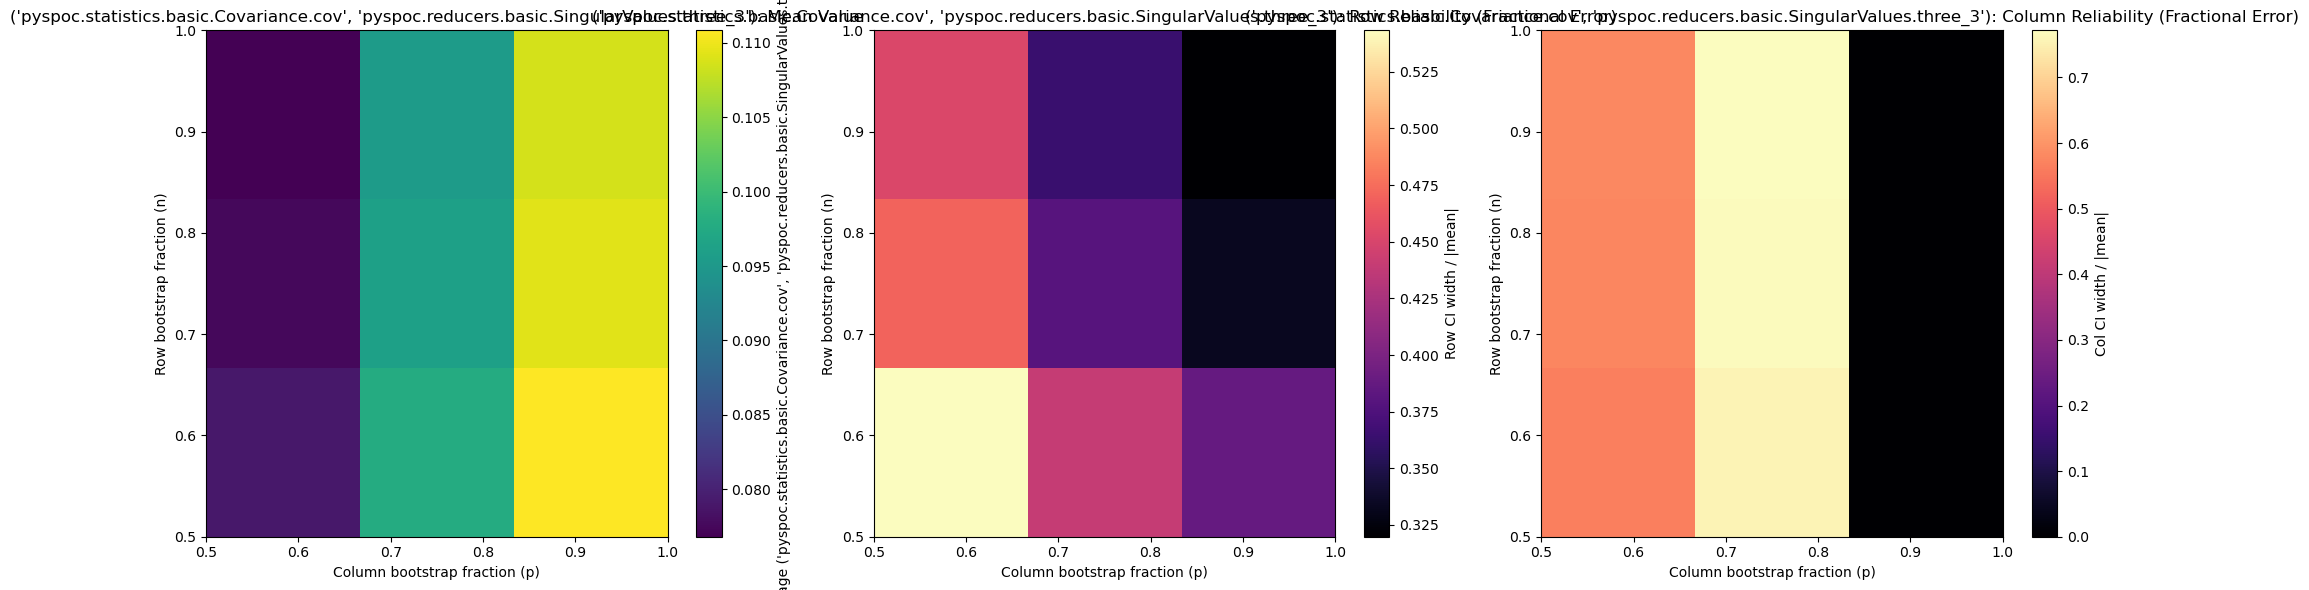

Plotting for reducer: ('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.Determinant.scaled')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 314.48it/s]


Calculation complete. Time taken: 0.3434s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 139.13it/s]



Calculation complete. Time taken: 0.2356s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 199.73it/s]



Calculation complete. Time taken: 0.1814s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.91it/s]



Calculation complete. Time taken: 0.1979s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 193.24it/s]



Calculation complete. Time taken: 0.2780s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 84.70it/s]



Calculation complete. Time taken: 0.1287s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.27it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 105.85it/s]



Calculation complete. Time taken: 0.1562s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.99it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 173.80it/s]



Calculation complete. Time taken: 0.0882s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 381.68it/s]


Calculation complete. Time taken: 0.1889s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 27.05it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 353.28it/s]



Calculation complete. Time taken: 0.1231s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 224.03it/s]



Calculation complete. Time taken: 0.1062s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 186.29it/s]



Calculation complete. Time taken: 0.1108s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 314.33it/s]


Calculation complete. Time taken: 0.2465s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.49it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 201.88it/s]


Calculation complete. Time taken: 0.1125s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.



Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 211.06it/s]



Calculation complete. Time taken: 0.1102s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 46.46it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 194.34it/s]



Calculation complete. Time taken: 0.0826s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.30it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.30it/s]


Calculation complete. Time taken: 0.2727s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 184.83it/s]



Calculation complete. Time taken: 0.3507s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 133.76it/s]



Calculation complete. Time taken: 0.2279s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 154.17it/s]



Calculation complete. Time taken: 0.2722s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.82it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 334.28it/s]


Calculation complete. Time taken: 0.2658s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 90.30it/s]



Calculation complete. Time taken: 0.4170s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.57it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.54it/s]



Calculation complete. Time taken: 0.2230s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.61it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 351.64it/s]



Calculation complete. Time taken: 0.1552s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 707.30it/s]


Calculation complete. Time taken: 0.0861s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 201.57it/s]


Calculation complete. Time taken: 0.1642s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.



Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 114.01it/s]



Calculation complete. Time taken: 0.2313s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  6.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 152.46it/s]



Calculation complete. Time taken: 0.4608s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.43it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 200.58it/s]


Calculation complete. Time taken: 0.2443s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 100.26it/s]



Calculation complete. Time taken: 0.1132s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 50.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 111.38it/s]



Calculation complete. Time taken: 0.0888s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 137.86it/s]



Calculation complete. Time taken: 0.1525s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 334.21it/s]



Calculation complete. Time taken: 0.2603s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 85.94it/s]



Calculation complete. Time taken: 0.5228s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.55it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 98.57it/s]



Calculation complete. Time taken: 0.4398s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 79.16it/s]



Calculation complete. Time taken: 0.4169s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 315.36it/s]


Calculation complete. Time taken: 0.2190s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.30it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.89it/s]



Calculation complete. Time taken: 0.2847s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 91.14it/s]



Calculation complete. Time taken: 0.3160s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 120.32it/s]



Calculation complete. Time taken: 0.1693s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 194.84it/s]


Calculation complete. Time taken: 0.2791s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 203.16it/s]



Calculation complete. Time taken: 0.4599s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 127.64it/s]



Calculation complete. Time taken: 0.3021s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.79it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 91.15it/s]



Calculation complete. Time taken: 0.2507s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 862.67it/s]


Calculation complete. Time taken: 0.1746s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 189.28it/s]



Calculation complete. Time taken: 0.1835s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 26.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 227.10it/s]



Calculation complete. Time taken: 0.1307s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 181.14it/s]



Calculation complete. Time taken: 0.1628s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 460.95it/s]


Calculation complete. Time taken: 0.0849s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 26.03it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 188.00it/s]



Calculation complete. Time taken: 0.1352s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 29.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 268.18it/s]



Calculation complete. Time taken: 0.1163s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 294.59it/s]



Calculation complete. Time taken: 0.0953s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 885.43it/s]


Calculation complete. Time taken: 0.1250s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 87.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 256.03it/s]



Calculation complete. Time taken: 0.0486s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 80.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 257.11it/s]



Calculation complete. Time taken: 0.0501s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 53.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 231.33it/s]


Calculation complete. Time taken: 0.0727s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 854.41it/s]


Calculation complete. Time taken: 0.0913s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 323.04it/s]


Calculation complete. Time taken: 0.1527s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.



Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 359.03it/s]



Calculation complete. Time taken: 0.0942s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.79it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 399.22it/s]



Calculation complete. Time taken: 0.0904s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 695.42it/s]


Calculation complete. Time taken: 0.0755s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 54.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 304.22it/s]



Calculation complete. Time taken: 0.0656s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 47.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 260.57it/s]



Calculation complete. Time taken: 0.0782s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 27.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 302.76it/s]



Calculation complete. Time taken: 0.1211s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 972.71it/s]


Calculation complete. Time taken: 0.0964s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 190.00it/s]


Calculation complete. Time taken: 0.1588s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 325.66it/s]



Calculation complete. Time taken: 0.1040s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 274.53it/s]



Calculation complete. Time taken: 0.0948s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 661.91it/s]


Calculation complete. Time taken: 0.0777s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.19it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 279.54it/s]



Calculation complete. Time taken: 0.1544s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 252.34it/s]



Calculation complete. Time taken: 0.1005s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 171.93it/s]



Calculation complete. Time taken: 0.2034s


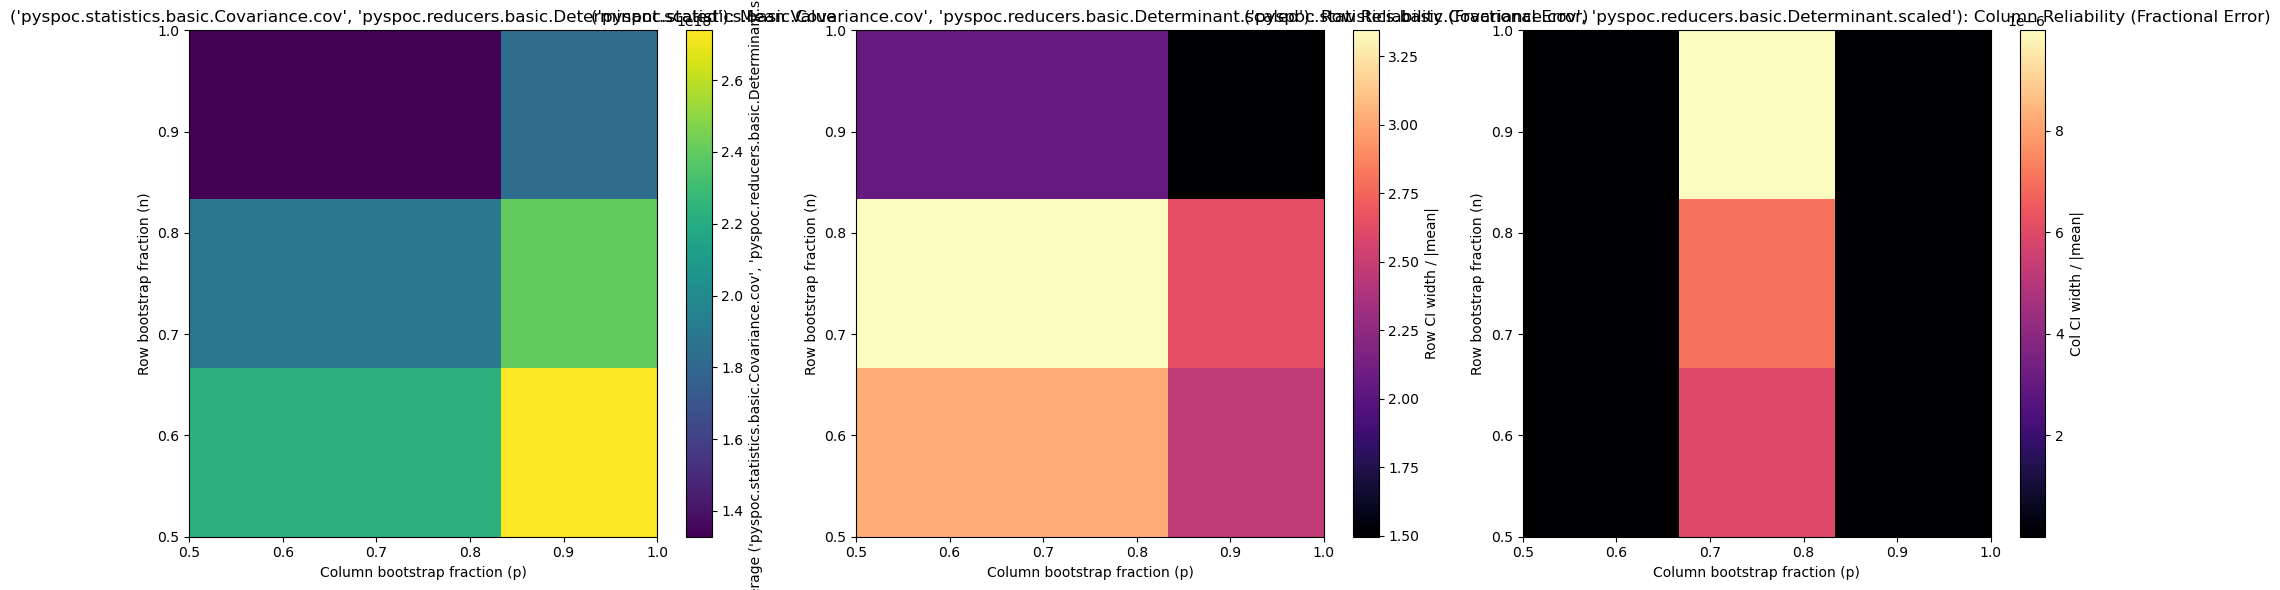

Plotting for reducer: ('pyspoc.statistics.basic.Covariance.cov', 'pyspoc.reducers.basic.Determinant.non-scaled')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 976.71it/s]


Calculation complete. Time taken: 0.0746s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 402.98it/s]



Calculation complete. Time taken: 0.1371s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 314.03it/s]



Calculation complete. Time taken: 0.0934s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 340.15it/s]



Calculation complete. Time taken: 0.1286s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 949.37it/s]


Calculation complete. Time taken: 0.0764s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 97.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.38it/s]



Calculation complete. Time taken: 0.0500s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 57.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 425.80it/s]


Calculation complete. Time taken: 0.0616s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.



Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 94.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 253.57it/s]



Calculation complete. Time taken: 0.0458s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 40.16it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 614.46it/s]


Calculation complete. Time taken: 0.0829s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.58it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 240.37it/s]



Calculation complete. Time taken: 0.1539s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 153.61it/s]


Calculation complete. Time taken: 0.1586s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 284.72it/s]



Calculation complete. Time taken: 0.3091s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.71it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 344.35it/s]


Calculation complete. Time taken: 0.0884s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.79it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.19it/s]



Calculation complete. Time taken: 0.1769s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 30.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 213.30it/s]



Calculation complete. Time taken: 0.1132s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.79it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 227.98it/s]



Calculation complete. Time taken: 0.2728s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 536.15it/s]


Calculation complete. Time taken: 0.1985s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 91.14it/s]



Calculation complete. Time taken: 0.6542s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.33it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 156.08it/s]



Calculation complete. Time taken: 0.2657s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 94.00it/s]



Calculation complete. Time taken: 0.3949s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.18it/s]



Calculation complete. Time taken: 0.4305s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  6.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 103.79it/s]



Calculation complete. Time taken: 0.4625s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 48.08it/s]



Calculation complete. Time taken: 0.4636s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 182.11it/s]



Calculation complete. Time taken: 0.4176s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.94it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 601.77it/s]


Calculation complete. Time taken: 0.1437s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.50it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 221.19it/s]



Calculation complete. Time taken: 0.2782s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 252.36it/s]



Calculation complete. Time taken: 0.1073s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.73it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 254.41it/s]



Calculation complete. Time taken: 0.1586s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.99it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 576.11it/s]


Calculation complete. Time taken: 0.0907s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 67.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 80.17it/s]



Calculation complete. Time taken: 0.0831s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 73.99it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 271.16it/s]



Calculation complete. Time taken: 0.0541s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 96.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 273.64it/s]


Calculation complete. Time taken: 0.0442s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.



Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 706.39it/s]


Calculation complete. Time taken: 0.1426s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.42it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 100.72it/s]



Calculation complete. Time taken: 0.1192s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.47it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 288.49it/s]



Calculation complete. Time taken: 0.1532s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.45it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 295.91it/s]



Calculation complete. Time taken: 0.0902s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 780.53it/s]


Calculation complete. Time taken: 0.0757s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 61.43it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 250.82it/s]



Calculation complete. Time taken: 0.0628s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 306.89it/s]



Calculation complete. Time taken: 0.0885s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 57.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 356.24it/s]



Calculation complete. Time taken: 0.0613s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.44it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 616.87it/s]



Calculation complete. Time taken: 0.0786s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 28.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 285.27it/s]



Calculation complete. Time taken: 0.1186s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 344.91it/s]



Calculation complete. Time taken: 0.0849s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 40.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 356.57it/s]



Calculation complete. Time taken: 0.0852s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 45.68it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1346.34it/s]


Calculation complete. Time taken: 0.0701s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 241.30it/s]



Calculation complete. Time taken: 0.0964s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 212.02it/s]



Calculation complete. Time taken: 0.1113s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 181.82it/s]



Calculation complete. Time taken: 0.2298s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 28.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 926.51it/s]



Calculation complete. Time taken: 0.1104s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 205.82it/s]



Calculation complete. Time taken: 0.1883s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 215.79it/s]


Calculation complete. Time taken: 0.1416s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.



Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.46it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 130.94it/s]



Calculation complete. Time taken: 0.2220s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 250.67it/s]


Calculation complete. Time taken: 0.2641s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 231.36it/s]



Calculation complete. Time taken: 0.0891s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 57.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 211.12it/s]



Calculation complete. Time taken: 0.0700s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 57.05it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 217.94it/s]



Calculation complete. Time taken: 0.0688s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 366.38it/s]


Calculation complete. Time taken: 0.2029s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 117.58it/s]



Calculation complete. Time taken: 0.4158s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 150.98it/s]



Calculation complete. Time taken: 0.6086s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 18.73it/s]



Calculation complete. Time taken: 1.1251s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 186.55it/s]


Calculation complete. Time taken: 1.1050s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.43it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 152.93it/s]



Calculation complete. Time taken: 0.1851s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 63.51it/s]



Calculation complete. Time taken: 0.4878s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.82it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 42.67it/s]



Calculation complete. Time taken: 0.3098s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.66it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 448.75it/s]


Calculation complete. Time taken: 0.2918s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 84.65it/s]



Calculation complete. Time taken: 0.2908s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 59.22it/s]



Calculation complete. Time taken: 0.3475s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.74it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 160.05it/s]



Calculation complete. Time taken: 0.3021s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 313.66it/s]


Calculation complete. Time taken: 0.3090s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 94.43it/s]



Calculation complete. Time taken: 0.3359s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 191.60it/s]



Calculation complete. Time taken: 0.2764s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.19it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 93.13it/s]



Calculation complete. Time taken: 0.2497s


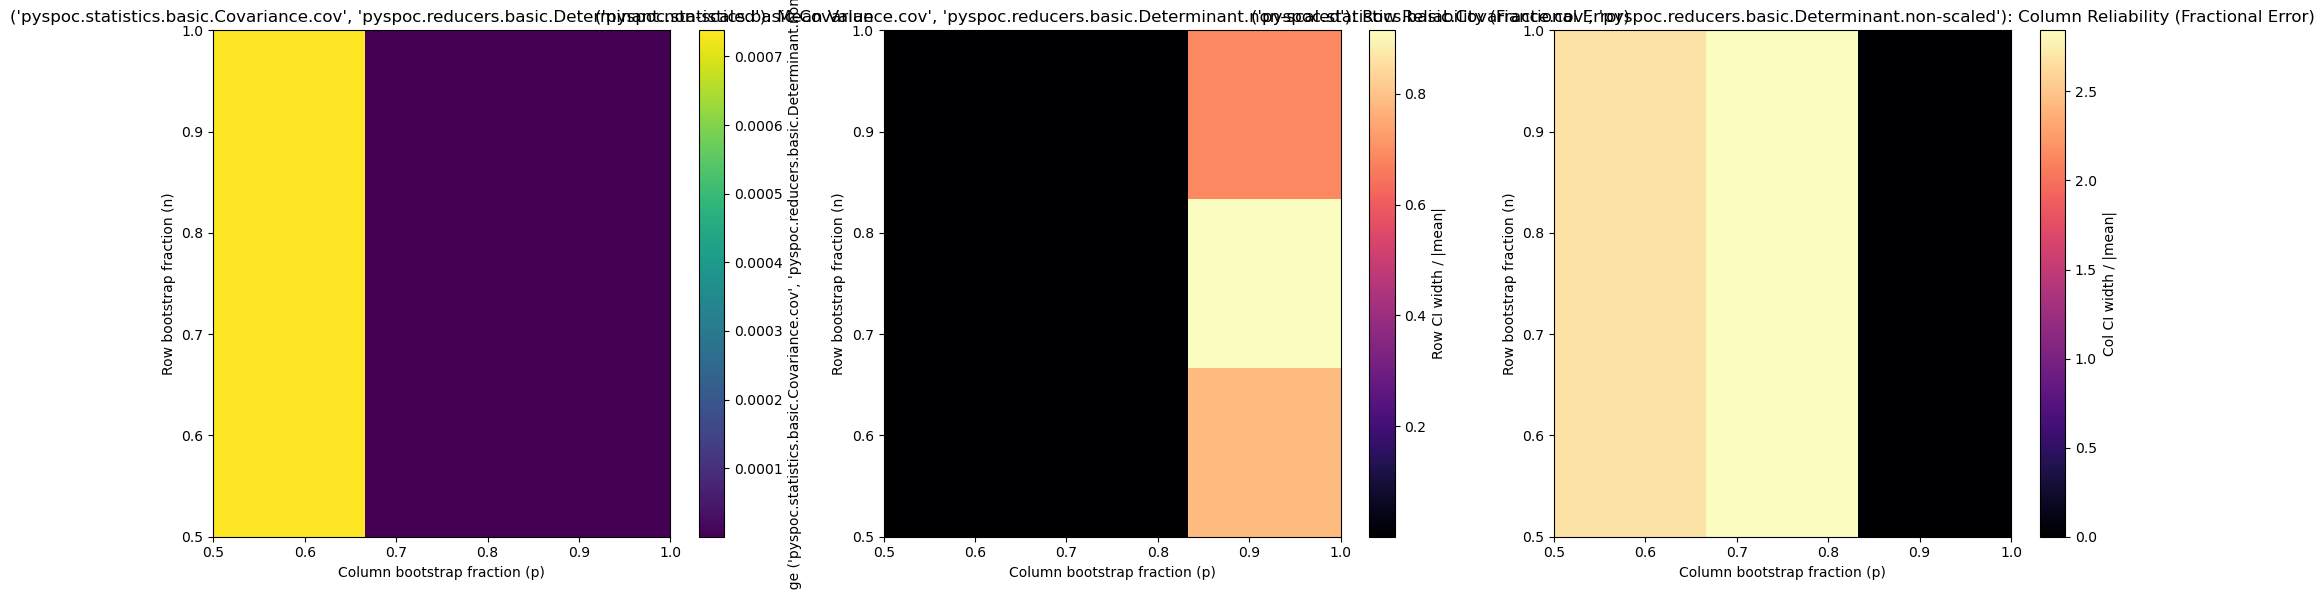

Plotting for reducer: ('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_1')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.74it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 848.99it/s]


Calculation complete. Time taken: 0.1326s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.79it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 129.41it/s]



Calculation complete. Time taken: 0.2300s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.51it/s]



Calculation complete. Time taken: 0.2476s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 146.90it/s]



Calculation complete. Time taken: 0.1600s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 828.86it/s]


Calculation complete. Time taken: 0.2629s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 41.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 175.72it/s]



Calculation complete. Time taken: 0.0955s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 165.86it/s]


Calculation complete. Time taken: 0.1438s
Registering YAML string.


Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 52.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 160.98it/s]



Calculation complete. Time taken: 0.0788s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.89it/s]


Calculation complete. Time taken: 0.2148s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.99it/s]



Calculation complete. Time taken: 0.2418s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 113.30it/s]



Calculation complete. Time taken: 0.1741s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.28it/s]



Calculation complete. Time taken: 0.2537s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.96it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 314.51it/s]


Calculation complete. Time taken: 0.1340s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 223.15it/s]



Calculation complete. Time taken: 0.1051s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.50it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 266.92it/s]



Calculation complete. Time taken: 0.1744s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 175.91it/s]



Calculation complete. Time taken: 0.1096s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 253.59it/s]


Calculation complete. Time taken: 0.2571s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.11it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 113.71it/s]



Calculation complete. Time taken: 0.2582s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.49it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 109.47it/s]



Calculation complete. Time taken: 0.1921s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.37it/s]



Calculation complete. Time taken: 0.1578s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 26.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1223.66it/s]



Calculation complete. Time taken: 0.1184s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 169.73it/s]



Calculation complete. Time taken: 0.1772s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 169.29it/s]



Calculation complete. Time taken: 0.2619s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 160.18it/s]



Calculation complete. Time taken: 0.1755s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 321.99it/s]


Calculation complete. Time taken: 0.2153s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 104.84it/s]



Calculation complete. Time taken: 0.2459s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 134.99it/s]



Calculation complete. Time taken: 0.2229s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 115.00it/s]



Calculation complete. Time taken: 0.1624s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.49it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 623.81it/s]



Calculation complete. Time taken: 0.1598s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 56.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 270.08it/s]



Calculation complete. Time taken: 0.0660s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.50it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.52it/s]



Calculation complete. Time taken: 0.1000s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 239.64it/s]



Calculation complete. Time taken: 0.0835s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1094.45it/s]


Calculation complete. Time taken: 0.2269s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 172.02it/s]



Calculation complete. Time taken: 0.2076s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 157.17it/s]



Calculation complete. Time taken: 0.1681s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 136.44it/s]



Calculation complete. Time taken: 0.1852s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 374.04it/s]



Calculation complete. Time taken: 0.1280s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 114.75it/s]


Calculation complete. Time taken: 0.1242s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 143.04it/s]



Calculation complete. Time taken: 0.1915s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 27.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 106.36it/s]



Calculation complete. Time taken: 0.1437s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 290.87it/s]


Calculation complete. Time taken: 0.2079s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.39it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 119.73it/s]



Calculation complete. Time taken: 0.1853s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.74it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 175.83it/s]



Calculation complete. Time taken: 0.3283s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 185.82it/s]



Calculation complete. Time taken: 0.1588s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.62it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 280.98it/s]


Calculation complete. Time taken: 0.1302s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 93.10it/s]



Calculation complete. Time taken: 0.2496s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 170.83it/s]



Calculation complete. Time taken: 0.2155s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.49it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 175.34it/s]



Calculation complete. Time taken: 0.1646s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 594.94it/s]


Calculation complete. Time taken: 0.2003s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 110.50it/s]



Calculation complete. Time taken: 0.2067s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 178.62it/s]



Calculation complete. Time taken: 0.1847s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 139.01it/s]



Calculation complete. Time taken: 0.1647s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 271.36it/s]


Calculation complete. Time taken: 0.1300s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 44.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 180.17it/s]



Calculation complete. Time taken: 0.0924s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 56.46it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 107.80it/s]



Calculation complete. Time taken: 0.0866s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.31it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 187.04it/s]



Calculation complete. Time taken: 0.1045s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 362.16it/s]


Calculation complete. Time taken: 0.2072s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 133.00it/s]



Calculation complete. Time taken: 0.2529s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.11it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 71.58it/s]



Calculation complete. Time taken: 0.2407s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 155.96it/s]



Calculation complete. Time taken: 0.3222s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.74it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 300.42it/s]


Calculation complete. Time taken: 0.1568s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.11it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 132.98it/s]



Calculation complete. Time taken: 0.3349s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 112.82it/s]



Calculation complete. Time taken: 0.1976s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 30.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 151.39it/s]


Calculation complete. Time taken: 0.1198s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 557.63it/s]


Calculation complete. Time taken: 0.2382s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 83.99it/s]



Calculation complete. Time taken: 0.3585s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 179.88it/s]



Calculation complete. Time taken: 0.2271s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 81.59it/s]



Calculation complete. Time taken: 0.2401s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 675.09it/s]



Calculation complete. Time taken: 0.1574s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 160.21it/s]



Calculation complete. Time taken: 0.1909s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 139.51it/s]



Calculation complete. Time taken: 0.3073s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.19it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 156.08it/s]



Calculation complete. Time taken: 0.2079s


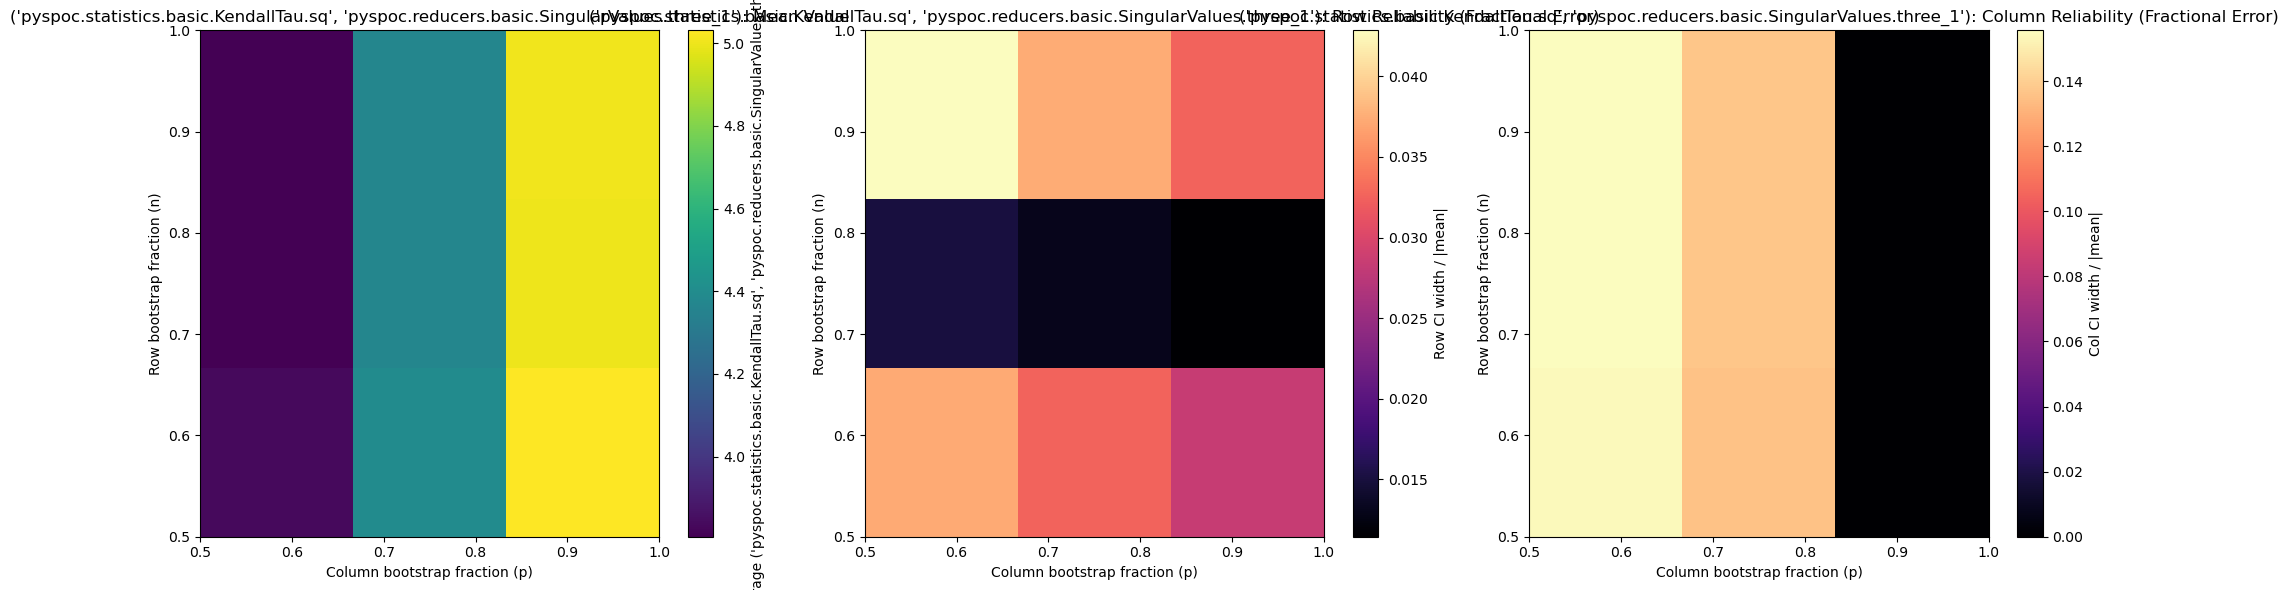

Plotting for reducer: ('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_2')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.46it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 247.73it/s]


Calculation complete. Time taken: 0.1632s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 105.12it/s]



Calculation complete. Time taken: 0.2893s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 331.55it/s]



Calculation complete. Time taken: 0.1634s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 193.24it/s]



Calculation complete. Time taken: 0.2710s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.79it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 866.95it/s]



Calculation complete. Time taken: 0.1222s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 49.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 199.07it/s]



Calculation complete. Time taken: 0.0802s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 56.57it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 158.03it/s]



Calculation complete. Time taken: 0.0786s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 56.82it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 387.97it/s]



Calculation complete. Time taken: 0.0627s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 298.41it/s]


Calculation complete. Time taken: 0.1504s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.12it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 203.35it/s]



Calculation complete. Time taken: 0.1967s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 165.97it/s]



Calculation complete. Time taken: 0.1646s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.42it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 223.82it/s]



Calculation complete. Time taken: 0.1787s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 232.32it/s]


Calculation complete. Time taken: 0.1376s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.78it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 107.42it/s]



Calculation complete. Time taken: 0.2484s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 187.84it/s]



Calculation complete. Time taken: 0.1142s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.31it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 82.70it/s]



Calculation complete. Time taken: 0.2140s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 863.20it/s]



Calculation complete. Time taken: 0.1587s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 85.19it/s]



Calculation complete. Time taken: 0.2341s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.16it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 180.04it/s]



Calculation complete. Time taken: 0.2082s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.33it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 191.26it/s]



Calculation complete. Time taken: 0.1678s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1471.34it/s]


Calculation complete. Time taken: 0.2048s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.47it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 132.40it/s]



Calculation complete. Time taken: 0.1911s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 167.46it/s]



Calculation complete. Time taken: 0.1759s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 138.87it/s]



Calculation complete. Time taken: 0.1871s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 263.41it/s]


Calculation complete. Time taken: 0.1416s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.68it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 134.28it/s]



Calculation complete. Time taken: 0.1855s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.44it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 173.15it/s]



Calculation complete. Time taken: 0.1825s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 179.43it/s]



Calculation complete. Time taken: 0.1513s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.96it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 857.73it/s]


Calculation complete. Time taken: 0.1307s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 56.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 182.49it/s]



Calculation complete. Time taken: 0.0753s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 46.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 203.65it/s]



Calculation complete. Time taken: 0.0807s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 49.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 106.12it/s]



Calculation complete. Time taken: 0.0923s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 988.06it/s]


Calculation complete. Time taken: 0.1715s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 167.44it/s]



Calculation complete. Time taken: 0.2048s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 146.57it/s]



Calculation complete. Time taken: 0.2462s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 161.02it/s]



Calculation complete. Time taken: 0.2180s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 271.08it/s]


Calculation complete. Time taken: 0.1489s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.47it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 110.93it/s]



Calculation complete. Time taken: 0.1616s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 154.02it/s]



Calculation complete. Time taken: 0.2436s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.05it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 117.37it/s]



Calculation complete. Time taken: 0.1617s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 269.42it/s]


Calculation complete. Time taken: 0.1456s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.82it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 226.10it/s]



Calculation complete. Time taken: 0.2929s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 135.77it/s]



Calculation complete. Time taken: 0.1915s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 119.41it/s]



Calculation complete. Time taken: 0.3920s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 316.30it/s]


Calculation complete. Time taken: 0.1437s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 67.63it/s]



Calculation complete. Time taken: 0.3460s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.71it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 216.61it/s]



Calculation complete. Time taken: 0.1716s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 224.20it/s]



Calculation complete. Time taken: 0.2812s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 477.15it/s]


Calculation complete. Time taken: 0.1376s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 226.08it/s]



Calculation complete. Time taken: 0.1696s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 150.45it/s]



Calculation complete. Time taken: 0.1891s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 99.81it/s]



Calculation complete. Time taken: 0.2500s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 252.64it/s]



Calculation complete. Time taken: 0.1604s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 50.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 218.81it/s]



Calculation complete. Time taken: 0.0774s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 130.29it/s]


Calculation complete. Time taken: 0.1068s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.86it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 138.78it/s]



Calculation complete. Time taken: 0.1110s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 518.50it/s]


Calculation complete. Time taken: 0.1590s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 254.68it/s]



Calculation complete. Time taken: 0.2605s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 321.64it/s]



Calculation complete. Time taken: 0.1710s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 182.00it/s]



Calculation complete. Time taken: 0.2945s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1117.19it/s]



Calculation complete. Time taken: 0.1373s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 178.24it/s]



Calculation complete. Time taken: 0.1581s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 229.66it/s]


Calculation complete. Time taken: 0.1014s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 176.89it/s]



Calculation complete. Time taken: 0.1080s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 722.04it/s]


Calculation complete. Time taken: 0.1589s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.66it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 45.63it/s]



Calculation complete. Time taken: 0.2209s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.58it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 153.10it/s]



Calculation complete. Time taken: 0.2057s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 223.30it/s]



Calculation complete. Time taken: 0.1655s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 361.33it/s]



Calculation complete. Time taken: 0.1620s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.69it/s]



Calculation complete. Time taken: 0.2689s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.71it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 168.82it/s]



Calculation complete. Time taken: 0.1894s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 152.58it/s]



Calculation complete. Time taken: 0.2893s


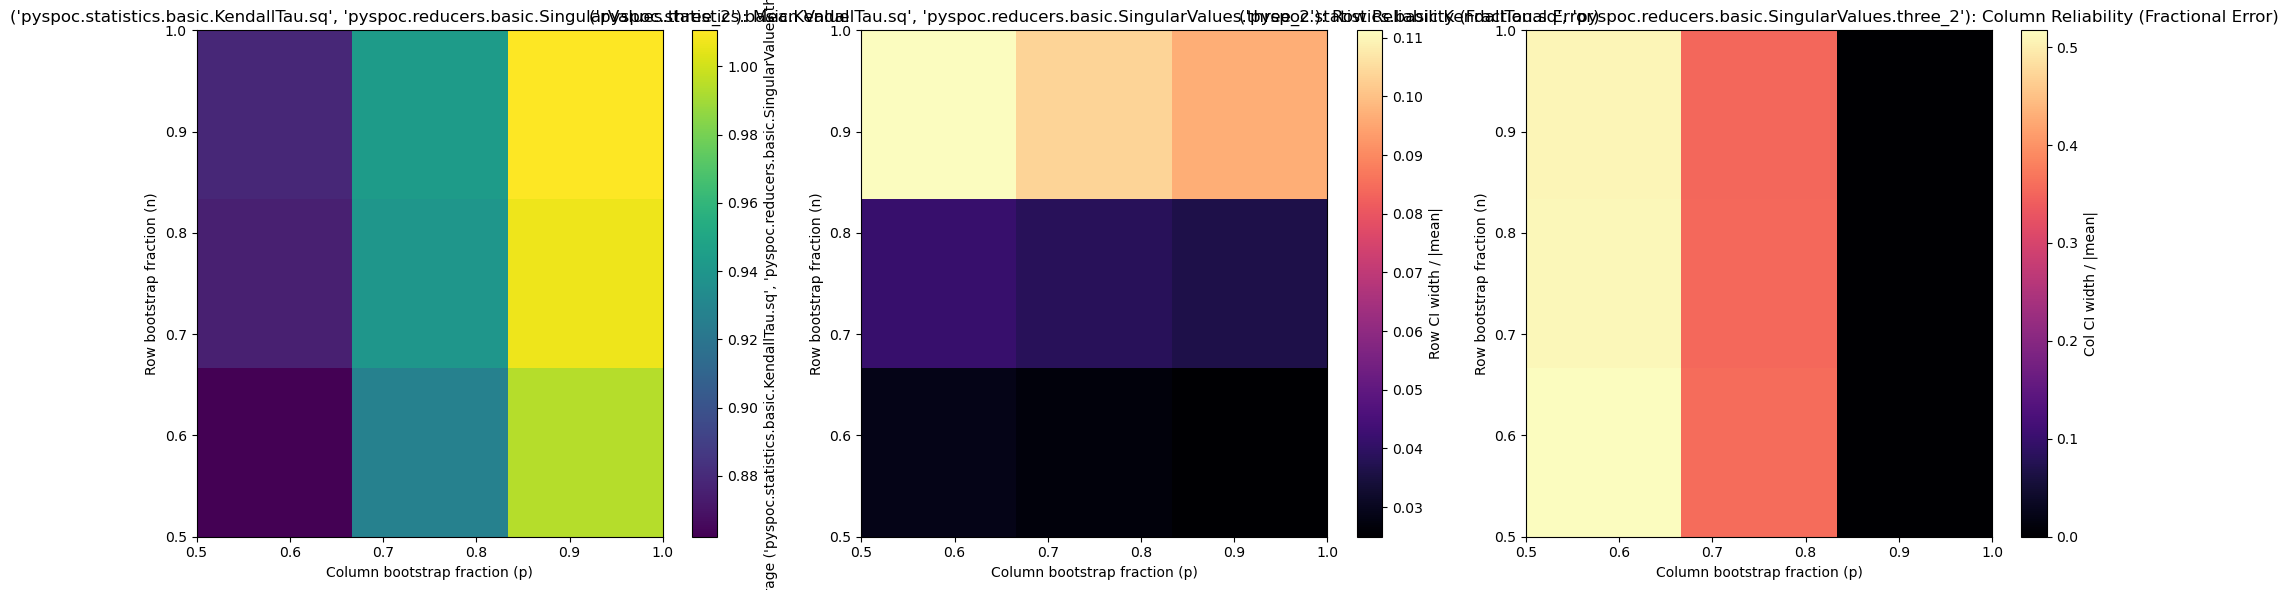

Plotting for reducer: ('pyspoc.statistics.basic.KendallTau.sq', 'pyspoc.reducers.basic.SingularValues.three_3')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.74it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 359.69it/s]



Calculation complete. Time taken: 0.1613s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.19it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 97.28it/s]



Calculation complete. Time taken: 0.4506s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 129.26it/s]



Calculation complete. Time taken: 0.1903s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 84.59it/s]



Calculation complete. Time taken: 0.3149s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 478.29it/s]



Calculation complete. Time taken: 0.1643s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 119.71it/s]



Calculation complete. Time taken: 0.3306s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.26it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 128.62it/s]



Calculation complete. Time taken: 0.1043s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 54.86it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 142.72it/s]



Calculation complete. Time taken: 0.0947s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 601.88it/s]


Calculation complete. Time taken: 0.1919s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.57it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 115.17it/s]



Calculation complete. Time taken: 0.1809s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 208.51it/s]



Calculation complete. Time taken: 0.2532s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 171.92it/s]



Calculation complete. Time taken: 0.1846s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.78it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 339.12it/s]



Calculation complete. Time taken: 0.2315s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.94it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 233.93it/s]



Calculation complete. Time taken: 0.1532s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 98.11it/s]



Calculation complete. Time taken: 0.2290s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 71.37it/s]



Calculation complete. Time taken: 0.1432s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 783.20it/s]


Calculation complete. Time taken: 0.1414s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 66.92it/s]



Calculation complete. Time taken: 0.2838s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 153.59it/s]



Calculation complete. Time taken: 0.2570s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.49it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 69.79it/s]



Calculation complete. Time taken: 0.1794s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.44it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 464.42it/s]


Calculation complete. Time taken: 0.2142s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 101.06it/s]



Calculation complete. Time taken: 0.2013s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.99it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 165.16it/s]



Calculation complete. Time taken: 0.2078s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.71it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 142.17it/s]



Calculation complete. Time taken: 0.1645s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.58it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 185.74it/s]


Calculation complete. Time taken: 0.2632s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 97.13it/s]



Calculation complete. Time taken: 0.1984s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 210.71it/s]



Calculation complete. Time taken: 0.1621s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 178.37it/s]



Calculation complete. Time taken: 0.2018s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.03it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 327.38it/s]


Calculation complete. Time taken: 0.1438s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 63.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 220.26it/s]



Calculation complete. Time taken: 0.0638s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 54.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 473.01it/s]



Calculation complete. Time taken: 0.0666s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 60.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 266.62it/s]



Calculation complete. Time taken: 0.0682s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 661.49it/s]



Calculation complete. Time taken: 0.1584s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 102.92it/s]



Calculation complete. Time taken: 0.3201s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 130.61it/s]



Calculation complete. Time taken: 0.1790s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 95.91it/s]



Calculation complete. Time taken: 0.2103s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 230.99it/s]


Calculation complete. Time taken: 0.2252s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 180.59it/s]



Calculation complete. Time taken: 0.1830s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 159.19it/s]



Calculation complete. Time taken: 0.1530s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.85it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 57.83it/s]



Calculation complete. Time taken: 0.1726s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 213.36it/s]



Calculation complete. Time taken: 0.1527s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.44it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 58.73it/s]



Calculation complete. Time taken: 0.2082s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 125.67it/s]



Calculation complete. Time taken: 0.1955s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 142.86it/s]



Calculation complete. Time taken: 0.1849s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 453.23it/s]



Calculation complete. Time taken: 0.1667s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 83.94it/s]



Calculation complete. Time taken: 0.2797s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 150.69it/s]



Calculation complete. Time taken: 0.2397s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.11it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 181.34it/s]



Calculation complete. Time taken: 0.1543s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 824.68it/s]


Calculation complete. Time taken: 0.1400s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.57it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.48it/s]



Calculation complete. Time taken: 0.2466s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.44it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 178.83it/s]



Calculation complete. Time taken: 0.1581s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 220.33it/s]



Calculation complete. Time taken: 0.1852s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 542.34it/s]


Calculation complete. Time taken: 0.2664s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 61.77it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 263.51it/s]



Calculation complete. Time taken: 0.0696s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 53.05it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 157.45it/s]



Calculation complete. Time taken: 0.0842s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 44.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 190.01it/s]


Calculation complete. Time taken: 0.0847s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.57it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 462.47it/s]


Calculation complete. Time taken: 0.1906s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.47it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 177.53it/s]



Calculation complete. Time taken: 0.2289s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.16it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.07it/s]



Calculation complete. Time taken: 0.2062s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 164.40it/s]



Calculation complete. Time taken: 0.1971s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 332.51it/s]


Calculation complete. Time taken: 0.2095s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 124.09it/s]



Calculation complete. Time taken: 0.1210s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 236.14it/s]



Calculation complete. Time taken: 0.1596s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.37it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.00it/s]



Calculation complete. Time taken: 0.1447s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.03it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 762.18it/s]


Calculation complete. Time taken: 0.1651s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 190.24it/s]



Calculation complete. Time taken: 0.1820s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 113.06it/s]



Calculation complete. Time taken: 0.1820s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 98.83it/s]



Calculation complete. Time taken: 0.2363s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.99it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 234.92it/s]



Calculation complete. Time taken: 0.1633s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.11it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 70.00it/s]



Calculation complete. Time taken: 0.2093s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 171.62it/s]



Calculation complete. Time taken: 0.2029s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 101.85it/s]



Calculation complete. Time taken: 0.1725s


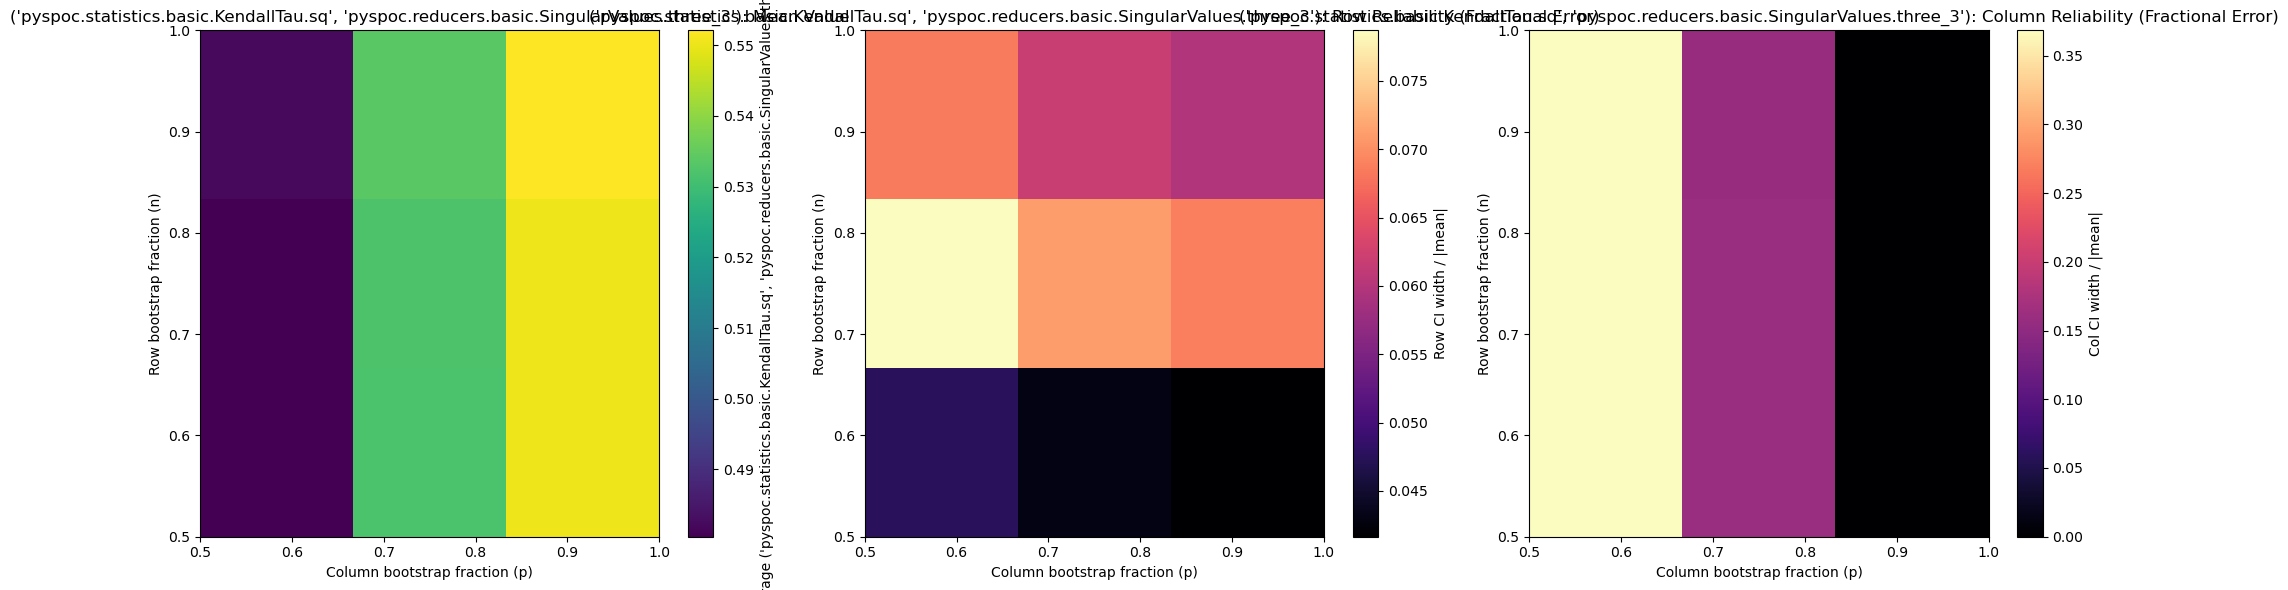

Plotting for reducer: ('pyspoc.statistics.basic.KendallTau.standard', 'pyspoc.reducers.basic.SingularValues.three_1')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 285.05it/s]


Calculation complete. Time taken: 0.1519s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.52it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 168.57it/s]



Calculation complete. Time taken: 0.2285s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 87.23it/s]



Calculation complete. Time taken: 0.1936s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 88.83it/s]



Calculation complete. Time taken: 0.2507s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 295.46it/s]



Calculation complete. Time taken: 0.2994s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 138.28it/s]



Calculation complete. Time taken: 0.0921s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 44.16it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 79.59it/s]


Calculation complete. Time taken: 0.1198s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.65it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 128.99it/s]


Calculation complete. Time taken: 0.1210s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 239.95it/s]


Calculation complete. Time taken: 0.2026s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.27it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 139.18it/s]



Calculation complete. Time taken: 0.2226s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.61it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.43it/s]



Calculation complete. Time taken: 0.1907s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 129.33it/s]



Calculation complete. Time taken: 0.3432s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 271.07it/s]


Calculation complete. Time taken: 0.2194s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.48it/s]



Calculation complete. Time taken: 0.1797s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.71it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 161.30it/s]



Calculation complete. Time taken: 0.1852s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 149.53it/s]



Calculation complete. Time taken: 0.2574s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 441.37it/s]



Calculation complete. Time taken: 0.1750s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 194.30it/s]



Calculation complete. Time taken: 0.3342s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 126.47it/s]



Calculation complete. Time taken: 0.1971s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 111.05it/s]



Calculation complete. Time taken: 0.3510s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 293.97it/s]


Calculation complete. Time taken: 0.1424s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 131.29it/s]



Calculation complete. Time taken: 0.2128s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 184.53it/s]



Calculation complete. Time taken: 0.1778s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.30it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 205.04it/s]



Calculation complete. Time taken: 0.1746s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 260.12it/s]


Calculation complete. Time taken: 0.3248s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 130.81it/s]



Calculation complete. Time taken: 0.2341s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.23it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 164.22it/s]



Calculation complete. Time taken: 0.2646s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 204.83it/s]



Calculation complete. Time taken: 0.1790s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 854.93it/s]


Calculation complete. Time taken: 0.2648s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 57.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 313.01it/s]



Calculation complete. Time taken: 0.0695s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 55.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 462.40it/s]



Calculation complete. Time taken: 0.0657s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 194.37it/s]



Calculation complete. Time taken: 0.0926s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 570.71it/s]


Calculation complete. Time taken: 0.1474s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 205.39it/s]



Calculation complete. Time taken: 0.2091s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 195.13it/s]



Calculation complete. Time taken: 0.1802s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 187.82it/s]



Calculation complete. Time taken: 0.1945s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.81it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 858.14it/s]


Calculation complete. Time taken: 0.2095s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.73it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 121.51it/s]



Calculation complete. Time taken: 0.1607s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.73it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 212.50it/s]



Calculation complete. Time taken: 0.1682s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 30.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 196.88it/s]



Calculation complete. Time taken: 0.1154s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.92it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.88it/s]


Calculation complete. Time taken: 0.2554s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.39it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 132.07it/s]



Calculation complete. Time taken: 0.1929s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 169.43it/s]



Calculation complete. Time taken: 0.2146s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 76.73it/s]



Calculation complete. Time taken: 0.2611s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 704.81it/s]


Calculation complete. Time taken: 0.1366s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.55it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 279.07it/s]



Calculation complete. Time taken: 0.1789s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.24it/s]



Calculation complete. Time taken: 0.1866s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 170.43it/s]



Calculation complete. Time taken: 0.2733s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 273.05it/s]



Calculation complete. Time taken: 0.1708s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 160.09it/s]



Calculation complete. Time taken: 0.2762s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 210.27it/s]



Calculation complete. Time taken: 0.1825s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 129.45it/s]



Calculation complete. Time taken: 0.2421s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1489.98it/s]


Calculation complete. Time taken: 0.1295s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 213.01it/s]



Calculation complete. Time taken: 0.1068s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 51.40it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 157.05it/s]



Calculation complete. Time taken: 0.0824s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 77.39it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 170.84it/s]



Calculation complete. Time taken: 0.0578s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 681.15it/s]


Calculation complete. Time taken: 0.3764s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 198.55it/s]



Calculation complete. Time taken: 0.1908s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.61it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 104.50it/s]



Calculation complete. Time taken: 0.2532s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.59it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 97.28it/s]



Calculation complete. Time taken: 0.1776s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.74it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 97.96it/s]



Calculation complete. Time taken: 0.1589s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 165.39it/s]



Calculation complete. Time taken: 0.1386s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 186.15it/s]



Calculation complete. Time taken: 0.1535s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.49it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 184.20it/s]



Calculation complete. Time taken: 0.1588s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 704.69it/s]


Calculation complete. Time taken: 0.1542s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.52it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 132.36it/s]



Calculation complete. Time taken: 0.3102s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.07it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 156.47it/s]



Calculation complete. Time taken: 0.2213s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.17it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 183.01it/s]



Calculation complete. Time taken: 0.2176s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.04it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 222.87it/s]


Calculation complete. Time taken: 0.1844s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.11it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 167.36it/s]



Calculation complete. Time taken: 0.2672s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 213.91it/s]



Calculation complete. Time taken: 0.2718s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 216.25it/s]



Calculation complete. Time taken: 0.1872s


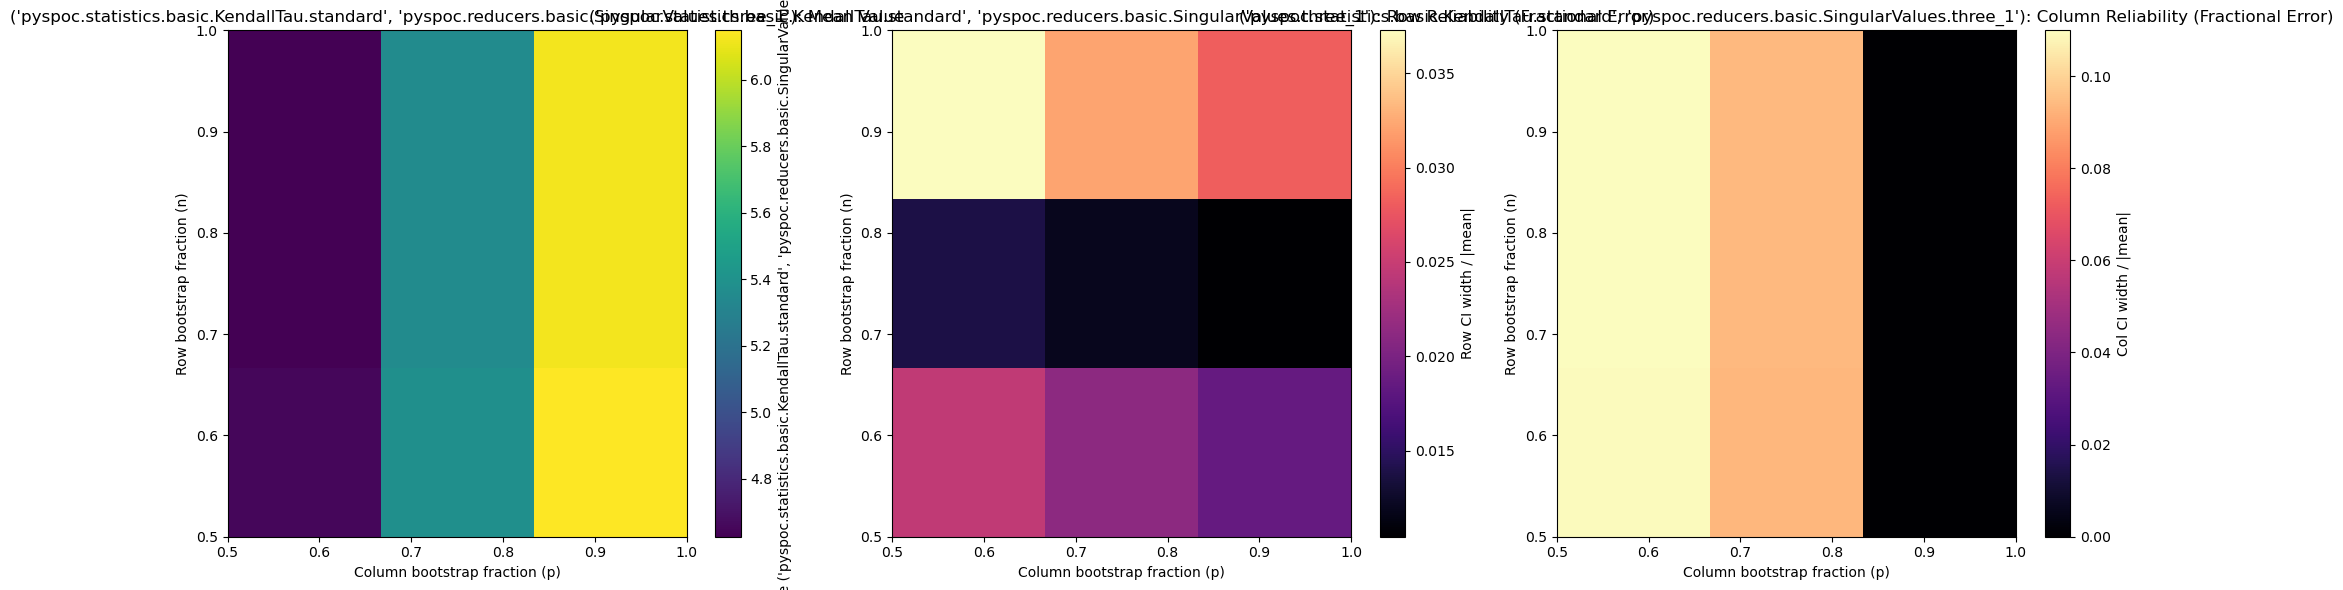

Plotting for reducer: ('pyspoc.statistics.basic.KendallTau.standard', 'pyspoc.reducers.basic.SingularValues.three_2')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.32it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 307.10it/s]


Calculation complete. Time taken: 0.1754s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.86it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 58.00it/s]



Calculation complete. Time taken: 0.3934s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 136.57it/s]



Calculation complete. Time taken: 0.2242s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.42it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 95.98it/s]



Calculation complete. Time taken: 0.2137s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 376.31it/s]


Calculation complete. Time taken: 0.2101s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 118.24it/s]



Calculation complete. Time taken: 0.2257s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 56.34it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 179.15it/s]



Calculation complete. Time taken: 0.0733s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.33it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 117.81it/s]



Calculation complete. Time taken: 0.1115s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 277.58it/s]


Calculation complete. Time taken: 0.1966s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 150.64it/s]



Calculation complete. Time taken: 0.2888s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 163.29it/s]



Calculation complete. Time taken: 0.2024s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.70it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 89.41it/s]



Calculation complete. Time taken: 0.2030s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 497.43it/s]


Calculation complete. Time taken: 0.2395s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 24.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 127.98it/s]


Calculation complete. Time taken: 0.1536s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 191.57it/s]



Calculation complete. Time taken: 0.2126s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.85it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.14it/s]



Calculation complete. Time taken: 0.1641s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 93.04it/s]


Calculation complete. Time taken: 0.3419s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  7.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 53.86it/s]



Calculation complete. Time taken: 0.4830s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 97.86it/s]



Calculation complete. Time taken: 0.9123s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 62.06it/s]



Calculation complete. Time taken: 0.5308s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 820.75it/s]



Calculation complete. Time taken: 0.3461s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.80it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 121.61it/s]



Calculation complete. Time taken: 0.2231s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.68it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.03it/s]



Calculation complete. Time taken: 0.1877s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.73it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 288.29it/s]



Calculation complete. Time taken: 0.1722s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.85it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 380.13it/s]



Calculation complete. Time taken: 0.1358s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 208.05it/s]



Calculation complete. Time taken: 0.1613s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.42it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.61it/s]


Calculation complete. Time taken: 0.1547s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.66it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 150.95it/s]



Calculation complete. Time taken: 0.1747s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.82it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 668.13it/s]


Calculation complete. Time taken: 0.1585s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 64.40it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 173.29it/s]



Calculation complete. Time taken: 0.0675s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 58.26it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 200.30it/s]



Calculation complete. Time taken: 0.0717s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 57.36it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 204.93it/s]



Calculation complete. Time taken: 0.0741s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 759.15it/s]


Calculation complete. Time taken: 0.2328s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.45it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 98.06it/s]



Calculation complete. Time taken: 0.1881s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.39it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 178.68it/s]



Calculation complete. Time taken: 0.2139s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 140.45it/s]



Calculation complete. Time taken: 0.1707s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 252.30it/s]


Calculation complete. Time taken: 0.2328s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.22it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 223.18it/s]



Calculation complete. Time taken: 0.1115s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 15.96it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 297.77it/s]



Calculation complete. Time taken: 0.2001s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.62it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 116.71it/s]



Calculation complete. Time taken: 0.1233s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.06it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 617.32it/s]



Calculation complete. Time taken: 0.1710s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 126.59it/s]



Calculation complete. Time taken: 0.2453s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.69it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 152.37it/s]



Calculation complete. Time taken: 0.1751s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 162.57it/s]



Calculation complete. Time taken: 0.2886s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 257.27it/s]


Calculation complete. Time taken: 0.1641s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 155.99it/s]



Calculation complete. Time taken: 0.3607s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 180.58it/s]



Calculation complete. Time taken: 0.1849s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.82it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 187.74it/s]



Calculation complete. Time taken: 0.2356s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 389.25it/s]


Calculation complete. Time taken: 0.2319s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 215.59it/s]



Calculation complete. Time taken: 0.2818s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 180.93it/s]



Calculation complete. Time taken: 0.1886s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 18.48it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 153.92it/s]



Calculation complete. Time taken: 0.1863s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 274.17it/s]


Calculation complete. Time taken: 0.2286s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 54.35it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 178.91it/s]



Calculation complete. Time taken: 0.0720s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 160.52it/s]



Calculation complete. Time taken: 0.1197s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 92.40it/s]



Calculation complete. Time taken: 0.1053s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.75it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 992.03it/s]


Calculation complete. Time taken: 0.2403s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.80it/s]



Calculation complete. Time taken: 0.2777s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 94.85it/s]



Calculation complete. Time taken: 0.2707s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 161.52it/s]



Calculation complete. Time taken: 0.1783s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.72it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 177.12it/s]


Calculation complete. Time taken: 0.3279s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.29it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 197.05it/s]



Calculation complete. Time taken: 0.1144s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.94it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 189.81it/s]



Calculation complete. Time taken: 0.1897s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 29.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 356.28it/s]



Calculation complete. Time taken: 0.1164s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.62it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 260.65it/s]



Calculation complete. Time taken: 0.1727s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 255.84it/s]



Calculation complete. Time taken: 0.1818s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 12.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 183.98it/s]



Calculation complete. Time taken: 0.2607s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.51it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 167.94it/s]



Calculation complete. Time taken: 0.1659s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.30it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 128.98it/s]



Calculation complete. Time taken: 0.2147s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 126.48it/s]



Calculation complete. Time taken: 0.1841s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 10.44it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 181.23it/s]



Calculation complete. Time taken: 0.3137s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 16.61it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 170.78it/s]



Calculation complete. Time taken: 0.2023s


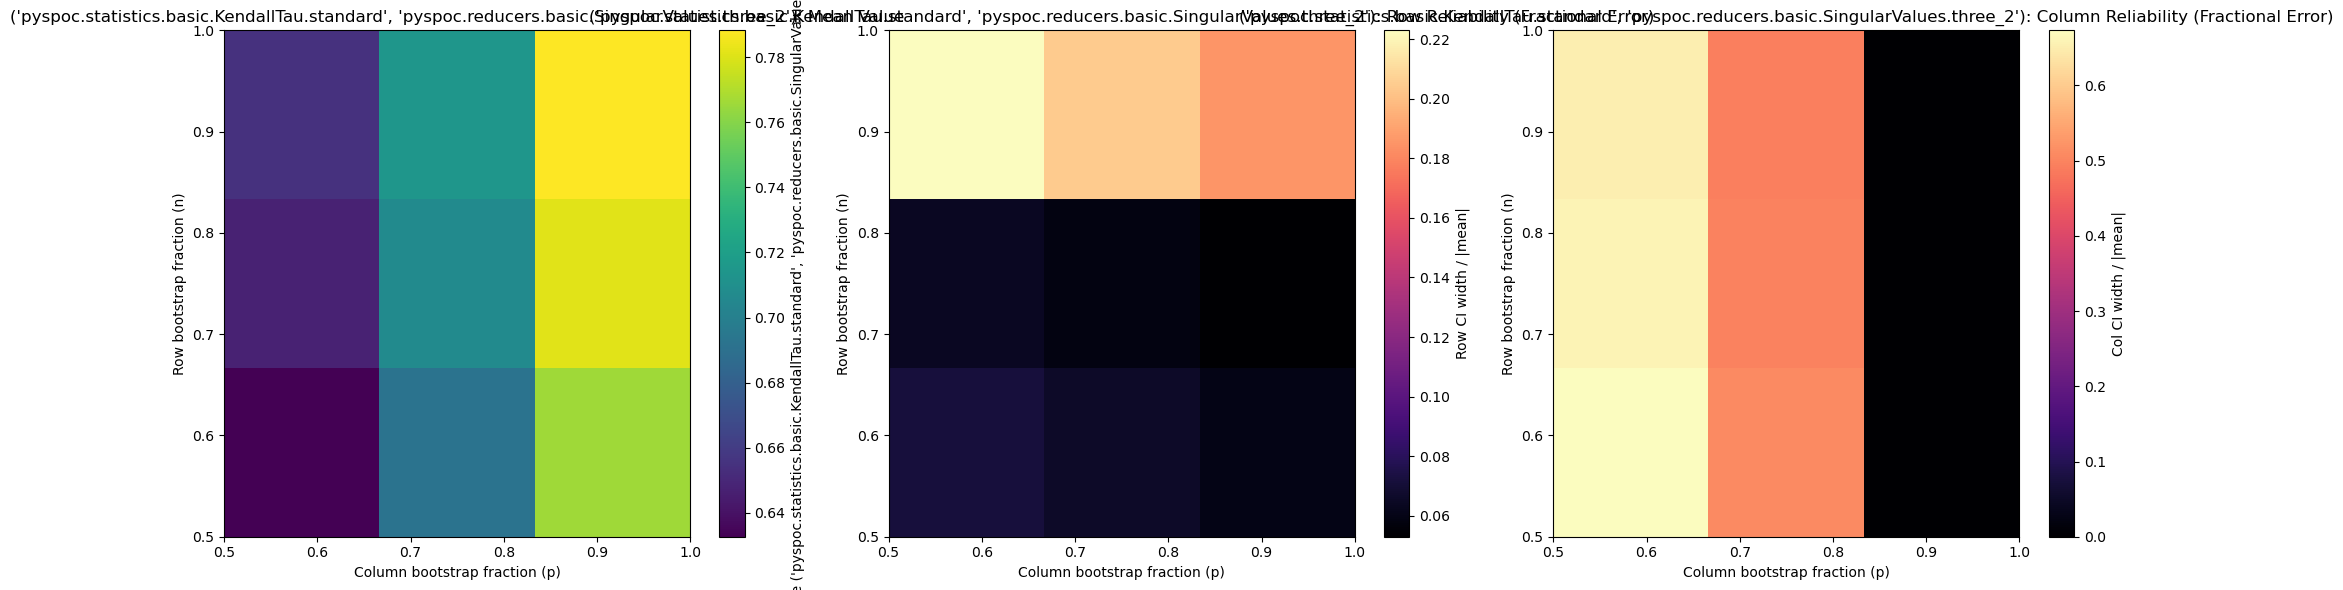

Plotting for reducer: ('pyspoc.statistics.basic.KendallTau.standard', 'pyspoc.reducers.basic.SingularValues.three_3')
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 23.88it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 425.03it/s]


Calculation complete. Time taken: 0.1348s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 111.42it/s]



Calculation complete. Time taken: 0.3535s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 13.21it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 166.08it/s]



Calculation complete. Time taken: 0.2502s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.63it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 212.75it/s]



Calculation complete. Time taken: 0.1882s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 17.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 689.32it/s]


Calculation complete. Time taken: 0.1862s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 14.12it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 51.10it/s]



Calculation complete. Time taken: 0.2833s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 59.86it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 97.17it/s]



Calculation complete. Time taken: 0.0834s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 25.57it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 59.57it/s]



Calculation complete. Time taken: 0.1797s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.45it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 315.68it/s]



Calculation complete. Time taken: 0.1566s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.01it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 189.96it/s]



Calculation complete. Time taken: 0.1543s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 28.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 277.24it/s]



Calculation complete. Time taken: 0.1229s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.85it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 262.83it/s]



Calculation complete. Time taken: 0.0975s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.58it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 604.11it/s]



Calculation complete. Time taken: 0.0868s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 48.98it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 237.06it/s]



Calculation complete. Time taken: 0.0749s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 302.79it/s]



Calculation complete. Time taken: 0.1448s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 47.46it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 156.26it/s]



Calculation complete. Time taken: 0.0854s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.94it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 450.58it/s]


Calculation complete. Time taken: 0.1455s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 19.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 126.07it/s]



Calculation complete. Time taken: 0.1797s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.67it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 367.12it/s]



Calculation complete. Time taken: 0.0997s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.52it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 388.35it/s]



Calculation complete. Time taken: 0.1492s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1288.05it/s]


Calculation complete. Time taken: 0.0798s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.28it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 356.86it/s]


Calculation complete. Time taken: 0.1524s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.



Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.54it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 401.45it/s]



Calculation complete. Time taken: 0.0916s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 279.20it/s]



Calculation complete. Time taken: 0.0945s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.91it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 858.96it/s]


Calculation complete. Time taken: 0.0813s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 237.82it/s]



Calculation complete. Time taken: 0.0943s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 300.57it/s]



Calculation complete. Time taken: 0.0979s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.40it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 276.35it/s]



Calculation complete. Time taken: 0.0916s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 29.45it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 933.52it/s]



Calculation complete. Time taken: 0.1072s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 91.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 401.93it/s]



Calculation complete. Time taken: 0.0414s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 96.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 409.03it/s]



Calculation complete. Time taken: 0.0406s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 89.26it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 296.34it/s]



Calculation complete. Time taken: 0.0447s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 619.12it/s]


Calculation complete. Time taken: 0.0984s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.46it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 194.41it/s]


Calculation complete. Time taken: 0.1573s


Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.08it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 301.39it/s]



Calculation complete. Time taken: 0.0977s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 22.05it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 270.64it/s]



Calculation complete. Time taken: 0.1482s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.76it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 982.04it/s]


Calculation complete. Time taken: 0.0835s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 392.60it/s]



Calculation complete. Time taken: 0.0915s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 49.38it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 244.99it/s]



Calculation complete. Time taken: 0.0752s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 40.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 238.64it/s]



Calculation complete. Time taken: 0.0872s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.64it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 986.04it/s]


Calculation complete. Time taken: 0.0859s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 33.09it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 322.13it/s]



Calculation complete. Time taken: 0.1020s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.90it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 303.69it/s]



Calculation complete. Time taken: 0.0981s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.25it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 321.29it/s]



Calculation complete. Time taken: 0.0893s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.53it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 1172.79it/s]


Calculation complete. Time taken: 0.0826s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.45it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 318.82it/s]



Calculation complete. Time taken: 0.0989s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 308.35it/s]



Calculation complete. Time taken: 0.0907s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.78it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 337.36it/s]



Calculation complete. Time taken: 0.0883s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.84it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 989.46it/s]


Calculation complete. Time taken: 0.0751s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.86it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 253.36it/s]



Calculation complete. Time taken: 0.0991s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.71it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 261.96it/s]



Calculation complete. Time taken: 0.0943s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.47it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 326.44it/s]



Calculation complete. Time taken: 0.0918s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 42.89it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 850.25it/s]


Calculation complete. Time taken: 0.0768s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 95.18it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 276.06it/s]



Calculation complete. Time taken: 0.0444s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 93.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 423.15it/s]



Calculation complete. Time taken: 0.0415s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 77.96it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 286.03it/s]



Calculation complete. Time taken: 0.0630s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 35.87it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 730.16it/s]



Calculation complete. Time taken: 0.0899s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 20.10it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 404.37it/s]



Calculation complete. Time taken: 0.1577s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.86it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 313.41it/s]



Calculation complete. Time taken: 0.1050s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 21.83it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 289.66it/s]



Calculation complete. Time taken: 0.1505s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 40.15it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 837.13it/s]



Calculation complete. Time taken: 0.0794s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 32.20it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 259.22it/s]



Calculation complete. Time taken: 0.1067s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 45.97it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 358.00it/s]



Calculation complete. Time taken: 0.0757s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 31.93it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 397.87it/s]



Calculation complete. Time taken: 0.1040s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 38.03it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 635.24it/s]


Calculation complete. Time taken: 0.0855s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 34.12it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 295.86it/s]



Calculation complete. Time taken: 0.1001s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.95it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 295.74it/s]



Calculation complete. Time taken: 0.0937s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 39.14it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 293.22it/s]



Calculation complete. Time taken: 0.0892s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 43.31it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 907.99it/s]


Calculation complete. Time taken: 0.0749s


Bootstrap sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.00it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 296.65it/s]



Calculation complete. Time taken: 0.0933s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 37.56it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 255.09it/s]



Calculation complete. Time taken: 0.0928s
Registering YAML string.
Building internal configuration.
  ✔ Module pyspoc.statistics.basic already loaded.
    ✔ Statistic Covariance scheme 'cov' added successfully.
    ✔ Statistic KendallTau scheme 'sq' added successfully.
    ✔ Statistic KendallTau scheme 'standard' added successfully.
  ✔ Module pyspoc.reducers.basic already loaded.
    ✔ Reducer SingularValues scheme 'three' added successfully.
    ✔ Reducer Determinant scheme 'scaled' added successfully.
    ✔ Reducer Determinant scheme 'non-scaled' added successfully.


Processing [None: pyspoc.statistics.basic.KendallTau.standard]: 100%|██████████| 3/3 [00:00<00:00, 36.60it/s]
Processing [None: pyspoc.reducers.basic.Determinant.non-scaled]: 100%|██████████| 3/3 [00:00<00:00, 314.45it/s]



Calculation complete. Time taken: 0.0940s


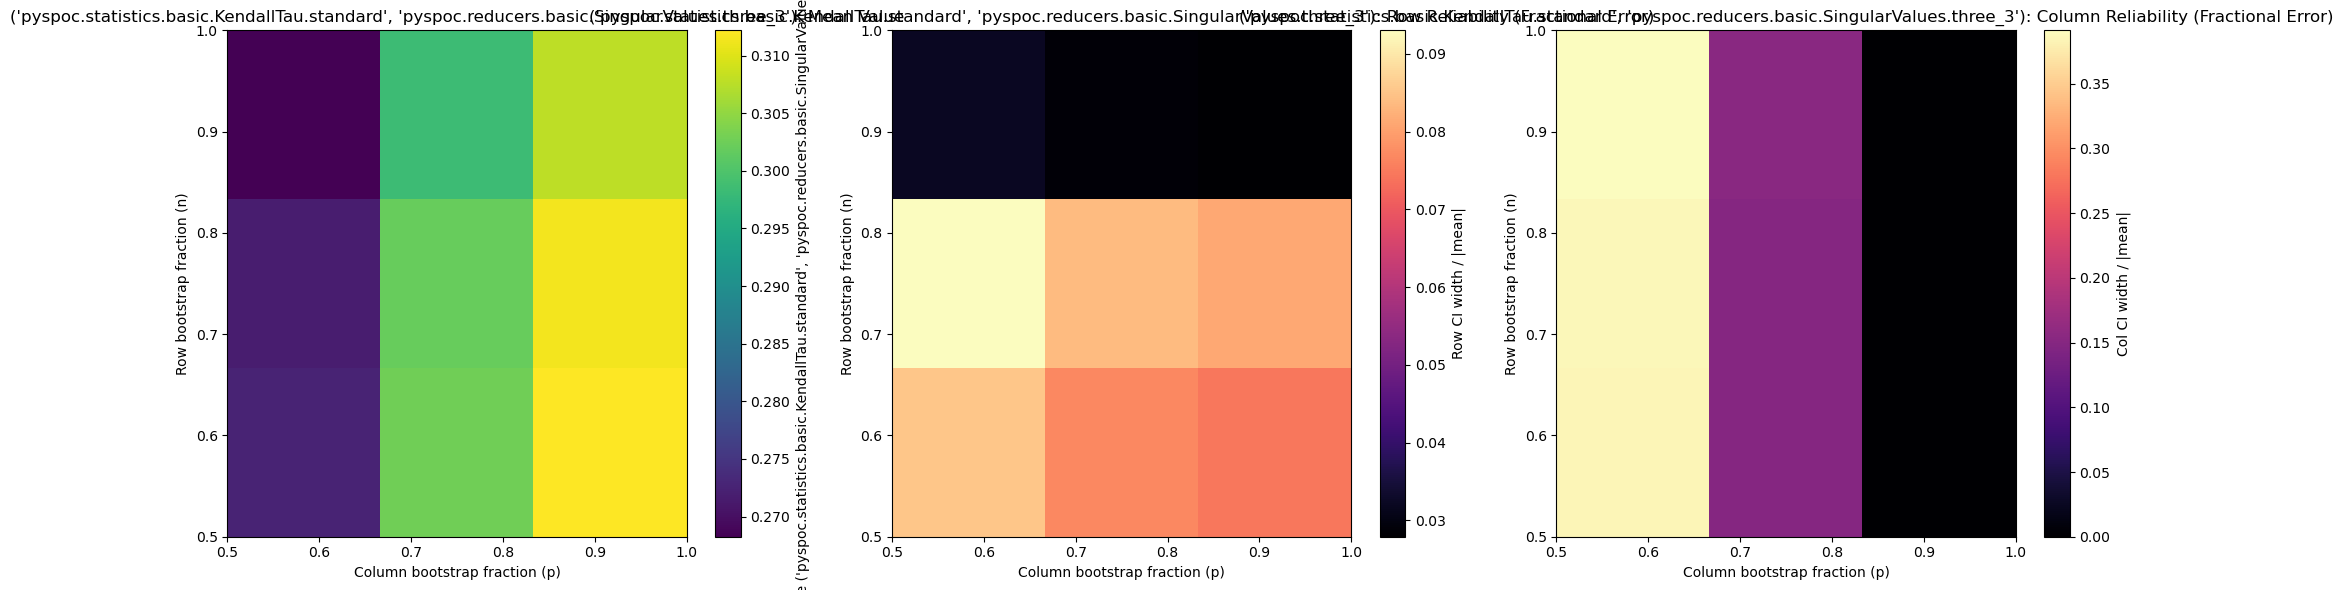

In [35]:
def n_p_plane_analysis_all_reducers(
    df,
    config_name,
    yaml,
    n_grid=np.linspace(0.5, 1.0, 3),
    p_grid=np.linspace(0.5, 1.0, 3),
    n_bootstrap=10,
    normalize='z-score',
    random_seed=42,
    show_errorbars=True
):
    """
    Plot how the average value of each reduced statistic varies in (n,p) subsampling space.
    Also plot row and column reliability as fractional error heatmaps.
    """
    calc = pyspi_calc(df, config_name, yaml, normalize=normalize)
    REDUCERS = list(calc.columns.values)
    results = {}
    for reducer_name in REDUCERS:
        print(f"Plotting for reducer: {reducer_name}")
        means = np.zeros((len(n_grid), len(p_grid)))
        row_ci_lowers = np.zeros_like(means)
        row_ci_uppers = np.zeros_like(means)
        col_ci_lowers = np.zeros_like(means)
        col_ci_uppers = np.zeros_like(means)

        for i, n_frac in enumerate(n_grid):
            for j, p_frac in enumerate(p_grid):
                # Row bootstrap
                row_bootstrap = bootstrap_test(
                    df, config_name, yaml, calc=calc,
                    n_bootstrap=n_bootstrap, sample_fraction=n_frac, normalize=normalize,
                    random_seed=random_seed, save_bootstrap_data=True
                )
                # Column bootstrap
                col_bootstrap = bootstrap_test_columns(
                    df, config_name, yaml, calc=calc,
                    n_bootstrap_columns=n_bootstrap, sample_fraction_columns=p_frac, normalize=normalize,
                    random_seed=random_seed, save_bootstrap_data=True
                )
                row_mean = row_bootstrap[reducer_name]['bootstrap_mean']
                col_mean = col_bootstrap[reducer_name]['bootstrap_mean']
                means[i, j] = (row_mean + col_mean) / 2

                # Row bootstrap CI (vertical error bar)
                row_ci_lowers[i, j] = row_mean - row_bootstrap[reducer_name]['bootstrap_ci_lower']
                row_ci_uppers[i, j] = row_bootstrap[reducer_name]['bootstrap_ci_upper'] - row_mean
                # Column bootstrap CI (horizontal error bar)
                col_ci_lowers[i, j] = col_mean - col_bootstrap[reducer_name]['bootstrap_ci_lower']
                col_ci_uppers[i, j] = col_bootstrap[reducer_name]['bootstrap_ci_upper'] - col_mean

        # Compute reliability/error as fraction of mean value
        # Use np.abs to avoid division by zero issues
        row_reliability = (row_ci_lowers + row_ci_uppers) / np.abs(means)
        col_reliability = (col_ci_lowers + col_ci_uppers) / np.abs(means)

        # Plotting all three heatmaps side by side
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        vmin = np.nanmin(means)
        vmax = np.nanmax(means)
        im0 = axes[0].imshow(means, origin='lower', aspect='auto',
                             extent=[p_grid[0], p_grid[-1], n_grid[0], n_grid[-1]],
                             cmap='viridis', vmin=vmin, vmax=vmax)
        axes[0].set_title(f'{reducer_name}: Mean Value')
        axes[0].set_xlabel('Column bootstrap fraction (p)')
        axes[0].set_ylabel('Row bootstrap fraction (n)')
        plt.colorbar(im0, ax=axes[0], label=f'Average {reducer_name}')

        im1 = axes[1].imshow(row_reliability, origin='lower', aspect='auto',
                             extent=[p_grid[0], p_grid[-1], n_grid[0], n_grid[-1]],
                             cmap='magma')
        axes[1].set_title(f'{reducer_name}: Row Reliability (Fractional Error)')
        axes[1].set_xlabel('Column bootstrap fraction (p)')
        axes[1].set_ylabel('Row bootstrap fraction (n)')
        plt.colorbar(im1, ax=axes[1], label='Row CI width / |mean|')

        im2 = axes[2].imshow(col_reliability, origin='lower', aspect='auto',
                             extent=[p_grid[0], p_grid[-1], n_grid[0], n_grid[-1]],
                             cmap='magma')
        axes[2].set_title(f'{reducer_name}: Column Reliability (Fractional Error)')
        axes[2].set_xlabel('Column bootstrap fraction (p)')
        axes[2].set_ylabel('Row bootstrap fraction (n)')
        plt.colorbar(im2, ax=axes[2], label='Col CI width / |mean|')

        plt.tight_layout()
        plt.show()

        results[reducer_name] = {
            'means': means,
            'row_ci_lowers': row_ci_lowers,
            'row_ci_uppers': row_ci_uppers,
            'col_ci_lowers': col_ci_lowers,
            'col_ci_uppers': col_ci_uppers,
            'row_reliability': row_reliability,
            'col_reliability': col_reliability,
        }
    return results

df = pd.read_csv("unemployment_rate_by_age_groups.csv")
results = n_p_plane_analysis_all_reducers(df, "test_config_yml", yaml_str_stat_reduce,n_bootstrap=3)

c:\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


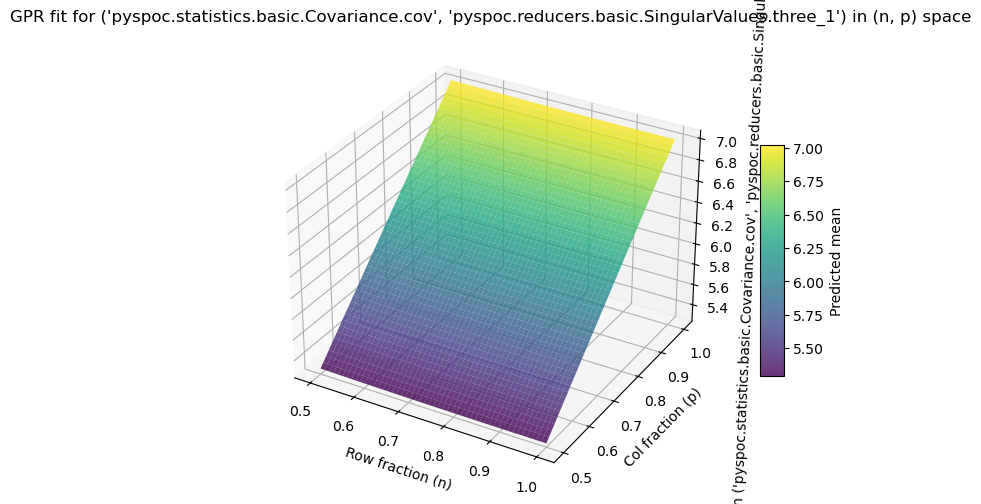

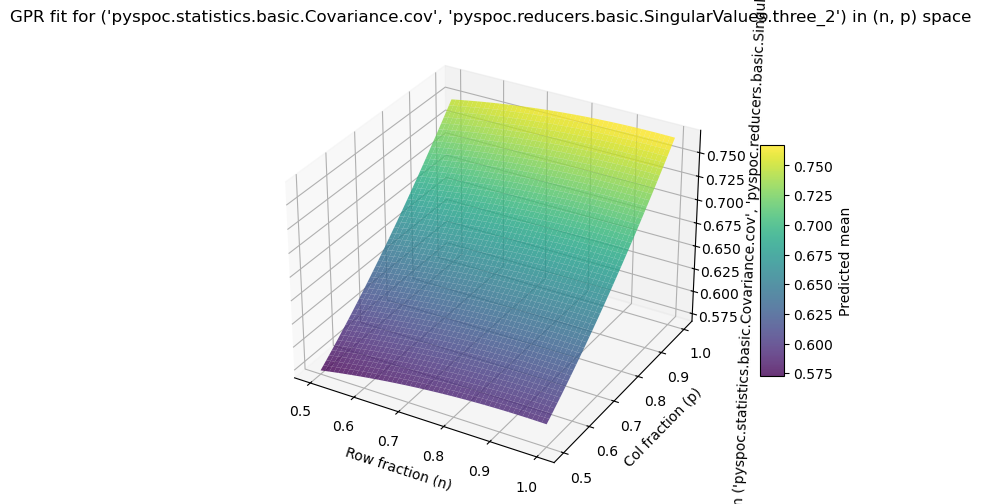

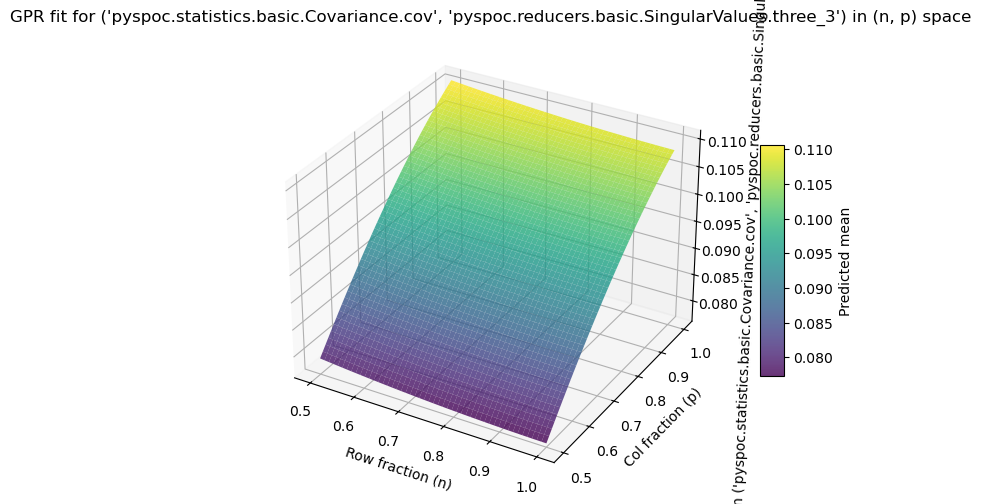

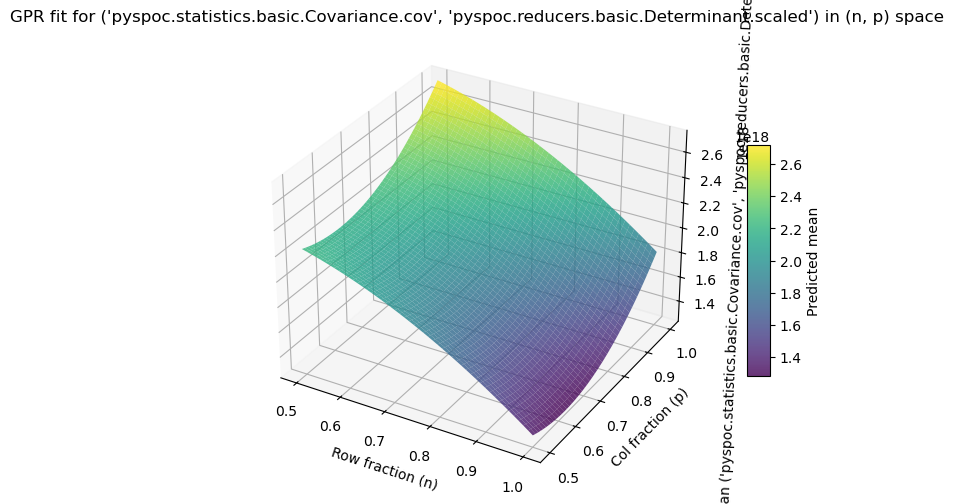

c:\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


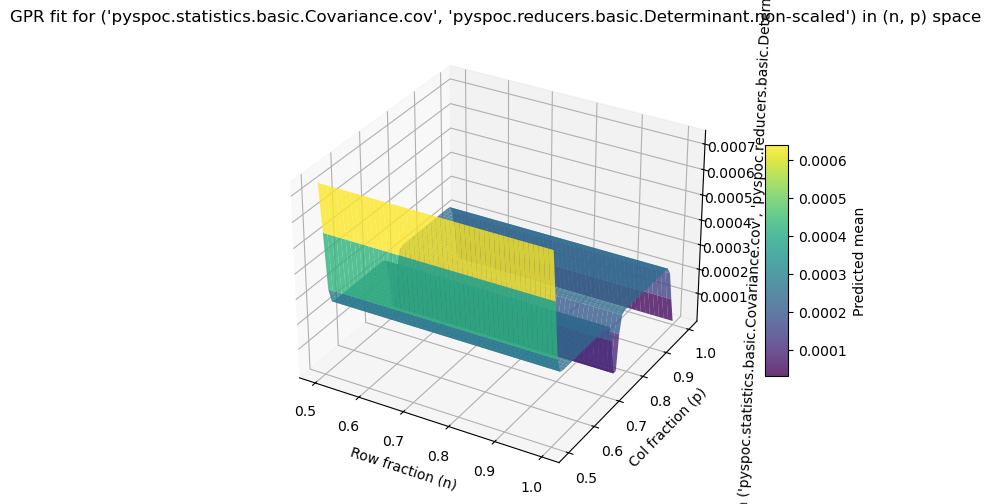

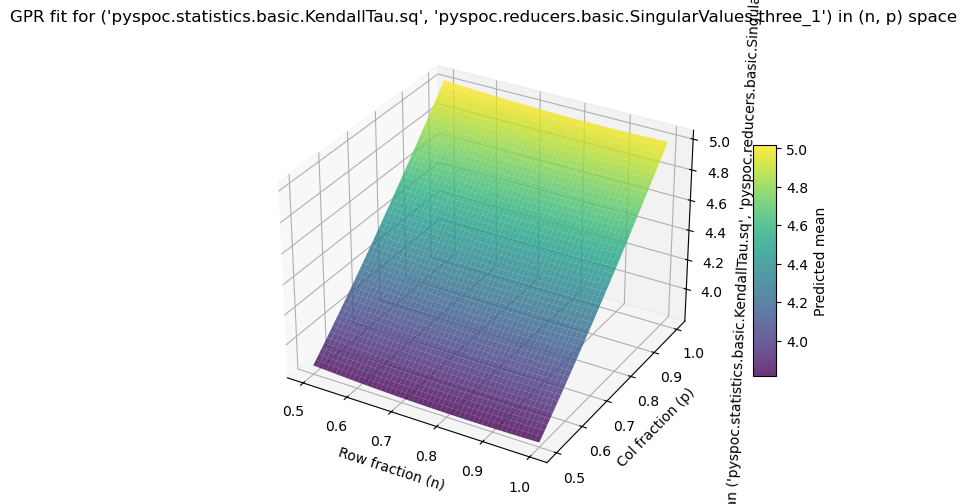

c:\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


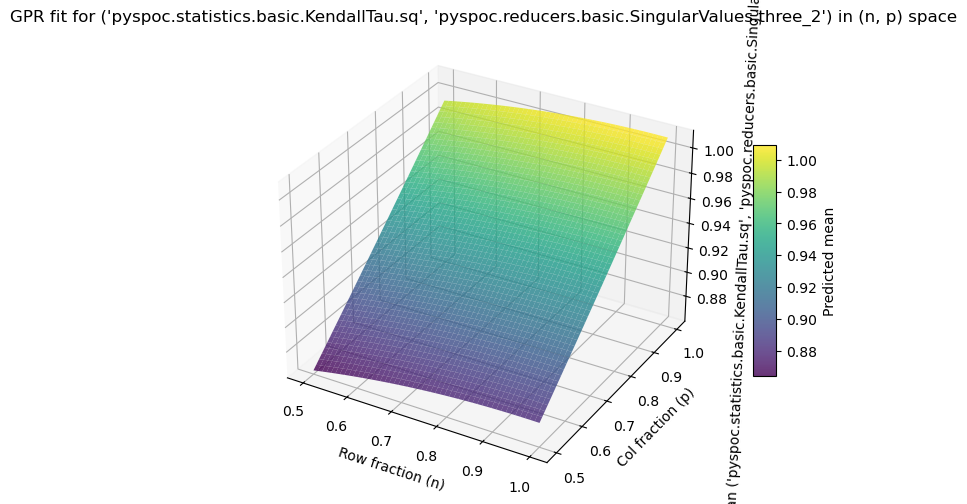

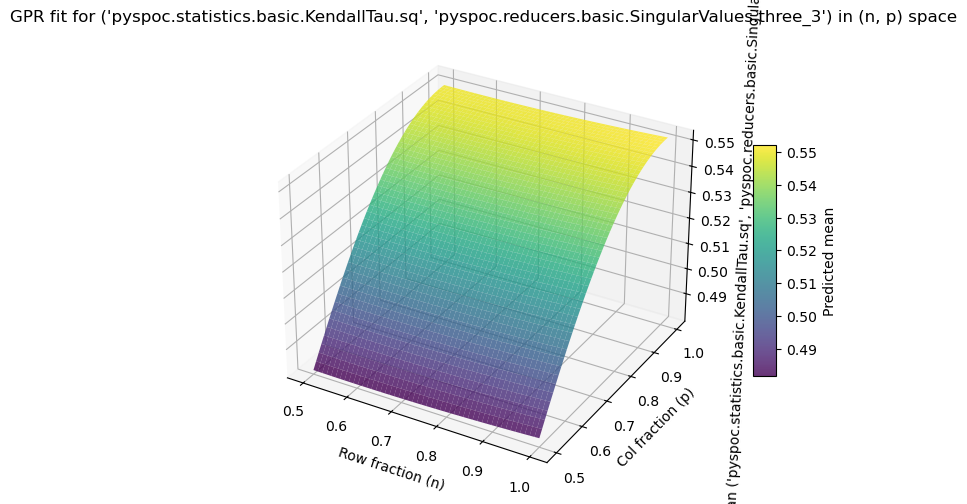

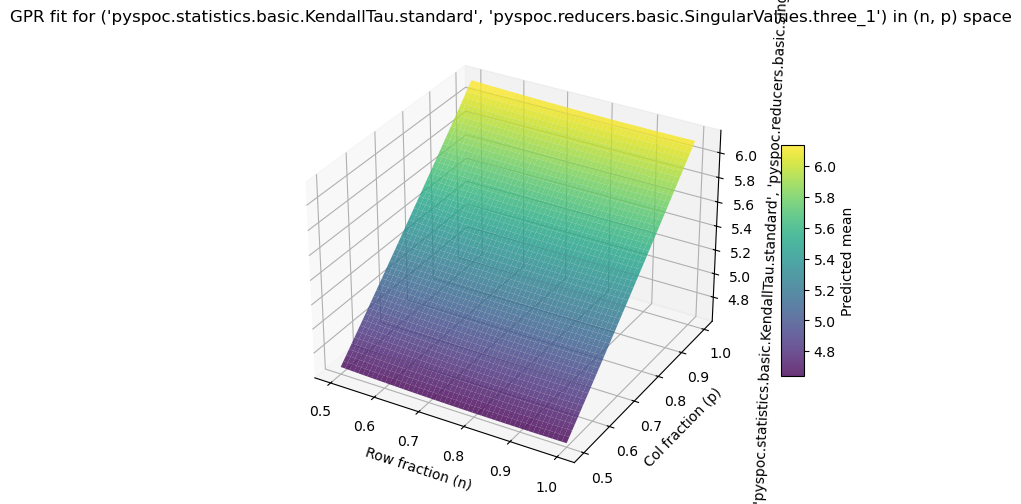

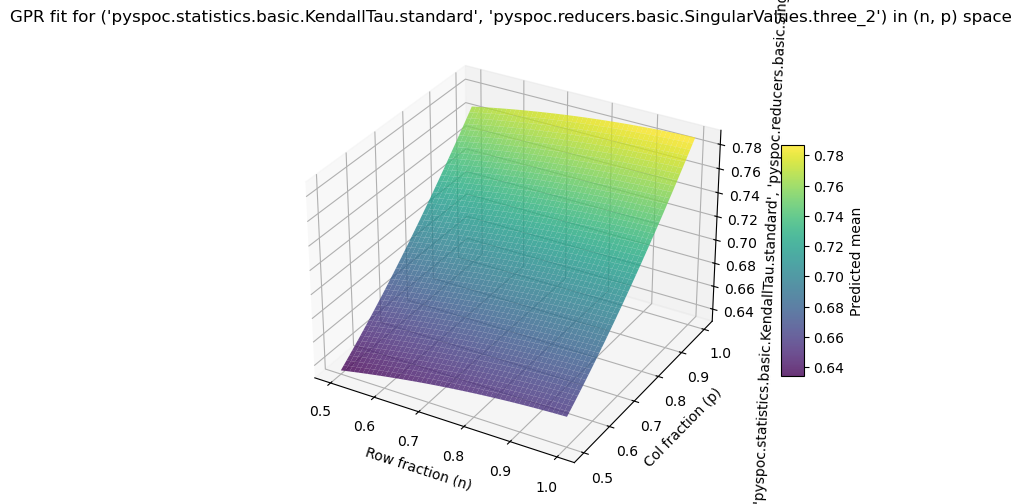

c:\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


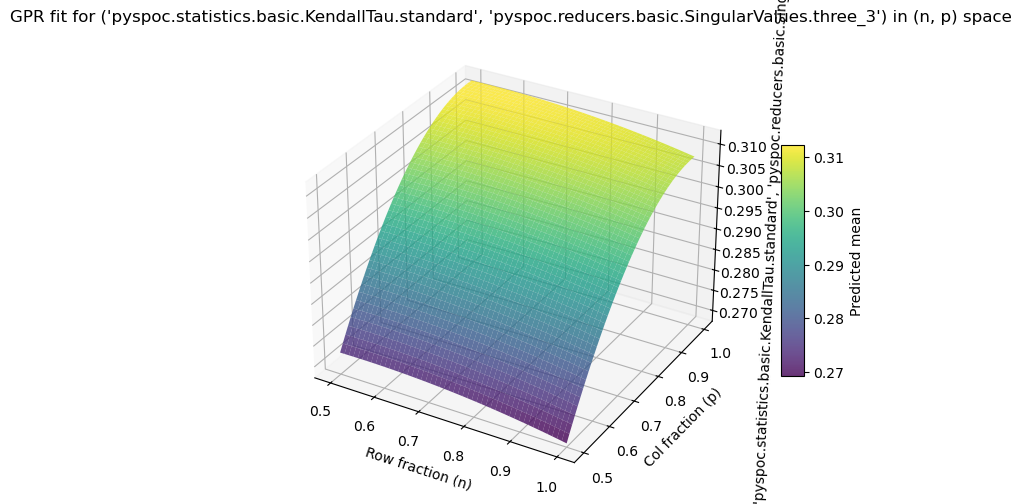

In [37]:
def gpr_on_n_p_plane(results, n_grid, p_grid):
    """
    Fit and plot Gaussian Process Regression for each reducer's mean surface in (n, p) space.
    Args:
        results: Output of n_p_plane_analysis_all_reducers (dict with 'means' key for each reducer)
        n_grid: 1D array of n values (row fractions)
        p_grid: 1D array of p values (col fractions)
    """
    N, P = np.meshgrid(n_grid, p_grid, indexing='ij')
    X = np.column_stack([N.ravel(), P.ravel()])

    for reducer_name, reducer_dict in results.items():
        means = reducer_dict['means']
        y = means.ravel()
        # Fit GPR
        kernel = C(1.0, (1e-3, 1e3)) * RBF([0.1, 0.1], (1e-2, 1e2))
        gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=1e-6, normalize_y=True)
        gpr.fit(X, y)
        # Predict on a finer grid for smooth surface
        n_fine = np.linspace(n_grid[0], n_grid[-1], 50)
        p_fine = np.linspace(p_grid[0], p_grid[-1], 50)
        N_fine, P_fine = np.meshgrid(n_fine, p_fine, indexing='ij')
        X_fine = np.column_stack([N_fine.ravel(), P_fine.ravel()])
        y_pred, y_std = gpr.predict(X_fine, return_std=True)
        Y_pred = y_pred.reshape(N_fine.shape)

        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(N_fine, P_fine, Y_pred, cmap='viridis', alpha=0.8)
        ax.set_xlabel('Row fraction (n)')
        ax.set_ylabel('Col fraction (p)')
        ax.set_zlabel(f'GPR mean {reducer_name}')
        ax.set_title(f'GPR fit for {reducer_name} in (n, p) space')
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Predicted mean')
        plt.show()
n_grid = np.linspace(0.5, 1.0, 3)  
p_grid = np.linspace(0.5, 1.0, 3)
gpr_on_n_p_plane(results, n_grid, p_grid)

## notes and debugg-y things (safely ignore)

In [ ]:
# cfg = Config.from_internal("fast")
# - this is breaking - note